# **DSI311 Data Science Algorithms**
## Project : **Credit Card Dataset for Clustering**
### **ผู้จัดทำ (Authors)**
- ธวพร ตรีเนตร 6624650021  
- ปทิตตา กุศลสมบูรณ์ 6624650039  
- จิดาภา มณีน้อย 6624650161  
- ธัญวรัตม์ กีรติพสุวัฒน์ 6624650294  
- วรดนัย วงษ์มณี 6424650189  
---

# **บทคัดย่อ (Abstract)**

Project นี้นำเสนอการวิเคราะห์และจัดกลุ่มพฤติกรรมการใช้บัตรเครดิตของลูกค้าโดยประยุกต์ใช้เทคนิค **Clustering** กับข้อมูล CC GENERAL Dataset จากแพลตฟอร์ม Kaggle โดยมีวัตถุประสงค์เพื่อค้นหารูปแบบพฤติกรรมการใช้งานที่ซ่อนอยู่ในข้อมูลพฤติกรรมลูกค้า อันประกอบด้วยยอดคงเหลือ การใช้วงเงิน การชำระเงิน การผ่อนสินค้า และการเบิกเงินสดล่วงหน้า กระบวนการวิเคราะห์ครอบคลุม Data Preparation, Missing Value Imputation, Feature Space Construction, Dimensionality Reduction (PCA และ UMAP) และการประเมินโมเดล Clustering หลายวิธี ได้แก่ K-Means, Agglomerative Clustering, Gaussian Mixture Model และ DBSCAN

การประเมินผลใช้ตัวชี้วัดมาตรฐาน ได้แก่ Silhouette Score, Calinski–Harabasz Index และ Davies–Bouldin Index พร้อมจัดทำ Composite Score เพื่อสรุปประสิทธิภาพโดยรวมของแต่ละคอนฟิก จากนั้นเลือกโมเดลที่เหมาะสมที่สุดสำหรับการทำ Cluster Profiling ซึ่งพบว่าลูกค้ามีรูปแบบพฤติกรรมที่แตกต่างกันอย่างมีนัยสำคัญ เช่น กลุ่มใช้วงเงินสูงและชำระสม่ำเสมอ กลุ่มมีแนวโน้มใช้ Cash Advance สูง กลุ่มผู้ใช้งานต่ำ และกลุ่มที่ชำระเต็มจำนวน รายงานสรุปผลลัพธ์เชิงพฤติกรรมและข้อเสนอแนะเชิงกลยุทธ์เพื่อสนับสนุนงานด้านการตลาดและการบริหารความเสี่ยงของสถาบันการเงิน

---

# 1.) **บทนำ (Introduction)**

## **ที่มาและความสำคัญของปัญหา (Background and Significance)**

การทำความเข้าใจพฤติกรรมการใช้บัตรเครดิตเป็นองค์ประกอบสำคัญต่อการพัฒนาผลิตภัณฑ์ทางการเงินและกลยุทธ์บริหารความเสี่ยงของสถาบันการเงิน เนื่องจากข้อมูลพฤติกรรมลูกค้ามีจำนวนมาก มีหลากหลายมิติ และมีรูปแบบความสัมพันธ์ที่ซับซ้อน การวิเคราะห์เชิงสถิติแบบดั้งเดิมอาจไม่สามารถแยกแยะความแตกต่างของลูกค้าแต่ละกลุ่มได้อย่างมีประสิทธิภาพ

เทคนิค **Unsupervised Learning** โดยเฉพาะ **Clustering** จึงมีบทบาทสำคัญในการจัดกลุ่มลูกค้าที่มีพฤติกรรมคล้ายคลึงกันโดยไม่ต้องมี Label ล่วงหน้า ช่วยให้ค้นพบโครงสร้างเชิงพฤติกรรมที่ซ่อนอยู่ในข้อมูล (Hidden Patterns) และสามารถนำไปประยุกต์ใช้ในการ Segmentation การออกแบบโปรโมชั่นเฉพาะกลุ่ม การคัดกรองความเสี่ยง และการวางกลยุทธ์ดูแลลูกค้าได้อย่างแม่นยำยิ่งขึ้น

---

## **วัตถุประสงค์ (Objectives)**

1. วิเคราะห์คุณลักษณะและพฤติกรรมการใช้บัตรเครดิตของลูกค้า  
2. เตรียมข้อมูลและสร้าง Feature Space ที่สะท้อนพฤติกรรมการใช้งานอย่างเหมาะสม  
3. ทดลองและเปรียบเทียบโมเดล Clustering หลายรูปแบบ  
4. ประเมินประสิทธิภาพของโมเดลด้วย Silhouette, CHI, DBI และ Composite Score  
5. เลือกคอนฟิกที่ดีที่สุดเพื่อสร้างกลุ่มลูกค้าที่มีความหมายเชิงพฤติกรรม  
6. วิเคราะห์คุณลักษณะของแต่ละกลุ่ม (Cluster Profiling)  
7. ตีความ Insight และข้อเสนอแนะเชิงกลยุทธ์เพื่อประยุกต์ใช้ในด้านธุรกิจ  

---

## **ขอบเขตและแหล่งที่มาของข้อมูล**

ข้อมูลที่ใช้ในProjectนี้คือชุดข้อมูล **CC GENERAL.csv** จากชุดข้อมูล
“Credit Card Dataset for Clustering” บนเว็บไซต์ Kaggle
ซึ่งประกอบด้วยข้อมูลลูกค้าบัตรเครดิตที่ไม่ระบุตัวตน ประกอบด้วยตัวแปรที่เกี่ยวข้องกับ

- Balance และการใช้วงเงิน
- ยอดใช้จ่ายรวมและแยกตามประเภท (เช่น One-off Purchases, Installment Purchases)
- การเบิกเงินสดล่วงหน้า (Cash Advance)
- วงเงินเครดิต (Credit Limit)
- พฤติกรรมการชำระเงิน (Payments, Minimum Payments, Percentage of Full Payment)
- ระยะเวลาความสัมพันธ์ในการอยู่กับสถาบันการเงิน (Tenure)

ข้อมูลมีการปกปิดตัวตนลูกค้า และใช้เพื่อการวิเคราะห์รายกลุ่มเท่านั้น ไม่ได้มุ่งเน้นการทำนายเฉพาะรายบุคคล

--------


## **โครงสร้างรายงาน (Report Structure)**

รายงานฉบับนี้ประกอบด้วยหัวข้อสำคัญดังนี้:

1. **บทนำ (Introduction)**  
   ที่มา ความสำคัญ วัตถุประสงค์ และขอบเขตของ project

2. **ข้อมูลและแหล่งที่มา (Data Collection & Overview)**  
   รายละเอียดชุดข้อมูล ตัวแปร และคุณลักษณะของข้อมูล

3. **การเตรียมข้อมูลและการสำรวจข้อมูล (Data Preparation & EDA)**  
   การจัดการ Missing Values, Outliers และการวิเคราะห์เบื้องต้น

4. **Feature Engineering**  
   การสร้างคุณลักษณะใหม่ การปรับขนาดข้อมูล และ PCA/UMAP

5. **Experiment Setup**  
   ขั้นตอนการทดลองโมเดล รวมถึง Imputer, Feature Space และ Parameter

6. **Model Evaluation & Ranking**  
   การประเมินผลด้วย Silhouette, CHI, DBI และ Composite Score

7. **Best Configuration Retraining**
   การนำ Best Config ไปสร้างโมเดลใหม่อีกรอบ

8. **Cluster Profiling**  
   วิเคราะห์ลักษณะเฉพาะของแต่ละกลุ่มลูกค้า

9. **Business Insights & Conclusion**  
   สรุปผลเชิงกลยุทธ์ และข้อเสนอแนะสำหรับการนำไปใช้งาน

# 2.) **Data Collection & Overview**

ข้อมูลที่ใช้ในการวิเคราะห์ครั้งนี้นำมาจาก ชุดข้อมูลพฤติกรรมการใช้บัตรเครดิตของลูกค้า (Credit Card Customer Dataset) ซึ่งเผยแพร่บนเว็บไซต์ Kaggle โดยผู้ให้บริการข้อมูล Arjun Bhasin ภายใต้ชื่อชุดข้อมูล “CC GENERAL.csv”

โดยเป็นข้อมูลเชิงพฤติกรรมการใช้บัตรเครดิตของลูกค้าในช่วง **6 เดือนย้อนหลัง**  
และอยู่ในรูปแบบ **Anonymized Data** เพื่อใช้สำหรับการวิเคราะห์ในเชิงกลุ่ม (Segmentation) เท่านั้น

## **2.1 แหล่งที่มาของข้อมูล (Data Source)**

- แพลตฟอร์ม: Kaggle  
- ชื่อชุดข้อมูล: CC GENERAL  
- URL: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata  

---

## **2.2 รายละเอียดข้อมูล (Dataset Description)**

ชุดข้อมูลประกอบด้วย:

- **จำนวนแถว (Records):** 8,950 แถว
- **จำนวนตัวแปร (Features):** 18 คอลัมน์
- **ระดับข้อมูล:** Customer-level (หนึ่งแถวต่อหนึ่งลูกค้า)

**Column Details**

| Column | Description (English) | คำอธิบายภาษาไทย |
|--------|------------------------|-------------------|
| **CUST_ID** | Unique customer identification code. | รหัสประจำตัวลูกค้า (ไม่ซ้ำกันในแต่ละคน) |
| **BALANCE** | The amount of money owed by the customer at the end of the billing cycle. | ยอดเงินคงเหลือในบัตรเครดิต ณ รอบบิลล่าสุด |
| **BALANCE_FREQUENCY** | Frequency of balance updates (values close to 1 mean frequent updates). | ความถี่ในการมียอดคงเหลือ ยิ่งใกล้ 1 แปลว่าเกิดขึ้นบ่อย |
| **PURCHASES** | Total amount of purchases made by the customer. | ยอดรวมการใช้จ่ายด้วยบัตรเครดิตทั้งหมด |
| **ONEOFF_PURCHASES** | Total amount of one-time (non-installment) purchases. | ยอดการใช้จ่ายแบบจ่ายเต็มครั้งเดียว (ไม่ผ่อน) |
| **INSTALLMENTS_PURCHASES** | Total amount of installment purchases. | ยอดรวมการใช้จ่ายแบบผ่อนชำระสินค้า |
| **CASH_ADVANCE** | Total amount of cash advances (money withdrawn using the credit card). | ยอดรวมการเบิกเงินสดจากบัตรเครดิต |
| **PURCHASES_FREQUENCY** | Fraction of months with at least one purchase (0–1). | ความถี่ในการซื้อของ (ยิ่งใกล้ 1 แปลว่าซื้อบ่อย) |
| **ONEOFF_PURCHASES_FREQUENCY** | Fraction of months with at least one one-off purchase. | ความถี่ในการซื้อแบบจ่ายเต็มจำนวน (ครั้งเดียว) |
| **PURCHASES_INSTALLMENTS_FREQUENCY** | Fraction of months with at least one installment purchase. | ความถี่ในการซื้อแบบผ่อนสินค้า |
| **CASH_ADVANCE_FREQUENCY** | Fraction of months with at least one cash advance. | ความถี่ในการเบิกเงินสดผ่านบัตร |
| **CASH_ADVANCE_TRX** | Number of cash advance transactions. | จำนวนครั้งที่เบิกเงินสดผ่านบัตร |
| **PURCHASES_TRX** | Number of purchase transactions. | จำนวนครั้งที่ทำรายการซื้อสินค้า |
| **CREDIT_LIMIT** | Maximum credit limit assigned to the customer. | วงเงินเครดิตสูงสุดที่ลูกค้าได้รับ |
| **PAYMENTS** | Total amount paid by the customer in the given period. | ยอดรวมที่ลูกค้าชำระคืนบัตรเครดิต |
| **MINIMUM_PAYMENTS** | Minimum amount of payments made. | ยอดการชำระขั้นต่ำที่ลูกค้าชำระในรอบบิล |
| **PRC_FULL_PAYMENT** | Percentage of months where full payment was made. | สัดส่วนรอบบิลที่ลูกค้าชำระเต็มจำนวน (0–1) |
| **TENURE** | Number of months the account has been active (usually 6–12). | ระยะเวลาการเป็นลูกค้า (หน่วยเป็นเดือน) |

---


## **2.3 ประเภทตัวแปร (Feature Types)**

| ประเภท | ตัวแปรที่เกี่ยวข้อง | คำอธิบาย |
|--------|----------------------|-----------|
| **Identifier** | `CUST_ID` | ใช้เพื่อระบุตัวลูกค้า (ไม่ใช้ในการสร้างโมเดล) |
| **Numeric / Continuous** | `BALANCE`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`, `MINIMUM_PAYMENTS` | ค่าปริมาณสะท้อนการใช้บัตร |
| **Frequency (0–1)** | `BALANCE_FREQUENCY`, `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, `CASH_ADVANCE_FREQUENCY`, `PRC_FULL_PAYMENT` | สัดส่วนความถี่ของพฤติกรรมรายเดือน |
| **Count Variables** | `CASH_ADVANCE_TRX`, `PURCHASES_TRX` | จำนวนครั้งของกิจกรรมการใช้บัตร เช่น เบิกเงินสด / ซื้อสินค้า |
| **Tenure** | `TENURE` | ระยะเวลาในระบบ (เดือน) |

---


## **2.4 ความเหมาะสมของข้อมูลสำหรับ Clustering**

ข้อมูลชุดนี้มีคุณลักษณะหลายมิติ (High-dimensional) และเป็นข้อมูลพฤติกรรมที่ไม่มี Label ทำให้เหมาะสมอย่างยิ่งสำหรับการประยุกต์ใช้เทคนิค **Unsupervised Learning** โดยเฉพาะ **Clustering** เพื่อค้นหารูปแบบการใช้งานบัตรเครดิตที่ซ่อนอยู่ (Hidden Behavioral Patterns)

---

# 3.) **Data Preparation & EDA**


## **3.0 Environment Setup**

ในขั้นตอนนี้จะทำการเรียกใช้ Library ที่จำเป็น

In [127]:
import os, warnings, math, json
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

RANDOM_STATE = 42

DATA_PATH = '../raw/CC GENERAL.csv'

print("Data path:", DATA_PATH)


Data path: ../raw/CC GENERAL.csv


## **3.1 Data Loading & Initial Inspection**

In [128]:
df_raw = pd.read_csv(DATA_PATH)
print('Raw shape:', df_raw.shape)
print('Columns:', df_raw.columns.tolist())
display(df_raw.head())

Raw shape: (8950, 18)
Columns: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [129]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

จากการสำรวจไฟล์ `CC GENERAL.csv` เพื่อตรวจสอบจำนวนแถว จำนวนคอลัมน์ พร้อมข้อมูลชนิดตัวแปร (dtypes) และ Non-null ของแต่ละคอลัมน์ เพื่อทำความเข้าใจโครงสร้างข้อมูลเบื้องต้น 

จากผลลัพธ์พบว่า:

- ชุดข้อมูลมี **8,950 แถว** และ **18 ตัวแปร**
- ตัวแปรส่วนใหญ่เป็นชนิด **float64** จำนวน 14 ตัว  
- ตัวแปรแบบ **int64** จำนวน 3 ตัว  
- มีตัวแปรแบบ **object** เพียง 1 ตัว คือ `CUST_ID` ซึ่งเป็นรหัสอ้างอิงของลูกค้า
- พบ **Missing Values** ใน 2 คอลัมน์ ได้แก่  
  - `CREDIT_LIMIT` : ขาดไป 1 ค่า  
  - `MINIMUM_PAYMENTS` : ขาดไป 313 ค่า  
- ตัวแปรอื่น ๆ มีข้อมูลครบถ้วนทุกแถว

การตรวจสอบนี้ช่วยระบุปัญหาคุณภาพข้อมูลเบื้องต้นและเป็นแนวทางสำคัญสำหรับขั้นตอนการทำ Data Cleaning และการเลือกวิธีการ Imputation ในลำดับถัดไป

## **3.2 Data Cleaning**

ขั้นตอนนี้ มีวัตถุประสงค์เพื่อตรวจสอบความถูกต้องของข้อมูล ลบตัวแปรที่ไม่จำเป็น ตรวจหาค่าซ้ำ (Duplicates)และเตรียมข้อมูลให้พร้อมสำหรับการวิเคราะห์เชิงลึก และการทำ Clustering

### **3.2.1 Removing Identifier Column**

ตัวแปร `CUST_ID` เป็นรหัสประจำตัวลูกค้าในรูปแบบตัวอักษร (object)  
ซึ่งไม่มีความหมายเชิงพฤติกรรมและไม่สามารถนำไปใช้คำนวณระยะห่าง (distance) ในโมเดล Clustering ได้  
จึงควรถูกตัดออกจากชุดข้อมูลก่อนการวิเคราะห์ทั้งหมด

In [130]:
df = df_raw.drop(columns='CUST_ID', errors='ignore').select_dtypes(include=[np.number])

print("Numeric shape:", df.shape)
print("Missing summary:")
print(df.isna().sum().sort_values(ascending=False).head(10))


Numeric shape: (8950, 17)
Missing summary:
MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
dtype: int64


### **3.2.2 Duplicate Checking**

การตรวจสอบข้อมูลที่ซ้ำซ้อนเป็นขั้นตอนสำคัญในการรับประกันคุณภาพข้อมูล
เนื่องจากการมีแถวข้อมูลซ้ำจะกระทบต่อการคำนวณ และทำให้ผลลัพธ์ของ Clustering บิดเบือนได้

In [131]:
dup_count = df.duplicated().sum()
print(f"จำนวนแถวที่ซ้ำทั้งหมด: {dup_count}")

df[df.duplicated()].head()


จำนวนแถวที่ซ้ำทั้งหมด: 0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


### **3.2.3 Missing Value Summary**

จากผลลัพธ์ `df_raw.info()` พบว่า:
	
- CREDIT_LIMIT มี Missing 1 ค่า

- MINIMUM_PAYMENTS มี Missing 313 ค่า

- ตัวแปรอื่น ๆ มีค่า Non-null ครบถ้วน 100%

เนื่องจากข้อมูล Missing มีผลต่อการคำนวณระยะห่างและการเรียนรู้ของโมเดล
การจัดการ Missing Value จึงเป็นขั้นตอนสำคัญ
โดยจะมีการทดลอง Imputation วิธีต่าง ๆ เช่น
	
- Median Imputation

- KNN Imputer

- Iterative Imputer (MICE)

เพื่อประเมินวิธีที่เหมาะสมที่สุดในขั้นตอนของ Experiment Setup

## **3.3 Exploratory Data Analysis (EDA)**

ขั้นตอนการทำ Exploratory Data Analysis (EDA) มีวัตถุประสงค์เพื่อทำความเข้าใจโครงสร้างเชิงสถิติของข้อมูล  
ระบุรูปแบบพฤติกรรมเบื้องต้น ตรวจสอบการกระจายตัวของตัวแปร ค่าผิดปกติ (Outliers) รวมถึงความสัมพันธ์ระหว่างตัวแปร  
ซึ่งเป็นพื้นฐานสำคัญในการเลือกวิธีการทำ Feature Engineering และ Clustering ในขั้นตอนถัดไป

---


### **3.3.1 การตรวจสอบการกระจายตัวของตัวแปร (Distribution Analysis)**

ได้ทำการสำรวจการกระจายตัวของตัวแปรเชิงตัวเลขทั้งหมดด้วย Histogram  
ร่วมกับ Kernel Density Estimation (KDE) และตรวจสอบค่า Skewness เพื่อประเมินรูปแบบความเบ้ของข้อมูล  
ก่อนทำการวิเคราะห์ Outliers

การวิเคราะห์การกระจายตัวและค่า Skewness มีความสำคัญเนื่องจากข้อมูลด้านพฤติกรรมทางการเงินมักมีลักษณะเบ้ขวา
ลูกค้าส่วนใหญ่อยู่ในช่วงการใช้จ่ายและยอดคงเหลือระดับต่ำถึงปานกลาง แต่มีลูกค้าบางส่วนที่มีค่ามากผิดปกติ
หากไม่จัดการอย่างเหมาะสมอาจทำให้โมเดล Clustering ให้ความสำคัญกับลูกค้ากลุ่มเล็กสูงเกินไป

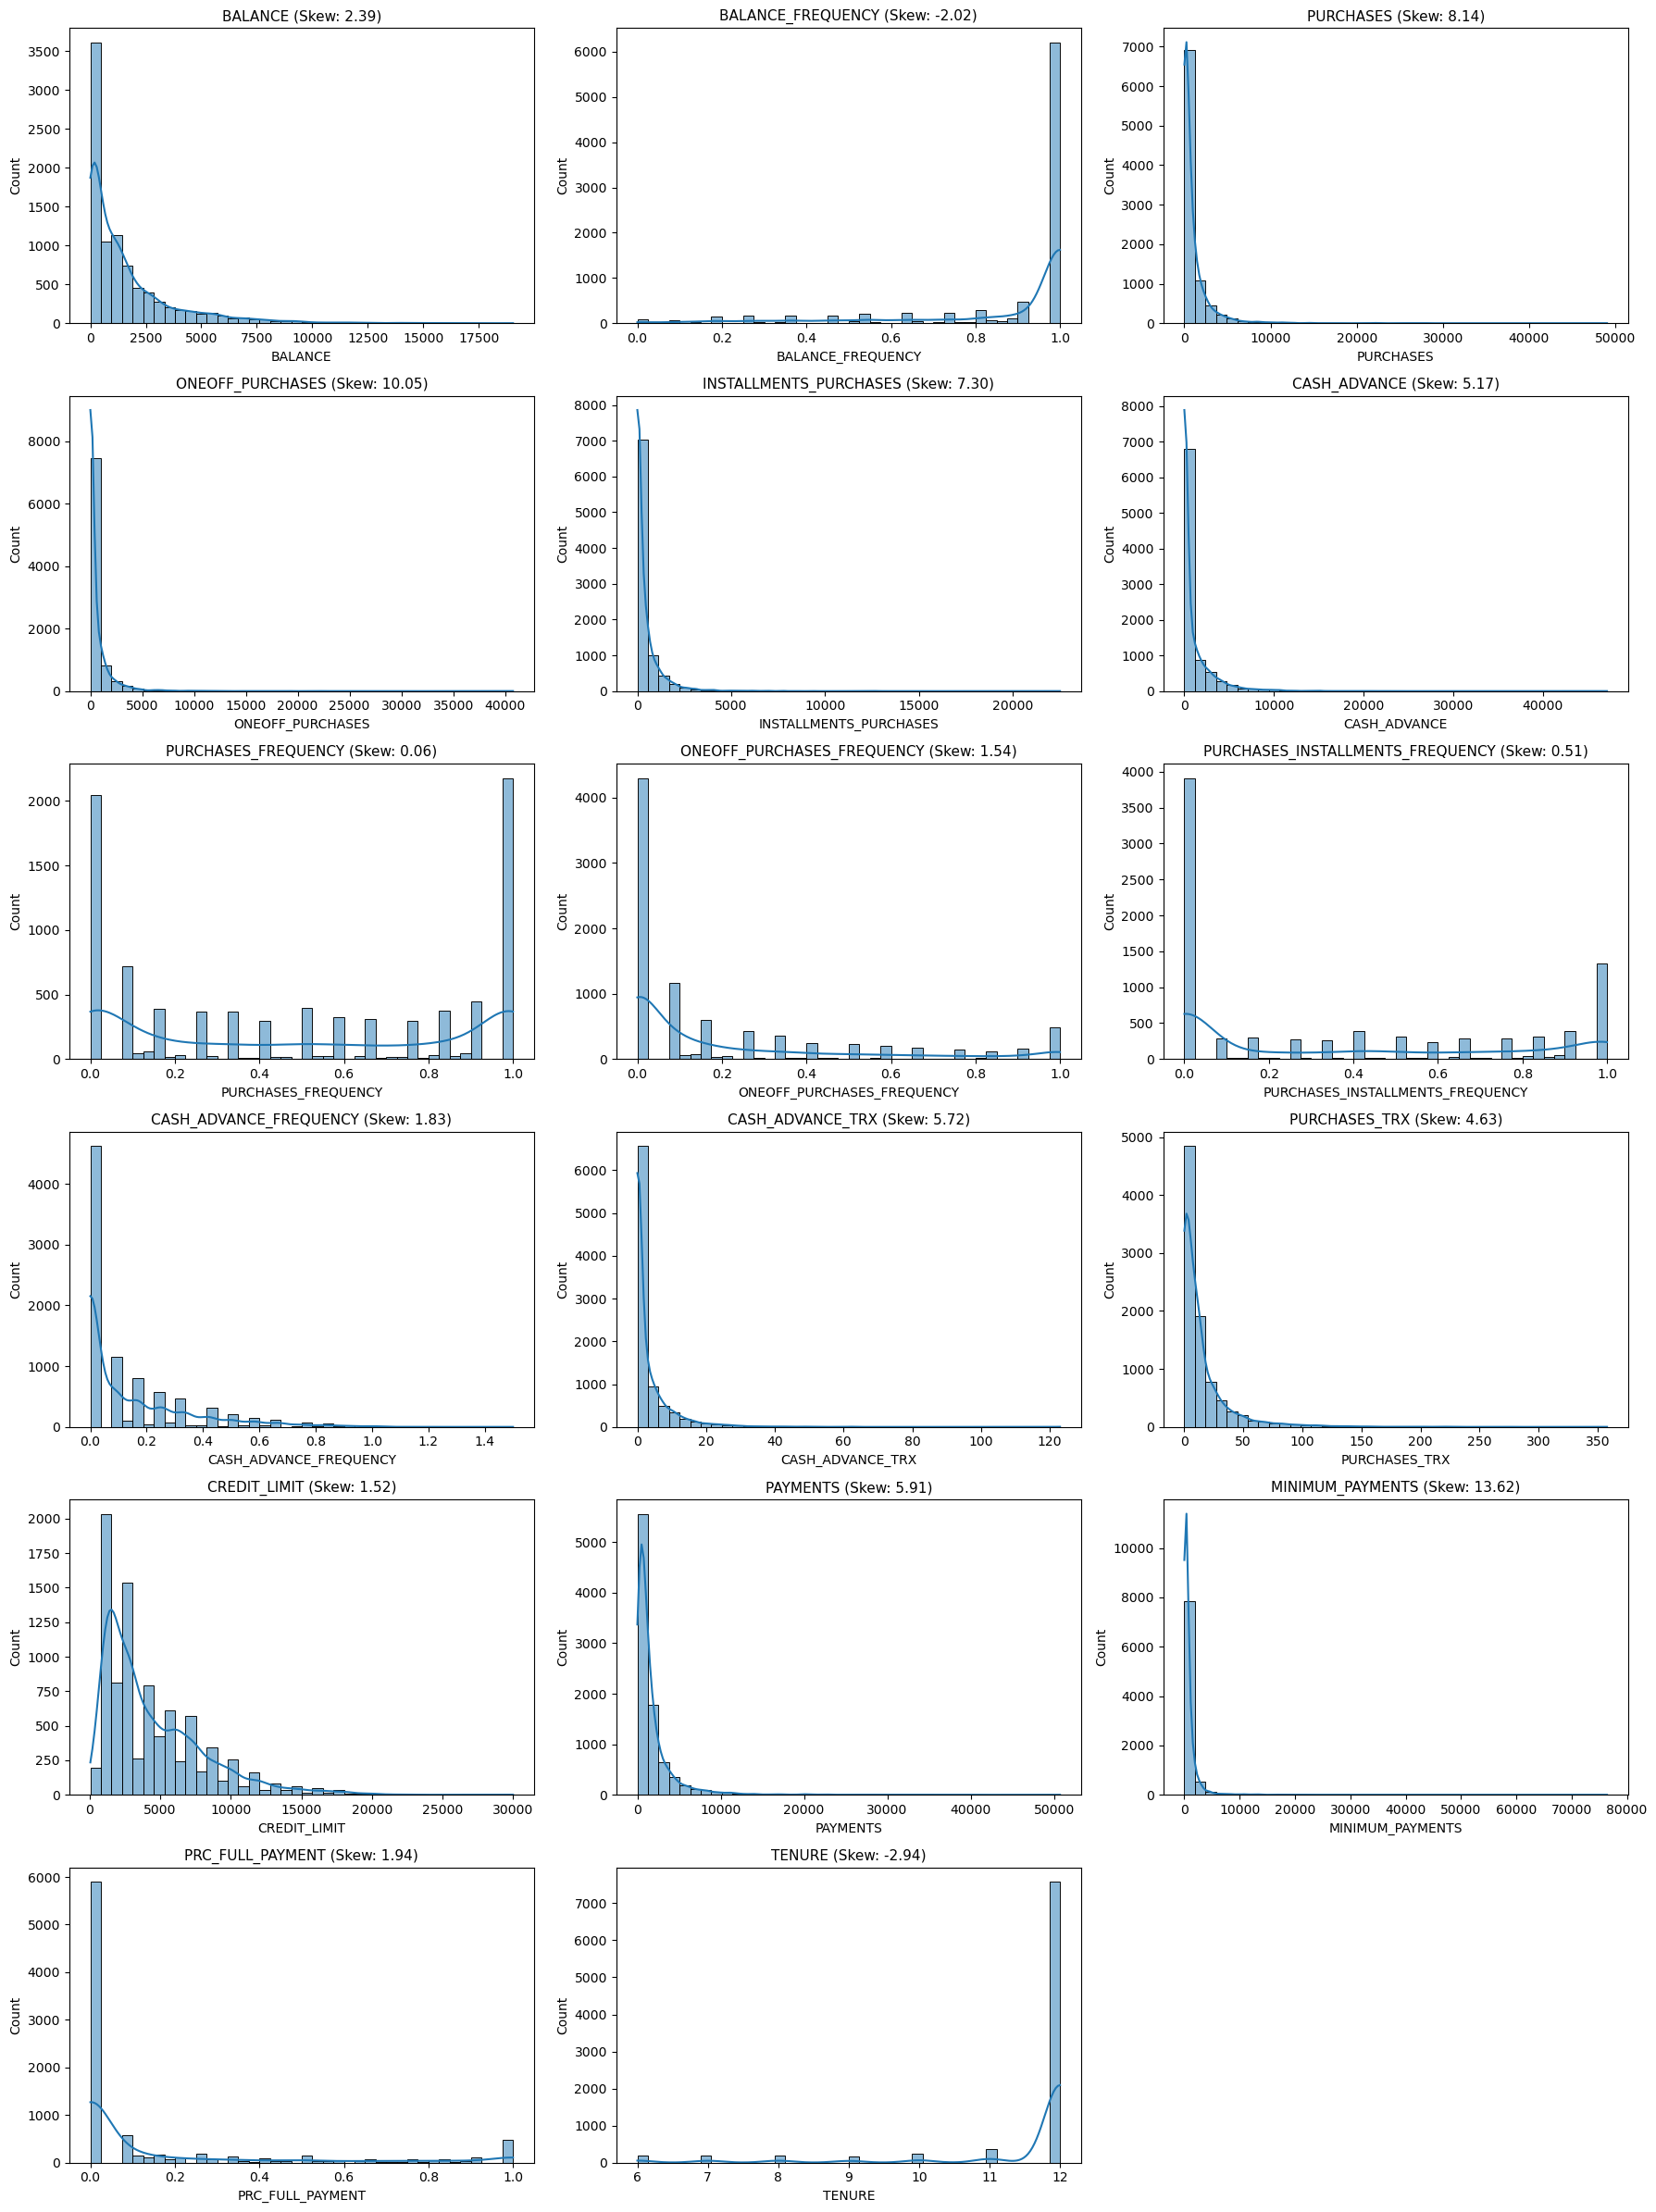

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
n = len(numeric_cols)

# 2 คอลัมน์
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(18, 4*rows))
  # ปรับตามจำนวนแถว

for i, col in enumerate(numeric_cols, 1):
    series = df[col].dropna()
    skew_val = series.skew()

    plt.subplot(rows, cols, i)
    sns.histplot(series, bins=40, kde=True)
    plt.title(f"{col} (Skew: {skew_val:.2f})", fontsize=11)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)

plt.tight_layout()
plt.show()


จากผลการวิเคราะห์พบว่า **ตัวแปรส่วนใหญ่มีลักษณะการกระจายตัวแบบเบ้ขวา (Right-Skewed)**  
เช่น `PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PAYMENTS  
และ MINIMUM_PAYMENTS` ซึ่งมีค่า Skewness ค่อนข้างสูง สะท้อนพฤติกรรมที่ลูกค้าส่วนใหญ่มีการใช้จ่ายยอดคงเหลือ และจำนวนธุรกรรมในระดับต่ำถึงปานกลาง ขณะที่มีลูกค้ากลุ่มเล็กที่มียอดใช้จ่ายหรือการทำรายการสูงมาก  
ลักษณะดังกล่าวเป็นธรรมชาติของข้อมูลด้านพฤติกรรมทางการเงินที่มักมี **heavy-tailed distribution**

ตัวแปรประเภทความถี่ของพฤติกรรม (Frequency Variables) เช่น  
PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY และ CASH_ADVANCE_FREQUENCY  
พบการกระจุกตัวที่ค่า 0 และ 1 อย่างชัดเจน สื่อถึงพฤติกรรมที่แบ่งออกเป็นสองกลุ่มหลัก ได้แก่  
ลูกค้าที่ “ไม่ค่อยใช้บัตร” เทียบกับลูกค้าที่ “ใช้บัตรอย่างสม่ำเสมอในทุกเดือน”  
ซึ่งเป็นลักษณะสำคัญที่คาดว่าจะช่วยให้การทำ Clustering แยกกลุ่มพฤติกรรมได้อย่างมีประสิทธิภาพ

โดยสรุป การที่ตัวแปรมีความเบ้ขวาสูงและมี Outliers จำนวนมากทำให้จำเป็นต้องพิจารณาการทำ Scaling ให้เหมาะสมก่อนเข้าสู่ขั้นตอนการทำโมเดล การวิเคราะห์ Distribution ในส่วนนี้มีความเชื่อมโยงโดยตรงกับแนวคิดในการทดลองกระบวนการ Scaling หลายรูปแบบในงานนี้ ได้แก่

- **StandardScaler:** ใช้กับข้อมูลที่มีการกระจายตัวปกติหรือใกล้เคียงปกติ แต่ยังต้องประเมินความทนทานต่อ Outliers  
- **RobustScaler:** ออกแบบมาเพื่อลดผลกระทบของ Outliers เหมาะกับข้อมูลที่มี heavy-tail  
- **log1p + StandardScaler:** ใช้ปรับลดความเบ้ของข้อมูลด้านธุรกรรมที่มีค่าเป็นจำนวนเงิน ก่อนทำ Standardization  
  ช่วยให้ตัวแปรที่มีช่วงกว้างมากสามารถเข้าสู่ PCA และการคำนวณระยะห่างได้อย่างสมดุลขึ้น

การลองใช้ Scaling หลายวิธีนี้จึงเป็นขั้นตอนสำคัญในการประเมินว่าการแปลงข้อมูลรูปแบบใด  
ช่วยให้โมเดล Clustering มองเห็นโครงสร้างของข้อมูลได้ดีที่สุด และลดผลกระทบจากค่ามากผิดปกติที่ปรากฏในข้อมูลต้นฉบับ

### **3.3.2 Outlier Detection using IQR Method**

เนื่องจากข้อมูลด้านพฤติกรรมการใช้บัตรเครดิตมีลักษณะเบ้ขวาสูงและมีความเป็นไปได้ที่จะมีค่ามากผิดปกติ (extreme values)  
การตรวจสอบ Outliers จึงเป็นขั้นตอนสำคัญก่อนการสร้าง Feature Space และการทำ Clustering  
โดยใช้วิธี **Interquartile Range (IQR Method)** สำหรับแต่ละตัวแปร และคำนวณสัดส่วนของ Outlier ต่อจำนวนข้อมูลทั้งหมด

---

#### **หลักการของ IQR Method**

IQR ถูกคำนวณจากค่าควอไทล์ดังนี้:

- **Q1:** ค่าควอไทล์ที่ 25%  
- **Q3:** ค่าควอไทล์ที่ 75%  
- **IQR = Q3 – Q1**

จากนั้นนิยามขอบเขตสำหรับ Outlier:

- **Lower bound = Q1 – 1.5 × IQR**  
- **Upper bound = Q3 + 1.5 × IQR**

ค่าที่อยู่นอกช่วงดังกล่าวถือเป็น Outliers

---


,outlier_ratio
BALANCE_FREQUENCY,0.166816
PRC_FULL_PAYMENT,0.164693
TENURE,0.152626
CASH_ADVANCE,0.115084
ONEOFF_PURCHASES,0.113184
INSTALLMENTS_PURCHASES,0.096872
MINIMUM_PAYMENTS,0.093966
PAYMENTS,0.090279
PURCHASES,0.090279
CASH_ADVANCE_TRX,0.089832


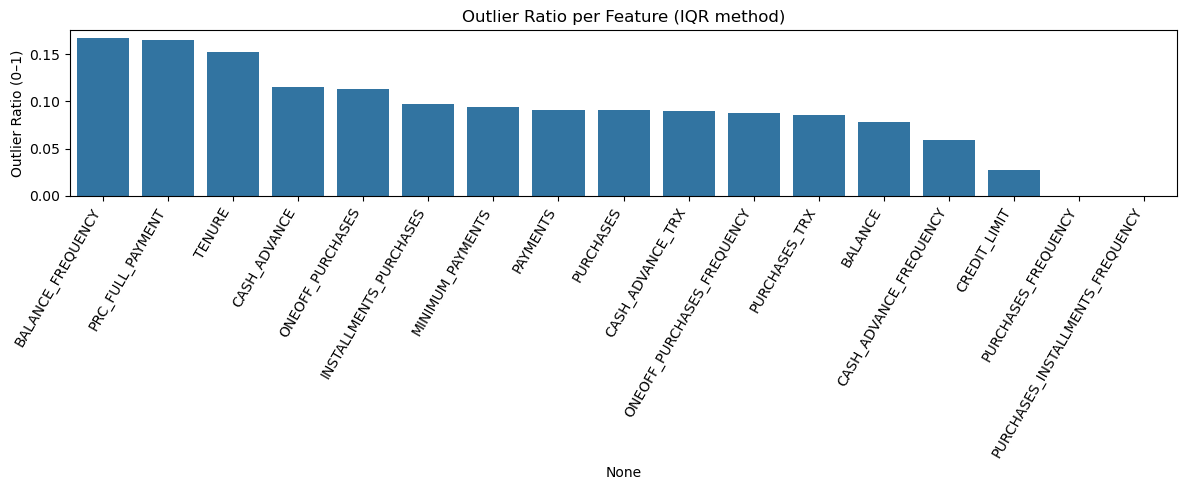

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------- Outlier Ratio per Feature ----------
def detect_outlier_ratio(df):
    ratios = {}
    for col in df.columns:
        if df[col].dtype.kind not in 'biufc':  # skip non-numeric
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        mask = (df[col] < lower) | (df[col] > upper)
        ratio = mask.mean()
        ratios[col] = ratio
    outlier_df = pd.DataFrame.from_dict(ratios, orient='index', columns=['outlier_ratio']).sort_values('outlier_ratio', ascending=False)
    return outlier_df

outlier_summary = detect_outlier_ratio(df)
display(outlier_summary)

# ---------- Visualization ----------
plt.figure(figsize=(12, 5))
sns.barplot(x=outlier_summary.index, y='outlier_ratio', data=outlier_summary)
plt.xticks(rotation=60, ha='right')
plt.title('Outlier Ratio per Feature (IQR method)')
plt.ylabel('Outlier Ratio (0–1)')
plt.tight_layout()
plt.show()

ผลการประเมินสัดส่วน Outlier ด้วยวิธี IQR พบว่า ตัวแปรที่มีอัตรา Outlier สูงที่สุด ได้แก่  
`**BALANCE_FREQUENCY**, **PRC_FULL_PAYMENT**` และ `**TENURE**` ซึ่งสะท้อนว่ามีลูกค้ากลุ่มเล็กที่มีพฤติกรรมแตกต่างจากกลุ่มส่วนใหญ่ค่อนข้างชัดเจน ทั้งในด้านความถี่ของการมียอดคงเหลือ พฤติกรรมการชำระเต็มจำนวน และระยะเวลาการเป็นสมาชิก

ในขณะที่ตัวแปรอื่น เช่น CASH_ADVANCE, ONEOFF_PURCHASES และ INSTALLMENTS_PURCHASES ก็มีสัดส่วน Outlier อยู่ระดับปานกลาง ซึ่งเป็นลักษณะที่พบได้ทั่วไปในข้อมูลพฤติกรรมการใช้บัตรเครดิต เนื่องจากลูกค้าบางส่วนมีการใช้จ่ายหรือทำธุรกรรมในระดับสูงกว่ากลุ่มใหญ่

ซึ่งการมี Outliers จำนวนมากส่งผลต่อการคำนวณระยะห่างของโมเดลหลายชนิด เช่น K-Means  
เนื่องจากข้อมูลที่มีค่าสูงผิดปกติจะดึง centroid ออกห่างจากข้อมูลส่วนใหญ่  
ทำให้การแบ่งกลุ่มบิดเบือน

ดังนั้นผลจากการตรวจสอบ ได้ว่า:

- จำเป็นต้อง **ทดลอง Scaling หลายรูปแบบ**  
  เช่น StandardScaler, RobustScaler และ log1p+Standard เพื่อจัดการผลกระทบของ Outliers  
- อาจต้องพิจารณา **ใช้โมเดลที่ทนต่อ Outliers กว่า K-Means**  
  เช่น DBSCAN หรือ Gaussian Mixture Model ในบางคอนฟิก
- การประเมิน Outliers ยังช่วยสนับสนุนขั้นตอน **Feature Space Selection**  
  เพื่อเลือกชุดตัวแปรที่มีผลกระทบจากค่าผิดปกติน้อยลง

---

โดยสรุป การวิเคราะห์ Outliers ด้วย IQR ช่วยให้เข้าใจโครงสร้างข้อมูลเชิงลึก  
และช่วยกำหนดกลยุทธ์การ Scaling และการเลือกโมเดลที่เหมาะสมสำหรับการทำ Clustering อย่างมีเหตุผลและเป็นระบบ


### **3.3.3 Boxplot Visualization of High-Outlier Features**

เพื่อให้เห็นภาพรวมของค่าที่มากผิดปกติ (Outliers) อย่างชัดเจน  
ได้ทำการสร้าง Boxplot สำหรับตัวแปรเชิงตัวเลขที่ตรวจพบว่ามีจำนวน Outliers สูง  
โดยอ้างอิงจากผลการประเมินด้วย IQR Method ในหัวข้อก่อนหน้า

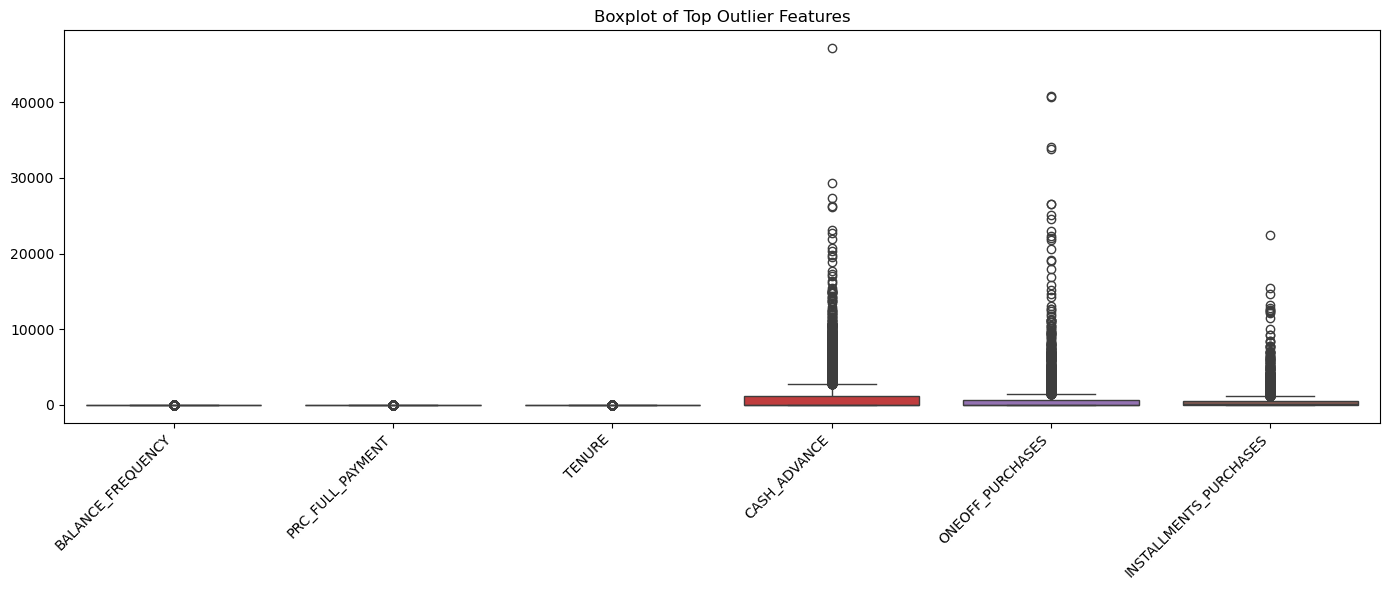

In [134]:
# Select top N columns with highest outlier ratios for visualization
top_cols = outlier_summary.head(6).index.tolist()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[top_cols])
plt.title('Boxplot of Top Outlier Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

จากกราฟ Boxplot ของตัวแปรที่มีสัดส่วน Outlier สูง พบว่าแต่ละตัวแปรมีช่วงข้อมูลหลัก (IQR) ค่อนข้างแคบ แต่มีการกระจายตัวออกไปทางค่าที่สูงอย่างชัดเจน ซึ่งสะท้อนว่าลูกค้าส่วนใหญ่อยู่ในช่วงการใช้จ่ายหรือพฤติกรรมที่ปกติ ขณะที่มีลูกค้าจำนวนเล็กน้อยที่มีค่าการใช้จ่ายหรือจำนวนรายการสูงกว่ากลุ่มใหญ่เป็นอย่างมาก

จุดที่กระจายออกนอกกล่องถือเป็น Outlier ตามเกณฑ์ IQR ซึ่งมักแสดงถึงพฤติกรรมการใช้บัตรในระดับสูง เช่น การเบิกเงินสดจำนวนมาก การใช้จ่ายแบบ One-off หรือ Installment ในระดับสูง เป็นต้น

ในการวิเคราะห์ชุดข้อมูลนี้ไม่ได้ทำการตัด Outlier ทิ้ง แต่เลือกใช้วิธีการปรับสเกลที่ทนต่อ Outlier (เช่น RobustScaler) และเทคนิคการลดมิติ เพื่อให้สามารถเก็บรักษาโครงสร้างของข้อมูลทั้งหมด รวมถึงพฤติกรรมของลูกค้ากลุ่มที่มีค่าผิดปกติ ซึ่งอาจเป็นกลุ่มที่มีลักษณะเฉพาะในการทำ Clustering ต่อไป


### **3.3.4 Relationship & Correlation Analysis**

ในขั้นตอนนี้ เป็นการวิเคราะห์ความสัมพันธ์ของตัวแปร ถือเป็นขั้นตอนสำคัญในการทำความเข้าใจโครงสร้างของข้อมูล  
ช่วยระบุว่าตัวแปรใดส่งผลหรือมีความสัมพันธ์ร่วมกัน (co-movement) และสามารถใช้เป็นแนวทางในการเลือกตัวแปร  
การสร้าง Feature Space และการตีความผลลัพธ์ของ Clustering ในภายหลัง

#### **(1) ความสัมพันธ์ระหว่าง Credit Limit และ Balance แยกตาม Tenure**

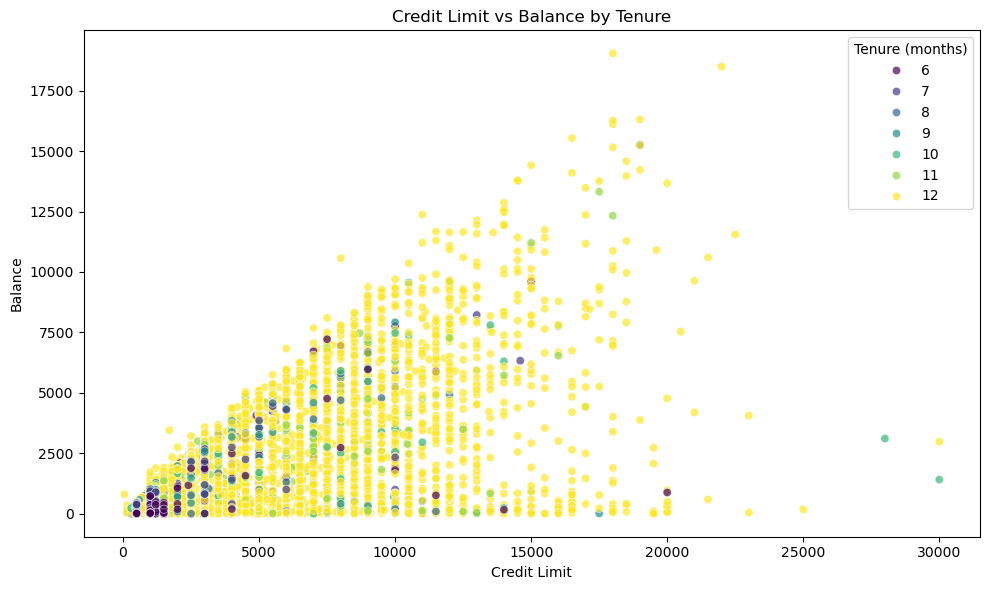

In [135]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='CREDIT_LIMIT',
    y='BALANCE',
    hue='TENURE',
    palette='viridis',
    alpha=0.7
)
plt.title("Credit Limit vs Balance by Tenure")
plt.xlabel("Credit Limit")
plt.ylabel("Balance")
plt.legend(title='Tenure (months)')
plt.tight_layout()
plt.show()


จากกราฟความสัมพันธ์ระหว่างวงเงินเครดิต (Credit Limit) และยอดคงเหลือ (Balance) พบว่ามีแนวโน้มเชิงบวก กล่าวคือเมื่อลูกค้ามีวงเงินสูงขึ้น มักพบยอดคงเหลือที่สูงขึ้นตามไปด้วย ซึ่งสะท้อนว่าพฤติกรรมการใช้วงเงินมีความสัมพันธ์กับระดับวงเงินที่ได้รับ

เมื่อพิจารณาตามระยะเวลาการเป็นสมาชิก (Tenure) จะเห็นว่าลูกค้าที่มี Tenure สูง โดยเฉพาะกลุ่มที่อยู่ในระบบนาน 11–12 เดือน มักอยู่ในช่วงวงเงินที่สูงกว่า อย่างไรก็ตาม ระดับ Balance ของลูกค้าในกลุ่มนี้ยังมีความหลากหลาย แสดงว่าความสามารถในการบริหารยอดคงเหลือแตกต่างกันไปในแต่ละบุคคล

รูปแบบดังกล่าวชี้ให้เห็นถึงความเป็นไปได้ของการเกิดกลุ่มลูกค้าที่มีลักษณะพฤติกรรมต่างกัน เช่น  
- กลุ่มวงเงินสูงแต่ยอดคงเหลืออยู่ในระดับต่ำ  
- กลุ่มที่มีทั้งวงเงินและยอดคงเหลืออยู่ในระดับสูง  
- กลุ่มวงเงินต่ำและยอดคงเหลือต่ำ


#### **(2) ความสัมพันธ์ระหว่างยอดใช้จ่ายรวม (Purchases) และยอดใช้จ่ายครั้งเดียว (One-off Purchases)**

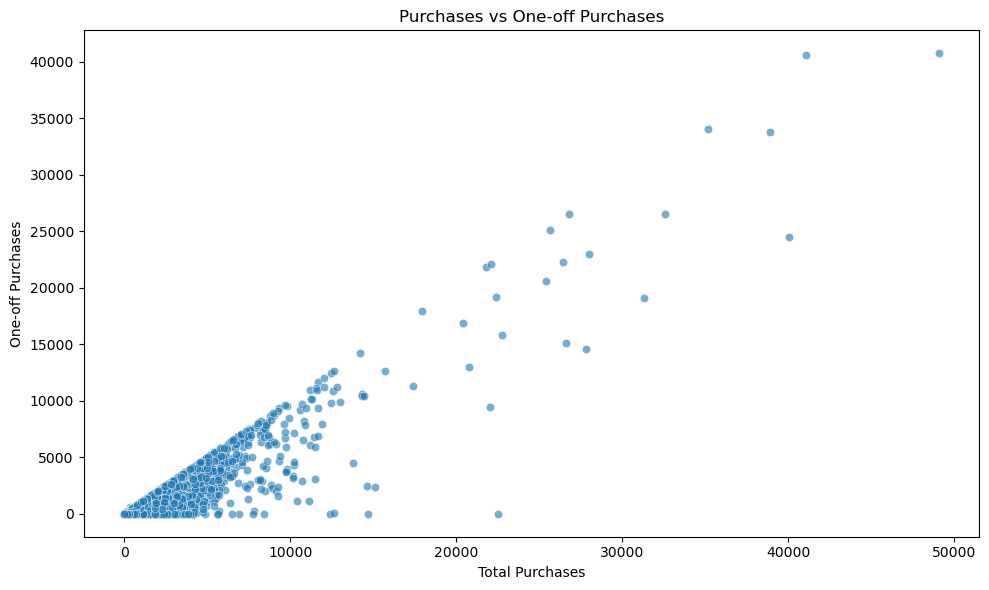

In [136]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='PURCHASES',
    y='ONEOFF_PURCHASES',
    alpha=0.6
)
plt.title("Purchases vs One-off Purchases")
plt.xlabel("Total Purchases")
plt.ylabel("One-off Purchases")
plt.tight_layout()
plt.show()


จากการวิเคราะห์พบว่า ลูกค้าส่วนใหญ่มียอดการใช้จ่ายอยู่ในระดับต่ำถึงปานกลาง และมีสัดส่วนการใช้จ่ายแบบ One-off ในระดับต่ำ ซึ่งสอดคล้องกับพฤติกรรมการใช้บัตรเพื่อการใช้จ่ายประจำวันหรือรายการมูลค่าไม่สูงมาก

อย่างไรก็ตาม พบกลุ่มลูกค้าจำนวนหนึ่งที่มียอดใช้จ่ายรวมสูงมาก และมี One-off Purchases ในระดับสูงตามไปด้วย สะท้อนถึงพฤติกรรมการใช้จ่ายแบบก้อนใหญ่หรือรายการมูลค่าสูง ซึ่งแตกต่างจากกลุ่มลูกค้าทั่วไปอย่างชัดเจน

ข้อมูลนี้แสดงให้เห็นถึงการเกิดลักษณะพฤติกรรมที่แตกต่างกันอย่างน้อยสองกลุ่ม ได้แก่  
1. ลูกค้าที่ใช้จ่ายในระดับทั่วไปเป็นประจำ  
2. ลูกค้าที่มีการใช้จ่ายครั้งเดียวในมูลค่าสูง  

#### **(3) ความสัมพันธ์ระหว่างยอดชำระขั้นต่ำ (Minimum Payments) และยอดชำระทั้งหมด (Payments)**

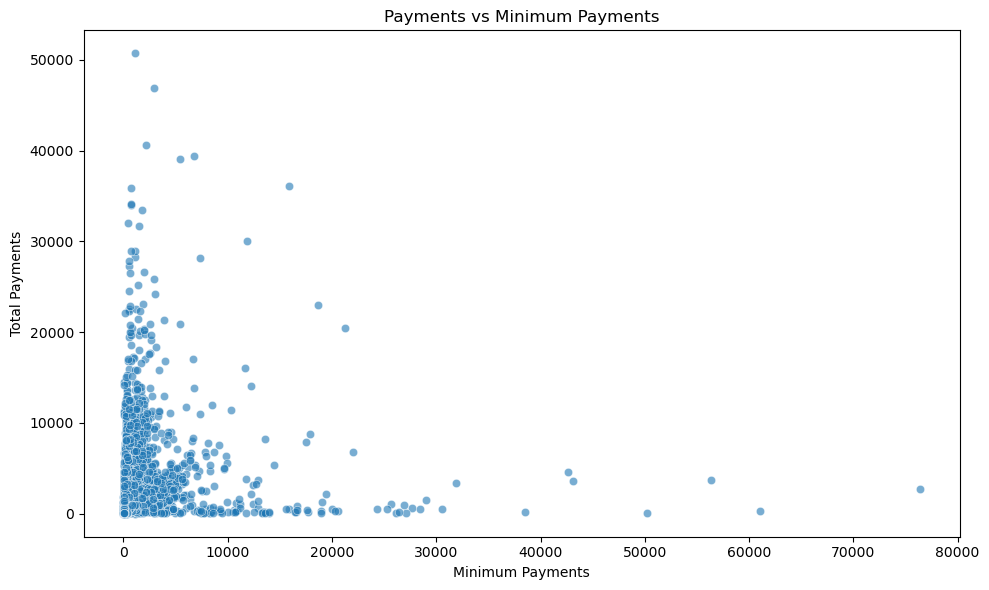

In [137]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='MINIMUM_PAYMENTS',
    y='PAYMENTS',
    alpha=0.6
)
plt.title("Payments vs Minimum Payments")
plt.xlabel("Minimum Payments")
plt.ylabel("Total Payments")
plt.tight_layout()
plt.show()


จากกราฟความสัมพันธ์ระหว่างยอดชำระขั้นต่ำ (Minimum Payments) และยอดชำระรวม (Total Payments) พบว่าลูกค้าส่วนใหญ่มียอดชำระอยู่ในระดับใกล้เคียงกับยอดขั้นต่ำ สะท้อนพฤติกรรมการชำระแบบจำกัด ซึ่งอาจสะท้อนถึงภาระทางการเงินหรือความสามารถในการชำระที่จำกัดในแต่ละรอบบิล

ในทางตรงกันข้าม ยังพบกลุ่มลูกค้าบางส่วนที่มียอดชำระรวมสูงกว่า Minimum Payments อย่างมีนัยสำคัญ แสดงให้เห็นถึงวินัยทางการเงินที่ดีขึ้นและความสามารถในการบริหารยอดค้างชำระได้อย่างมีประสิทธิภาพมากกว่า

จากรูปแบบการกระจายตัวนี้สามารถแบ่งลักษณะพฤติกรรมหลักออกเป็นสองกลุ่ม ได้แก่  
1. ลูกค้าที่ชำระยอดใกล้เคียงขั้นต่ำ ซึ่งอาจเป็นกลุ่มที่มีความเสี่ยงทางการเงินสูงกว่า  
2. ลูกค้าที่ชำระยอดสูงกว่าขั้นต่ำอย่างชัดเจน ซึ่งสะท้อนความเสี่ยงต่ำกว่าและมีแนวโน้มบริหารภาระหนี้ได้ดี


#### **(4) Correlation Analysis**


การวิเคราะห์ความสัมพันธ์ (Correlation Analysis) ถูกใช้เพื่อดูความเชื่อมโยงกันระหว่างตัวแปรภายในชุดข้อมูล โดยใช้ Correlation Value แบบ **Spearman** ซึ่งเหมาะสมกับข้อมูลที่มีการกระจายแบบไม่เป็นเชิงเส้นและมี outlier อยู่จำนวนหนึ่ง ทำให้ผลการวัดความสัมพันธ์มีความต่อ Outlier และตีความได้แม่นยำกว่า


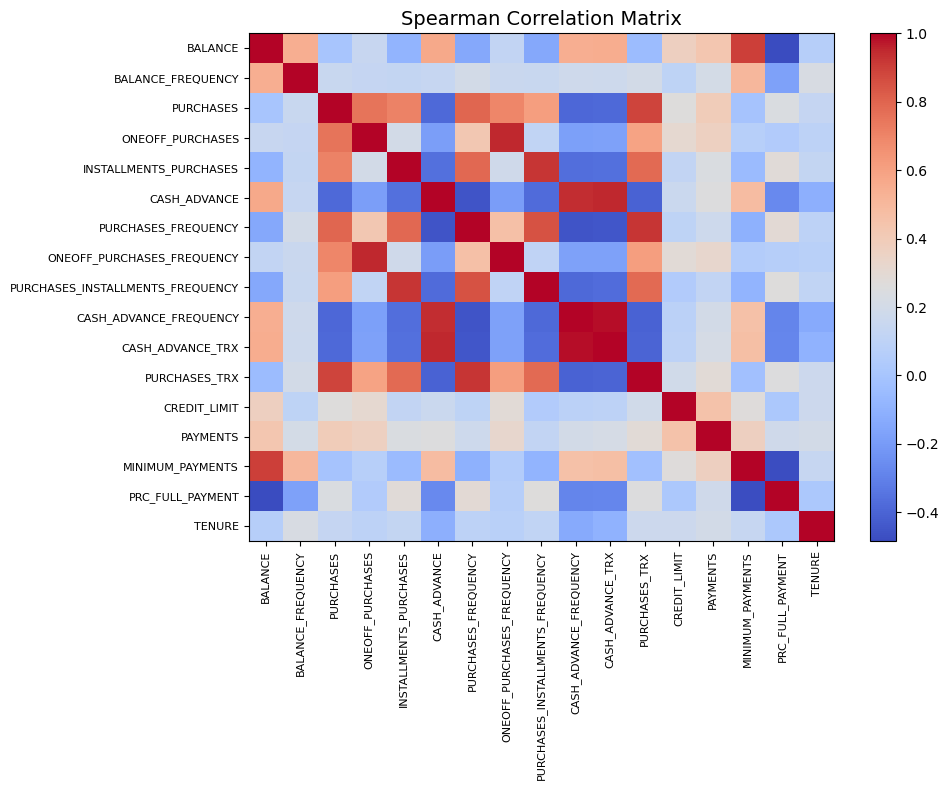

In [138]:
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include="number").copy()
corr_spear = num_df.corr(method="spearman")

plt.figure(figsize=(10,8))
plt.imshow(corr_spear, aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.title("Spearman Correlation Matrix", fontsize=14)
plt.xticks(range(len(corr_spear.columns)), corr_spear.columns, rotation=90, fontsize=8)
plt.yticks(range(len(corr_spear.index)), corr_spear.index, fontsize=8)
plt.tight_layout()
plt.show()


จากผลการวิเคราะห์ Spearman Correlation พบว่ากลุ่มตัวแปรด้านการใช้จ่าย  
เช่น `PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES`  
รวมถึงตัวแปรด้านความถี่ในการทำรายการ มีความสัมพันธ์สูงภายในกลุ่มเดียวกัน  
สะท้อนว่าลูกค้าที่มียอดใช้จ่ายสูงมักมีทั้งจำนวนครั้งและรูปแบบการใช้จ่ายหลายประเภทควบคู่กัน

ในขณะที่ตัวแปรด้านการเบิกเงินสดล่วงหน้า เช่น `CASH_ADVANCE และ CASH_ADVANCE_TRX`  
มีความสัมพันธ์สูงภายในกลุ่ม Cash Advance แต่มีความสัมพันธ์ต่ำกับตัวแปรการใช้จ่ายทั่วไป  
แสดงถึงพฤติกรรมอีกลักษณะหนึ่งที่แตกต่างอย่างชัดเจนจากผู้ใช้บัตรทั่วไป

ผลลัพธ์นี้ชี้ให้เห็นว่าข้อมูลมีโครงสร้างเชิงพฤติกรรมที่แบ่งเป็นกลุ่มย่อยได้อย่างชัดเจน  
ซึ่งเป็นประโยชน์ต่อทั้ง **การเลือกตัวแปรสำหรับ Feature Engineering**  
และ **การลดมิติในขั้นตอน PCA/UMAP**  
รวมถึงช่วยเสริมประสิทธิภาพของ **Clustering** ในการจำแนกกลุ่มลูกค้าที่มีพฤติกรรมแตกต่างกัน

# **4.) Feature Engineering**

การทำ Feature Engineering ใน project นี้มีวัตถุประสงค์เพื่อ “สร้างชุดฟีเจอร์ที่หลากหลาย”  
เพื่อใช้เป็นฐานข้อมูลสำหรับการทดลองร่วมกับโมเดล Clustering ในรูปแบบต่าง ๆ  
โดยมิได้เลือกเพียงรูปแบบที่ดีที่สุดล่วงหน้า แต่ใช้แนวคิดแบบ **systematic experimentation**  
เพื่อประเมินผลทุก Feature Space, Scaling Method และ Transformation อย่างเป็นกลาง

จากผลการวิเคราะห์ Distribution, Outliers และ Correlation พบว่าข้อมูลมีความเบ้สูง (right-skewed)  
มี Outliers จำนวนมาก และมีความสัมพันธ์ของตัวแปรเป็นกลุ่ม ๆ ดังนั้น Feature Engineering  
จึงแบ่งออกเป็น 3 แนวทางหลัก ดังนี้

---

## **4.1 การสร้างฟีเจอร์ใหม่ (New Feature Creation)**

จากผลการวิเคราะห์ Distribution และ Correlation พบว่าพฤติกรรมการใช้บัตรเครดิตมีโครงสร้างเชิงกลุ่มที่ชัดเจน  
เช่น ความถี่การใช้งาน ความสามารถในการหมุนเงิน และสัดส่วนการใช้วงเงิน ดังนั้นจึงได้ออกแบบฟีเจอร์ใหม่  
เพื่อเพิ่มความสามารถของโมเดลในการสะท้อนพฤติกรรมลูกค้าเชิงรวม (aggregate behaviour) ดังนี้:

1. **F_freq – Composite Frequency Behaviour**  
   ฟีเจอร์นี้ผสานข้อมูลความถี่ในการใช้จ่าย (`PURCHASES_FREQUENCY`)  และจำนวนครั้งที่เบิกเงินสด (`CASH_ADVANCE_TRX`) ในสัดส่วนเล็กน้อย  เพื่อใช้แทนระดับความ “active” ของบัญชี 
   - `F_freq` = `PURCHASES_FREQUENCY` + 0.01 * `CASH_ADVANCE_TRX` 
2. **M_monetary – Composite Monetary Value**  
   ฟีเจอร์นี้สรุปภาพรวมของมูลค่าการหมุนเงินโดยรวมของลูกค้า  ผ่านการรวมยอดใช้จ่าย (`PURCHASES`), ยอดชำระเงิน (`PAYMENTS`)  และยอดเบิกเงินสด (`CASH_ADVANCE`)  
   - `M_monetary` = `PURCHASES` + `PAYMENTS` +  `CASH_ADVANCE`
3. **BALANCE_TO_LIMIT – Utilization Ratio**  
   สัดส่วนยอดคงเหลือต่อยอดวงเงิน เป็นตัวแทนพฤติกรรมด้านการใช้วงเงิน (credit utilization)  ซึ่งมักเชื่อมโยงกับการบริหารความเสี่ยงและพฤติกรรมทางการเงิน  
   - `BALANCE_TO_LIMIT` = `BALANCE` / `CREDIT_LIMIT`

In [139]:
df_add = df.copy()
# df['R_recency'] = df['BALANCE_FREQUENCY']
df_add['F_freq'] = df_add['PURCHASES_FREQUENCY'] + 0.01 * df_add['CASH_ADVANCE_TRX']
df_add['M_monetary'] = df_add['PURCHASES'] + df_add['PAYMENTS'] + df_add['CASH_ADVANCE']
df_add['BALANCE_TO_LIMIT'] = df_add['BALANCE'] / df_add['CREDIT_LIMIT']

In [140]:
df_add.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'F_freq', 'M_monetary', 'BALANCE_TO_LIMIT'],
      dtype='object')

ฟีเจอร์ทั้งสามถูกออกแบบเพื่อเพิ่มความสามารถของโมเดล Clustering  ในการแยกแยะพฤติกรรมของลูกค้าที่แตกต่างกัน เช่น ลูกค้าที่ใช้บัตรถี่มาก ลูกค้ากลุ่มมูลค่าสูง  หรือกลุ่มที่มีสัดส่วนการใช้วงเงินสูง ซึ่งข้อมูลเหล่านี้จะถูกนำไปใช้ร่วมกับ Feature Space  ในขั้นตอนการสร้างชุดทดลอง (Experiment Setup) เพื่อประเมินผลและค้นหาโมเดลที่เหมาะสมที่สุด

## **4.2 การเตรียมชุดข้อมูลสำหรับการทดลอง (Feature Variants)**

หลังจากสร้างฟีเจอร์ใหม่ และได้ชุดข้อมูลในรูปของ `df_add`  Project นี้ไม่ได้เลือกใช้เพียงชุดฟีเจอร์เดียว แต่เตรียม **สองชุดข้อมูลหลัก** เพื่อใช้ในการเปรียบเทียบผลการทำ Clustering ดังนี้

- `df` : ชุดข้อมูลหลัง Data Cleaning ที่ประกอบด้วยฟีเจอร์ดั้งเดิมทั้งหมด  
- `df_add` : ชุดข้อมูลเดียวกันแต่มีการเพิ่มฟีเจอร์ใหม่ 3 ตัว ได้แก่  
  `F_freq`, `M_monetary` และ `BALANCE_TO_LIMIT`

In [141]:
df = df.copy()
df_add = df_add.copy()

เหตุผลที่ต้องใช้ทั้งสองชุด คือเพื่อประเมินว่าการเพิ่มฟีเจอร์ใหม่
ช่วยปรับปรุงคุณภาพของการทำคลัสเตอร์หรือไม่ โดยไม่ตัดสินใจล่วงหน้า
แต่ให้กระบวนการทดลองเป็นตัวเลือกผลลัพธ์ที่ดีที่สุด

# **5.) Experiment Setup**

ขั้นตอน Experiment Setup ถูกออกแบบเพื่อประเมินผลของกระบวนการ Preprocessing  Feature Space และโมเดล Clustering อย่างเป็นระบบ โดยทดสอบคอมบิเนชันทั้งหมดของ

- วิธีการจัดการ Missing Values (Imputation Methods)  
- รูปแบบ Feature Space  
- เทคนิคการลดมิติ (PCA และ UMAP)  
- โมเดล Clustering หลายประเภท  
- พารามิเตอร์ของแต่ละโมเดล  

บนชุดข้อมูล 2 รูปแบบ ได้แก่ `df` (ฟีเจอร์ดั้งเดิม) และ `df_add` (เพิ่มฟีเจอร์ใหม่)

แนวคิดหลักคือ **ให้ระบบทดลองทุก configuration แล้วเลือกผลลัพธ์ที่ดีที่สุดจากคะแนนประเมิน**  
แทนการเลือก preprocessing ล่วงหน้า

---

## **5.1 Missing Value Imputation**

ข้อมูลชุดนี้มี Missing Values บางส่วน โดยเฉพาะในตัวแปร  
`CREDIT_LIMIT` และ `MINIMUM_PAYMENTS` ซึ่งจำเป็นต้องทำ Imputation  
ก่อนนำข้อมูลไปผ่านการปรับสเกลและการทำ Clustering

เพื่อไม่ให้ผลลัพธ์ลำเอียงจากวิธีการ Imputation เพียงแบบเดียว  
จึงทดลองวิธีที่แตกต่างกัน 3 รูปแบบ ได้แก่

- **Median Imputation** — ใช้ค่ากลาง เหมาะกับข้อมูลที่มี Outliers  
- **KNN Imputer (k = 5)** — ใช้ข้อมูลที่คล้ายกันเพื่อทดแทน  
- **Iterative Imputer (MICE)** — แบบจำลองเชิงถดถอยแบบวนซ้ำระหว่างตัวแปร  

วิธีการเหล่านี้จะถูกรวมเข้าใน Pipeline การทดลองเพื่อประเมินว่ารูปแบบการ Imputation แบบใดให้ผลลัพธ์ของ Clustering ที่มีเสถียรภาพและมีคุณภาพดีที่สุด

ซึ่งกำหนดเป็น Dictionary ดังนี้:

In [142]:
imputers = {
    "median": SimpleImputer(strategy="median"),
    "knn_k5": KNNImputer(n_neighbors=5, weights="uniform"),
    "iterative_mice": IterativeImputer(random_state=RANDOM_STATE, max_iter=10)
}

def apply_imputer(name, df):
    imp = imputers[name]
    X_imp = pd.DataFrame(imp.fit_transform(df), columns=df.columns)
    return X_imp

## **5.2 Feature Spaces และการปรับสเกล**


หลังจากจัดการ Missing Values แล้ว ข้อมูลเชิงตัวเลขจะถูกนำไปสร้าง Feature Space หลายรูปแบบ  
เพื่อให้โมเดล Clustering มองเห็นโครงสร้างข้อมูลได้จากมุมมองที่แตกต่างกัน ทั้งในแง่สเกลของข้อมูล  
และในแง่การลดมิติ

ขั้นตอนแรกคือการสร้าง **Base Feature Spaces** จากข้อมูลที่ผ่าน Imputation แล้ว  
โดยใช้การปรับสเกลหลายวิธี ได้แก่

1. **Raw Space** – ใช้ค่าดิบโดยไม่ปรับสเกล เหมาะสำหรับใช้เปรียบเทียบเบื้องต้น  
2. **Standard Scaled Space** – ใช้ StandardScaler ทำให้แต่ละตัวแปรมีค่าเฉลี่ย 0 และส่วนเบี่ยงเบนมาตรฐาน 1  
3. **Robust Scaled Space** – ใช้ RobustScaler ที่อาศัย Median และ IQR ทำให้ทนทานต่อ Outlier มากกว่า  
4. **Log1p + Standard Scaled Space** – แปลงข้อมูลด้วย log(1+x) เพื่อลดความเบ้ ก่อนทำ Standard Scaling 

ฟังก์ชัน `build_base_spaces()` จึงทำหน้าที่รับ DataFrame ที่เป็นข้อมูลตัวเลข (`X_df`)  
และคืนค่าเป็น dict ของ Feature Spaces ที่แตกต่างกัน เพื่อใช้ต่อในขั้นตอน PCA, UMAP และ Clustering

In [143]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

def _safe_log1p_frame(df_num):
    """
    แปลง log1p สำหรับกรณีมีค่าศูนย์/ลบ:
    - หากมีค่าติดลบ: ชิฟต์ทั้งตารางให้ค่าต่ำสุดเป็น 1 ก่อนค่อย log1p
    - หากไม่มีค่าติดลบ: log1p ได้ทันที
    """
    X = df_num.copy().astype(float)
    global_min = X.min().min()
    if global_min <= 0:
        X = X - global_min + 1.0
    return np.log1p(X)

def build_base_spaces(X_df):
    """
    สร้าง Base Spaces (ไม่รวม PCA):
      - raw
      - standard
      - robust
      - log1p_standard
    """
    spaces = {}
    # raw
    spaces['raw'] = X_df.values

    # standard
    spaces['standard'] = StandardScaler().fit_transform(X_df.values)

    # robust
    spaces['robust'] = RobustScaler().fit_transform(X_df.values)

    # log1p + standard
    X_log = _safe_log1p_frame(X_df)
    spaces['log1p_standard'] = StandardScaler().fit_transform(X_log)

    return spaces

###  **5.2.1 Dimensionality Reduction (PCA / UMAP)**

เพื่อให้มองเห็นโครงสร้างของข้อมูลในมิติที่ต่ำลง และช่วยให้การทำ Clustering มีความเสถียรมากขึ้น โปรเจกต์นี้จึงใช้เทคนิคการลดมิติสองประเภท ได้แก่ Principal Component Analysis (PCA) และ UMAP


#### **(1) PCA-based Feature Spaces**

เพื่อให้โมเดลสามารถจับโครงสร้างข้อมูลเชิงความแปรปรวนได้ดีขึ้น  
ได้ใช้เทคนิค Principal Component Analysis (PCA) บนข้อมูลที่ถูกสเกลแล้ว  
ทั้งในกรณีที่ใช้ StandardScaler และ RobustScaler

กระบวนการนี้ประกอบด้วย:

1. คำนวณสัดส่วนความแปรปรวนสะสม (cumulative explained variance) จาก PCA แบบ full model  
2. หา "elbow point" ด้วยฟังก์ชัน `_knee_point()` เพื่อประมาณจำนวนมิติที่เหมาะสม  
3. สร้างชุด coverage หลายค่า (เช่น 0.80–0.95 รอบ elbow) ผ่าน `_coverage_candidates()`  
4. สร้าง PCA Feature Spaces หลายชุดตามค่า coverage ต่าง ๆ  
   โดยตั้งชื่อในรูปแบบ `std_pca_xx` หรือ `robust_pca_xx` ตามชนิดการสเกลที่ใช้

ฟังก์ชัน `build_hybrid_pca_spaces()` จึงทำหน้าที่สร้าง PCA Spaces ทั้งจาก StandardScaler และ RobustScaler  
และคืนค่าเป็น dict ของชื่อ space → ข้อมูลที่ถูกลดมิติแล้ว เพื่อนำไปใช้ใน experiment loop ต่อไป

In [144]:
# ===== 4) PCA Hybrid Optimization =====
def _knee_point(y):
    """หาจุด elbow ด้วย second-derivative (max curvature)"""
    y = np.asarray(y, dtype=float)
    d1 = np.gradient(y)
    d2 = np.gradient(d1)
    return int(np.argmax(np.abs(d2)))

def _coverage_candidates(elbow_cov, base=(0.80, 0.85, 0.90, 0.95)):
    """สร้างชุด coverage รอบ elbow และคงช่วง 0.80–0.95"""
    s = set(base)
    for delta in (-0.05, 0.0, 0.05):
        cand = float(np.clip(elbow_cov + delta, 0.80, 0.95))
        s.add(round(cand, 4))
    return sorted(s)

def _pca_spaces_from_scaled(X_scaled, label_prefix, random_state=42):
    """
    รับข้อมูลที่ 'ถูกสเกลแล้ว' → สร้าง PCA spaces ตาม coverage candidates
    คืนค่า: dict(name -> X_pca), list(coverages), elbow_cov
    """
    pca_full = PCA(random_state=random_state).fit(X_scaled)
    cum = np.cumsum(pca_full.explained_variance_ratio_)
    elbow_idx = _knee_point(cum)
    elbow_cov = float(cum[elbow_idx])

    coverages = _coverage_candidates(elbow_cov)
    spaces = {}
    for cov in coverages:
        n_comp = int(np.searchsorted(cum, cov) + 1)
        n_comp = max(2, n_comp)   # ป้องกัน 1D trap
        P = PCA(n_components=n_comp, random_state=random_state)
        X_pca = P.fit_transform(X_scaled)
        spaces[f'{label_prefix}_pca_{cov:.2f}'] = X_pca

    return spaces, coverages, elbow_cov

def build_hybrid_pca_spaces(X_df, random_state=42, verbose=True):
    """
    ทำ PCA Hybrid จากทั้ง Standard และ Robust:
      - StandardScaler → PCA  (prefix: std)
      - RobustScaler   → PCA  (prefix: robust)
    """
    # scale ทั้งสองแบบ
    X_std = StandardScaler().fit_transform(X_df.values)
    X_rob = RobustScaler().fit_transform(X_df.values)

    # PCA จาก std
    std_pca_spaces, std_covs, std_elbow = _pca_spaces_from_scaled(
        X_std, label_prefix='std', random_state=random_state
    )

    # PCA จาก robust
    rob_pca_spaces, rob_covs, rob_elbow = _pca_spaces_from_scaled(
        X_rob, label_prefix='robust', random_state=random_state
    )

    if verbose:
        print(f"[PCA/Standard] elbow≈ {std_elbow:.4f} | coverages: {std_covs}")
        print(f"[PCA/Robust]   elbow≈ {rob_elbow:.4f} | coverages: {rob_covs}")

    # รวม
    spaces = {}
    spaces.update(std_pca_spaces)
    spaces.update(rob_pca_spaces)
    return spaces, (std_covs, rob_covs), (std_elbow, rob_elbow)

# ===== ตัวอย่างการใช้งานแบบครบเซ็ต =====
# (สมมติ df_num คือ DataFrame ตัวเลขที่ผ่าน imputation แล้ว)
# 1) Base spaces
# base_spaces = build_base_spaces(df_num)

# 2) Hybrid PCA spaces (std + robust)
# pca_spaces, (std_covs, rob_covs), (std_elbow, rob_elbow) = build_hybrid_pca_spaces(df_num)

# 3) รวมทั้งหมดเพื่อเข้า experiment loop
# all_spaces = {**base_spaces, **pca_spaces}
# for sp_name, X in all_spaces.items():
#     ... รันโมเดลและเก็บคะแนน ...

#### **(2) UMAP-based Feature Spaces**

นอกจาก PCA ซึ่งเป็นวิธีลดมิติแบบเชิงเส้นแล้ว  Project นี้ยังใช้  
Uniform Manifold Approximation and Projection (UMAP)  
เพื่อสำรวจโครงสร้างข้อมูลในมิติที่ต่ำลงแบบไม่เชิงเส้น (nonlinear)

ได้สร้าง UMAP Feature Spaces หลายชุดจากข้อมูลที่ถูกสเกลด้วยทั้ง StandardScaler และ RobustScaler  
โดยทดลองค่าพารามิเตอร์ในกริด เช่น

- `n_neighbors` : 10, 30, 50  
- `min_dist`    : 0.0, 0.1, 0.5  
- `n_components`: 2 (มิติสองมิติสำหรับการทำคลัสเตอร์และการมองภาพรวม)  

ฟังก์ชัน `build_hybrid_umap_spaces()` จะเรียก `build_umap_spaces_from_scaler()`  
เพื่อสร้าง embeddings หลายชุด แล้วรวมเป็น dict ของชื่อ space → ข้อมูล UMAP embedding  
ซึ่งต่อมาจะถูกส่งเข้ากระบวนการทดลอง Clustering เช่นเดียวกับ Base Spaces และ PCA Spaces

In [145]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [146]:
# ===== 4B) UMAP Hybrid Spaces =====
# ต้องติดตั้ง: pip install umap-learn
try:
    from umap import UMAP
except Exception as e:
    # บาง environment ใช้ umap.umap_ แทน
    try:
        from umap.umap_ import UMAP
    except Exception as e2:
        raise ImportError("ต้องติดตั้งแพ็กเกจ 'umap-learn' ก่อนใช้งาน UMAP") from e2

from sklearn.preprocessing import StandardScaler, RobustScaler

def build_umap_spaces_from_scaler(
    X_df,
    scaler,
    label_prefix,
    random_state=42,
    neighbor_grid=(10, 30, 50),
    mindist_grid=(0.0, 0.1, 0.5),
    n_components_grid=(2, ),
    metric='euclidean'
):
    """
    สร้าง UMAP spaces จากข้อมูลที่ผ่าน scaler:
      - สร้างหลาย embeddings ตามกริดของ (n_neighbors × min_dist × n_components)
      - คืน dict: {f'{prefix}_umap_n{n}_d{md}_c{c}': X_emb}
    """
    Xs = scaler.fit_transform(X_df.values)
    spaces = {}
    for n in neighbor_grid:
        for md in mindist_grid:
            for c in n_components_grid:
                um = UMAP(
                    n_neighbors=n,
                    min_dist=md,
                    n_components=c,
                    metric=metric,
                    random_state=random_state
                )
                X_emb = um.fit_transform(Xs)
                key = f"{label_prefix}_umap_n{n}_d{md}_c{c}"
                spaces[key] = X_emb
    return spaces

def build_hybrid_umap_spaces(X_df, random_state=42, verbose=True):
    """
    ทำ UMAP จากทั้ง Standard และ Robust:
      - StandardScaler → UMAP (prefix: std)
      - RobustScaler   → UMAP (prefix: robust)
    """
    # กำหนดกริดเริ่มต้นแบบพอดี
    neighbor_grid   = (10, 30, 50)
    mindist_grid    = (0.0, 0.1, 0.5)
    ncomp_grid      = (2,)      # ใช้ 2D เป็นหลักสำหรับ clustering, ถ้าทรัพยากรพอเพิ่ม (3,) ได้
    metric          = 'euclidean'

    std_spaces = build_umap_spaces_from_scaler(
        X_df, StandardScaler(), 'std', random_state,
        neighbor_grid, mindist_grid, ncomp_grid, metric
    )
    rob_spaces = build_umap_spaces_from_scaler(
        X_df, RobustScaler(), 'robust', random_state,
        neighbor_grid, mindist_grid, ncomp_grid, metric
    )
    if verbose:
        print(f"[UMAP/std]   generated: {len(std_spaces)} spaces")
        print(f"[UMAP/robust] generated: {len(rob_spaces)} spaces")

    all_umap = {**std_spaces, **rob_spaces}
    return all_umap


ฟังก์ชัน `build_hybrid_pca_spaces` และ `build_hybrid_umap_spaces`
จะถูกเรียกใช้ภายใน Pipeline การทดลอง เพื่อสร้าง Feature Space
ทั้งในเชิงเชิงเส้น (PCA) และไม่เชิงเส้น (UMAP) จากข้อมูลที่ผ่านการเติมค่าและ Scaling แล้ว
ทำให้โมเดล Clustering มีทางเลือกในการเรียนรู้โครงสร้างข้อมูลที่หลากหลาย


## **5.3 Clustering Models และการรันการทดลอง**

เพื่อประเมินโครงสร้างของลูกค้าในเชิงกลุ่ม (clusters) ได้ทดลองโมเดล Clustering หลายรูปแบบ  
ได้แก่เพื่อประเมินความเหมาะสมกับข้อมูลพฤติกรรมลูกค้าบัตรเครดิตที่มีความซับซ้อนและมีการกระจายตัวหลากหลาย โดยโมเดลที่ใช้ประกอบด้วย:

1. **K-Means** – โมเดลแบบ Partition-Based ที่แบ่งข้อมูลออกเป็น k กลุ่มโดยใช้ค่าเฉลี่ยของแต่ละกลุ่มเป็นตัวแทน (centroid) เหมาะกับข้อมูลที่มีโครงสร้างคล้ายทรงกลม  
2. **Agglomerative Clustering** – โมเดลแบบ Hierarchical Bottom-up ที่เริ่มจากข้อมูลจุดเดี่ยวแล้วรวมเข้าหากันเป็นกลุ่มใหญ่ เหมาะกับการค้นหาโครงสร้างเชิงลำดับชั้น  
3. **Gaussian Mixture Model (GMM)** – โมเดลแบบ Probabilistic ที่มองกลุ่มเป็นการผสมของหลาย Gaussian Distributions ทำให้สามารถจับรูปทรงของกลุ่มที่ซับซ้อนได้ดีกว่า K-Means  
4. **DBSCAN** – โมเดล Density-Based ที่จัดกลุ่มจากความหนาแน่นของข้อมูล สามารถรับมือกับกลุ่มที่ไม่เป็นทรงกลมและสามารถระบุ Noise/Outlier ได้อย่างมีประสิทธิภาพ


ฟังก์ชันส่วน helper ได้แก่:

- `eps_candidates_from_space()`  
  ใช้คำนวณ candidate ของค่า `eps` สำหรับ DBSCAN จาก distribution ของ pairwise distances  
- `evaluate_labels()`  
  ใช้คำนวณตัวชี้วัดคุณภาพคลัสเตอร์ (Silhouette, CHI, DBI) หากจำนวนคลัสเตอร์เพียงพอ

ส่วนฟังก์ชันหลัก `run_full_experiment()` ทำหน้าที่รันทุกคอมบิเนชันของ:

- Imputer (median, knn_k5, iterative_mice)  
- Feature Space (raw, standard, robust, log1p_standard, PCA, UMAP)  
- Clustering Model (K-Means, GMM, Agglomerative, DBSCAN)  
- Hyperparameters ของแต่ละโมเดล

โดยเราจะมีการรันโมเดลทั้งหมด2รอบ รอบที่1เป็นการรันโมเดลด้วย raw data | `df` ส่วนรอบที่ 2 เป็นการ รันโมเดลด้วย `df_add` ที่มีการสร้าง feature ใหม่ และจะรวมผลลัพธ์ทั้งคู่ไว้ด้วยกันในไฟล์เดียว

จากนั้นจะทำการประเมินผลลัพธ์ด้วยตัวชี้วัดคุณภาพของCluster ได้แก่  **Silhouette Score**, **Calinski–Harabasz Index** และ **Davies–Bouldin Index**  เพื่อเก็บผลลัพธ์ของแต่ละ configuration นำไปใช้คัดเลือกโมเดลที่ดีที่สุดในหัวข้อถัดไป

In [147]:
# ===== 5) Experiment Setup (run all combinations) =====
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)

RANDOM_STATE = 42

# --- 5.1 helpers ---
def eps_candidates_from_space(X, sample_size=1500, percentiles=(5,10,20,30,40,50), rng_seed=RANDOM_STATE):
    """
    คำนวณ eps candidates จาก distribution ของ pairwise distances ภายใน space นั้น ๆ
    - สุ่ม sample เพื่อลดภาระคำนวณ
    - คืนค่า eps ที่ไม่เป็นศูนย์/ซ้ำ
    """
    rng = np.random.default_rng(rng_seed)
    n = X.shape[0]
    if n > sample_size:
        idx = rng.choice(n, size=sample_size, replace=False)
        Xs = X[idx]
    else:
        Xs = X

    # สุ่ม anchor บางจุดเพื่อประมาณระยะทาง
    anchors = rng.choice(Xs.shape[0], size=min(100, Xs.shape[0]), replace=False)
    d_all = []
    for a in anchors:
        diff = Xs - Xs[a]
        d = np.sqrt((diff * diff).sum(axis=1))
        d_all.append(d)
    d_all = np.concatenate(d_all, axis=0)

    eps_list = []
    for p in percentiles:
        val = float(np.percentile(d_all, p))
        if val > 0:
            eps_list.append(round(val, 6))
    eps_list = sorted(set(eps_list))
    # fallback
    if not eps_list:
        eps_list = [0.1, 0.3, 0.5]
    return eps_list

def evaluate_labels(X, labels):
    """
    คืน metric dict หรือ None (ถ้า cluster < 2 หรือ metric คำนวณไม่ได้)
    """
    uniq = np.unique(labels)
    if len(uniq) < 2 or (len(uniq) == 1 and uniq[0] == -1):
        return None
    try:
        sil = silhouette_score(X, labels)
        chi = calinski_harabasz_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
        return dict(silhouette=sil, chi=chi, dbi=dbi)
    except Exception:
        return None


# --- 5.2 main experiment runner ---
def run_full_experiment(df_numeric, imputers_dict, include_spaces=None, verbose=True):
    """
    รันการทดลองทุกคอมโบ: Imputer × Space × Model × Params (รวม Hybrid PCA + UMAP)
      - df_numeric: DataFrame หลังตัด id และแปลงเป็น numeric แล้ว (ยังไม่ impute)
      - imputers_dict: {"median": SimpleImputer(...), "knn_k5": KNNImputer(...), ...}
      - include_spaces: ช่วย filter space ถ้าต้องการ (เช่น เฉพาะ ["standard","std_pca_0.90","std_umap_n30_d0.1_c2"])
    Return: DataFrame ของผลลัพธ์ทุกรัน (ยังไม่คำนวณ composite)
    """
    rows = []

    for imp_name, imp in imputers_dict.items():
        if verbose: print(f"\n[Imputer] {imp_name}")

        # 1) Impute
        X_imp = pd.DataFrame(imp.fit_transform(df_numeric), columns=df_numeric.columns)

        # 2) Base spaces
        base_spaces = build_base_spaces(X_imp)

        # 3) Hybrid PCA spaces (std + robust)
        pca_spaces, (std_covs, rob_covs), (std_elbow, rob_elbow) = build_hybrid_pca_spaces(
            X_imp, random_state=RANDOM_STATE, verbose=False
        )
        if verbose:
            print(f"  PCA(std)    elbow≈{std_elbow:.3f} cov={std_covs}")
            print(f"  PCA(robust) elbow≈{rob_elbow:.3f} cov={rob_covs}")

        # 4B) Hybrid UMAP spaces (std + robust)  ← ★★ เพิ่มส่วนนี้ ★★
        # ต้องมีฟังก์ชัน build_hybrid_umap_spaces จากหัวข้อ 4B แล้ว
        umap_spaces = build_hybrid_umap_spaces(
            X_imp, random_state=RANDOM_STATE, verbose=False
        )
        if verbose:
            print(f"  UMAP spaces: {len(umap_spaces)} variants")

        # 5) Merge spaces (Base + PCA + UMAP)
        all_spaces = {**base_spaces, **pca_spaces, **umap_spaces}

        # 6) (optional) filter spaces
        if include_spaces is not None:
            all_spaces = {k:v for k,v in all_spaces.items() if k in include_spaces}
            if verbose:
                print("  Using spaces:", list(all_spaces.keys()))

        # 7) Evaluate models per space
        for sp_name, X in all_spaces.items():
            if verbose: print(f"  [Space] {sp_name}  n={X.shape[0]} d={X.shape[1]}")

            # --- Precompute eps for DBSCAN in this space ---
            eps_cands = eps_candidates_from_space(X)

            # --- KMeans / GMM / Agglomerative over k=3..10 ---
            for k in range(3, 11):
                # KMeans
                try:
                    km = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_STATE)
                    lab = km.fit_predict(X)
                    m = evaluate_labels(X, lab)
                    if m:
                        rows.append(dict(imputer=imp_name, space=sp_name, model='kmeans',
                                         params=dict(n_clusters=k), **m))
                except Exception:
                    pass

                # GMM
                try:
                    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=RANDOM_STATE)
                    lab = gmm.fit_predict(X)
                    m = evaluate_labels(X, lab)
                    if m:
                        rows.append(dict(imputer=imp_name, space=sp_name, model='gmm',
                                         params=dict(n_components=k), **m))
                except Exception:
                    pass

                # Agglomerative
                try:
                    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
                    lab = agg.fit_predict(X)
                    m = evaluate_labels(X, lab)
                    if m:
                        rows.append(dict(imputer=imp_name, space=sp_name, model='agglomerative',
                                         params=dict(n_clusters=k, linkage='ward'), **m))
                except Exception:
                    pass

            # --- DBSCAN grid (eps × min_samples) ---
            for ms in (5, 10, 20):
                for eps in eps_cands:
                    try:
                        db = DBSCAN(eps=eps, min_samples=ms)
                        lab = db.fit_predict(X)
                        m = evaluate_labels(X, lab)
                        if m:
                            rows.append(dict(imputer=imp_name, space=sp_name, model='dbscan',
                                             params=dict(eps=eps, min_samples=ms), **m))
                    except Exception:
                        pass

    return pd.DataFrame(rows)

### **5.3.1  Run `df` Experiment**

เป็นการรันรอบที่ 1 โดย `df` = raw data

In [148]:
# ===== Example usage =====
# หมายเหตุ: ต้องนิยาม imputers, build_base_spaces, build_hybrid_pca_spaces, build_hybrid_umap_spaces ไว้แล้ว
exp_raw = run_full_experiment(
    df_numeric=df,
    imputers_dict=imputers,
    include_spaces=None,   # หรือกรองรายชื่อ spaces เฉพาะที่อยากรันเพื่อลดเวลา
    verbose=True
)
exp_raw["source"] = "df"      # หรือ "raw"


[Imputer] median
  PCA(std)    elbow≈0.476 cov=[0.8, 0.85, 0.9, 0.95]
  PCA(robust) elbow≈0.548 cov=[0.8, 0.85, 0.9, 0.95]
  UMAP spaces: 18 variants
  [Space] raw  n=8950 d=17
  [Space] standard  n=8950 d=17
  [Space] robust  n=8950 d=17
  [Space] log1p_standard  n=8950 d=17
  [Space] std_pca_0.80  n=8950 d=7
  [Space] std_pca_0.85  n=8950 d=8
  [Space] std_pca_0.90  n=8950 d=10
  [Space] std_pca_0.95  n=8950 d=12
  [Space] robust_pca_0.80  n=8950 d=5
  [Space] robust_pca_0.85  n=8950 d=6
  [Space] robust_pca_0.90  n=8950 d=7
  [Space] robust_pca_0.95  n=8950 d=9
  [Space] std_umap_n10_d0.0_c2  n=8950 d=2
  [Space] std_umap_n10_d0.1_c2  n=8950 d=2
  [Space] std_umap_n10_d0.5_c2  n=8950 d=2
  [Space] std_umap_n30_d0.0_c2  n=8950 d=2
  [Space] std_umap_n30_d0.1_c2  n=8950 d=2
  [Space] std_umap_n30_d0.5_c2  n=8950 d=2
  [Space] std_umap_n50_d0.0_c2  n=8950 d=2
  [Space] std_umap_n50_d0.1_c2  n=8950 d=2
  [Space] std_umap_n50_d0.5_c2  n=8950 d=2
  [Space] robust_umap_n10_d0.0_c2  n=8950

### **5.3.2  Run `df_add` Experiment**

เป็นการรันรอบที่ 2 โดย `df_add` = data ที่มีการเพิ่ม feature มา

In [149]:
exp_add = run_full_experiment(
    df_numeric=df_add,
    imputers_dict=imputers,
    include_spaces=None,
    verbose=True
)
exp_add["source"] = "df_add"  # หรือ "raw_plus_domain"

# รวมผลลัพธ์สองชุด
exp_results = pd.concat([exp_raw, exp_add], ignore_index=True)

exp_results.to_csv("Result.csv", index=False)


[Imputer] median
  PCA(std)    elbow≈0.485 cov=[0.8, 0.85, 0.9, 0.95]
  PCA(robust) elbow≈0.549 cov=[0.8, 0.85, 0.9, 0.95]
  UMAP spaces: 18 variants
  [Space] raw  n=8950 d=20
  [Space] standard  n=8950 d=20
  [Space] robust  n=8950 d=20
  [Space] log1p_standard  n=8950 d=20
  [Space] std_pca_0.80  n=8950 d=7
  [Space] std_pca_0.85  n=8950 d=9
  [Space] std_pca_0.90  n=8950 d=10
  [Space] std_pca_0.95  n=8950 d=12
  [Space] robust_pca_0.80  n=8950 d=5
  [Space] robust_pca_0.85  n=8950 d=6
  [Space] robust_pca_0.90  n=8950 d=7
  [Space] robust_pca_0.95  n=8950 d=9
  [Space] std_umap_n10_d0.0_c2  n=8950 d=2
  [Space] std_umap_n10_d0.1_c2  n=8950 d=2
  [Space] std_umap_n10_d0.5_c2  n=8950 d=2
  [Space] std_umap_n30_d0.0_c2  n=8950 d=2
  [Space] std_umap_n30_d0.1_c2  n=8950 d=2
  [Space] std_umap_n30_d0.5_c2  n=8950 d=2
  [Space] std_umap_n50_d0.0_c2  n=8950 d=2
  [Space] std_umap_n50_d0.1_c2  n=8950 d=2
  [Space] std_umap_n50_d0.5_c2  n=8950 d=2
  [Space] robust_umap_n10_d0.0_c2  n=8950


ผลลัพธ์จากการทดลองทั้งหมดจะถูกเก็บในตัวแปร `exp_results`
ซึ่งมีคอลัมน์ระบุ Imputer, Space, Model, Source, พารามิเตอร์ที่ใช้ และค่า Metrics ได้แก่
Silhouette, Calinski–Harabasz (CHI) และ Davies–Bouldin (DBI)


In [150]:
print(exp_results.shape)
exp_results.head()

(5812, 8)


,imputer,space,model,params,silhouette,chi,dbi,source
0,median,raw,kmeans,{'n_clusters': 3},0.466078,3080.273685,1.189542,df
1,median,raw,gmm,{'n_components': 3},0.057109,539.055116,3.514633,df
2,median,raw,agglomerative,"{'n_clusters': 3, 'linkage': 'ward'}",0.509025,2337.108254,1.057982,df
3,median,raw,kmeans,{'n_clusters': 4},0.467715,2693.977722,1.101297,df
4,median,raw,gmm,{'n_components': 4},-0.046180,479.916670,2.612863,df


# **6.) Model Evaluation & Ranking**

หลังจากรวบรวมผลการทดลองทั้งหมดจากการทดลอง 
ซึ่งประกอบด้วยคอมบิเนชันของ Imputer × Feature Space × Model × Parameters  
ข้อมูลผลลัพธ์ถูกเก็บใน DataFrame `exp_results`  
โดยมีตัวชี้วัดหลัก 3 รายการ ได้แก่:

- **Silhouette Score** (ยิ่งมากยิ่งดี)  
- **Calinski–Harabasz Index (CHI)** (ยิ่งมากยิ่งดี)  
- **Davies–Bouldin Index (DBI)** (ยิ่งน้อยยิ่งดี)

เพื่อให้สามารถเปรียบเทียบคุณภาพของคอนฟิกูเรชันทั้งหมดบนสเกลเดียวกัน  
จึงต้องมีขั้นตอน Normalization และสร้าง Composite Score เพื่อใช้จัดอันดับโมเดลที่ดีที่สุด

ขั้นตอนแบ่งเป็น 3 ส่วนหลัก ได้แก่:

1. **Normalization:** ปรับให้ metric อยู่บนช่วง 0–1  
2. **Composite Score:** รวมคะแนน normalized metrics ทุกตัว  
3. **Ranking & Selecting Best Configurations:** จัดอันดับคอนฟิกตาม Composite Score

ขั้นตอนนี้ช่วยให้สามารถเลือก configuration ที่ให้ผลดีที่สุดอย่างเป็นระบบ และสะดวกต่อการนำไปใช้ต่อในขั้นตอน Cluster Profiling

In [151]:
# ===== Setup & Helpers =====
import pandas as pd
import numpy as np
import ast

# น้ำหนักของแต่ละ metric (ต้องรวมกัน = 1.0)
WEIGHTS = dict(
    silhouette=1/3,
    chi=1/3,
    dbi=1/3,   # dbi จะกลับทิศให้ "ค่าน้อย = ดี" กลายเป็น "ค่าสูง = ดี"
)

dfc = exp_results.copy()

def _to_params_dict(p):
    """แปลง params ให้กลายเป็น dict แม้จะถูกเก็บเป็น string อยู่"""
    if isinstance(p, dict):
        return p
    if isinstance(p, str):
        try:
            return ast.literal_eval(p)
        except Exception:
            return {}
    return {}

def extract_k_like(row):
    """
    ดึงจำนวนCluster/componentจาก params:
    - n_clusters (เช่น KMeans, Agglomerative, GMM)
    - n_components (เช่น PCA/UMAP บางแบบ)
    ถ้าไม่มีให้คืน NaN (เช่น DBSCAN)
    """
    p = _to_params_dict(row.get("params", {}))
    if "n_clusters" in p:
        return p["n_clusters"]
    if "n_components" in p:
        return p["n_components"]
    return np.nan


## **6.1 Normalization ของตัวชี้วัด (silhouette, chi, dbi)**

ในขั้นตอนนี้จะทำการปรับสเกลค่าตัวชี้วัดให้อยู่ในช่วงเดียวกัน (0–1) ด้วยวิธี **min–max normalization** ภายในชุดผลลัพธ์เดียวกัน โดยใช้ฟังก์ชัน `add_normalized_scores(df)` ซึ่งจะสร้างคอลัมน์ใหม่ ดังนี้:

- `silhouette_norm`  
- `chi_norm`  
- `dbi_norm`  
- `dbi_norm_inv` (กลับทิศของ DBI: ค่ายิ่งน้อยยิ่งดี → แปลงให้เป็นค่ายิ่งมากยิ่งดี)

การทำ Normalization ช่วยให้ตัวชี้วัดที่มีสเกลต่างกันสามารถนำมาเปรียบเทียบและใช้รวมคะแนนในขั้นตอนต่อไปได้อย่างเหมาะสม


In [152]:
def add_normalized_scores(df, score_cols=("silhouette", "chi", "dbi")):
    """
    สร้าง normalized scores แบบ min-max ต่อคอลัมน์
    และสร้าง dbi_norm_inv สำหรับใช้ใน composite

    Parameters
    ----------
    df : pd.DataFrame
        ตารางผลการทดลอง (เช่น dfc)
    score_cols : iterable
        รายชื่อคอลัมน์คะแนนดิบที่ต้องการ normalize

    Returns
    -------
    out : pd.DataFrame
        DataFrame ใหม่ที่มีคอลัมน์ *_norm และ dbi_norm_inv เพิ่มเข้ามา
    """
    out = df.copy()

    for col in score_cols:
        if col not in out.columns:
            raise KeyError(f"Column '{col}' not found in DataFrame.")
        mn, mx = out[col].min(), out[col].max()
        out[col + "_norm"] = (out[col] - mn) / (mx - mn + 1e-9)

    # กลับทิศ DBI: ค่าน้อยดี → อยากให้สูงดีเหมือนกัน
    if "dbi_norm" in out.columns:
        out["dbi_norm_inv"] = 1 - out["dbi_norm"]

    return out

# ใช้งาน: สร้าง normalized scores จากสำเนาหลัก dfc
df_norm = add_normalized_scores(dfc)
df_norm.head()

,imputer,space,model,params,silhouette,chi,dbi,source,silhouette_norm,chi_norm,dbi_norm,dbi_norm_inv
0,median,raw,kmeans,{'n_clusters': 3},0.466078,3080.273685,1.189542,df,0.628541,0.166494,0.167743,0.832257
1,median,raw,gmm,{'n_components': 3},0.057109,539.055116,3.514633,df,0.223705,0.029005,0.596296,0.403704
2,median,raw,agglomerative,"{'n_clusters': 3, 'linkage': 'ward'}",0.509025,2337.108254,1.057982,df,0.671053,0.126286,0.143494,0.856506
3,median,raw,kmeans,{'n_clusters': 4},0.467715,2693.977722,1.101297,df,0.630161,0.145594,0.151478,0.848522
4,median,raw,gmm,{'n_components': 4},-0.046180,479.916670,2.612863,df,0.121461,0.025806,0.430085,0.569915


หลังจากทำ Min–Max Normalization แล้ว  
ค่าสำหรับ Silhouette, CHI, และ DBI ถูกปรับให้อยู่ในช่วงเดียวกัน (0–1) ทำให้เปรียบเทียบได้ง่ายขึ้น:

- **silhouette_norm**: ค่ายิ่งสูงหมายถึงโครงสร้างClusterแยกกันชัดเจน  
- **chi_norm**: ค่ายิ่งสูงสะท้อนความกระจายตัวของClusterที่ดีขึ้น  
- **dbi_norm_inv**: ค่ายิ่งสูงหมายถึงคุณภาพClusterดีขึ้น (เพราะ DBI เดิมยิ่งน้อยยิ่งดี)

คอนฟิกที่มีค่า silhouette_norm และ dbi_norm_inv สูง  
มักเป็นคอนฟิกที่มีโครงสร้างClusterชัดเจนและเสถียรที่สุดในชุดทดลองนี้

## **6.2 Composite Score จาก Normalized Metrics**

เมื่อได้ทำการ Normalize ตัวชี้วัดทั้งสามตัวแล้ว จะมีการสร้าง **คะแนนรวม (Composite Score)**  
ซึ่งเป็นตัวชี้วัดสรุปที่ใช้ในการเปรียบเทียบประสิทธิภาพของแต่ละ configuration ในภาพรวม

Composite Score คือการรวมคะแนนของ  
- **Silhouette (ยิ่งมากยิ่งดี)**  
- **CHI (ยิ่งมากยิ่งดี)**  
- **DBI แบบกลับทิศ (dbi_norm_inv: ยิ่งมากยิ่งดี)**  

ให้อยู่ในตัวเลขเดียว โดยถ่วงน้ำหนักด้วยค่าที่กำหนดในตัวแปร `WEIGHTS` เพื่อให้ทั้งสามตัวชี้วัดมีผลต่อคะแนนรวมอย่างสมดุล

สมการที่ใช้คือ:

$$
\text{composite} =
w_{sil} \cdot \text{silhouette\_norm} +
w_{chi} \cdot \text{chi\_norm} +
w_{dbi} \cdot \text{dbi\_norm\_inv}
$$

ซึ่งค่าน้ำหนัก \( w_{sil}, w_{chi}, w_{dbi} \) ถูกตั้งค่าเท่ากันในงานทดลองครั้งนี้  
ทำให้ Composite Score ทำหน้าที่เป็น “คะแนนภาพรวม” ที่สะท้อนคุณภาพการจัดกลุ่มจากทั้งสาม Metric พร้อมกัน  
และใช้ในการจัดอันดับว่า Configuration ใดมีประสิทธิภาพสูงที่สุดในการทำ Clustering


In [153]:
def add_composite_score(df, weights=WEIGHTS):
    """
    คำนวณ composite score จากคอลัมน์ *_norm
    และ dbi_norm_inv ที่เตรียมไว้แล้ว

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame ที่มีคอลัมน์:
        - silhouette_norm
        - chi_norm
        - dbi_norm_inv
    weights : dict
        น้ำหนักของแต่ละ metric เช่น WEIGHTS

    Returns
    -------
    out : pd.DataFrame
        DataFrame ใหม่ที่มีคอลัมน์ 'composite' เพิ่มเข้ามา
    """
    out = df.copy()

    required_cols = ["silhouette_norm", "chi_norm", "dbi_norm_inv"]
    missing = [c for c in required_cols if c not in out.columns]
    if missing:
        raise KeyError(f"Missing normalized columns: {missing}. "
                       "Please run add_normalized_scores() first.")

    w_sil = weights.get("silhouette", 0.0)
    w_chi = weights.get("chi", 0.0)
    w_dbi = weights.get("dbi", 0.0)

    out["composite"] = (
        w_sil * out["silhouette_norm"]
        + w_chi * out["chi_norm"]
        + w_dbi * out["dbi_norm_inv"]
    )

    return out

# ใช้งาน: เพิ่ม composite score เข้าไปใน df_norm
df_comp = add_composite_score(df_norm)
df_comp.head()

,imputer,space,model,params,silhouette,chi,dbi,source,silhouette_norm,chi_norm,dbi_norm,dbi_norm_inv,composite
0,median,raw,kmeans,{'n_clusters': 3},0.466078,3080.273685,1.189542,df,0.628541,0.166494,0.167743,0.832257,0.542431
1,median,raw,gmm,{'n_components': 3},0.057109,539.055116,3.514633,df,0.223705,0.029005,0.596296,0.403704,0.218805
2,median,raw,agglomerative,"{'n_clusters': 3, 'linkage': 'ward'}",0.509025,2337.108254,1.057982,df,0.671053,0.126286,0.143494,0.856506,0.551282
3,median,raw,kmeans,{'n_clusters': 4},0.467715,2693.977722,1.101297,df,0.630161,0.145594,0.151478,0.848522,0.541426
4,median,raw,gmm,{'n_components': 4},-0.046180,479.916670,2.612863,df,0.121461,0.025806,0.430085,0.569915,0.239060


## **6.3 การจัดอันดับ (Ranking) และจัดรูปแบบตาราง**

หลังจากคำนวณ composite score แล้ว ขั้นตอนสุดท้ายคือการจัดอันดับผลลัพธ์เพื่อหา *configuration* ที่ดีที่สุด โดยทำตามขั้นตอนต่อไปนี้:

1. **Extract ค่า `k` จาก `params`**  
   เพื่อให้สามารถเปรียบเทียบจำนวนClusterหรือจำนวนcomponentของแต่ละโมเดลได้ง่ายขึ้น

2. **สร้างคอลัมน์ `rank_overall`**  
   โดยจัดเรียงจากค่า `composite` มาก → น้อย  
   ทำให้เห็นลำดับความเหมาะสมของแต่ละโมเดลในภาพรวม

3. **จัดรูปแบบตารางใหม่ (Column Ordering)**  
   นำคอลัมน์สำคัญ เช่น imputer, space, model, k, metrics และ composite  
   มาเรียงให้เป็นลำดับที่อ่านง่ายและสอดคล้องกับ pipeline การทดลอง

4. **แสดงผลการจัดอันดับในภาพรวม**  
   โดยดูคอลัมน์สำคัญ เช่น  
   - `rank_overall`  
   - `model`  
   - `params`  
   - `composite`  
   เพื่อประเมินว่าโมเดลและ space ใดทำผลงานดีที่สุดในรอบการทดลองนี้


In [154]:
def add_ranking(df):
    """
    เพิ่มคอลัมน์ 'k' และ 'rank_overall' แล้วจัดรูปแบบตารางสำหรับอ่านผล

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame ที่มีคอลัมน์ 'composite' อย่างน้อย
        และ (optionally) 'params' สำหรับดึง k

    Returns
    -------
    ranked : pd.DataFrame
        ตารางจัดอันดับ (ยิ่ง rank_overall เล็ก = ดี)
    """
    out = df.copy()

    # จำนวนกลุ่ม/component (ถ้ามี params)
    if "params" in out.columns:
        out["k"] = out.apply(extract_k_like, axis=1)
    else:
        out["k"] = np.nan

    if "composite" not in out.columns:
        raise KeyError("Column 'composite' not found. "
                       "Please run add_composite_score() first.")

    # อันดับรวม: composite สูง → อันดับ 1
    out["rank_overall"] = (
        out["composite"]
        .rank(ascending=False, method="dense")
        .astype(int)
    )

    # จัดลำดับคอลัมน์หลักให้อ่านง่าย
    base_cols = [
        "rank_overall",
        "imputer",
        "space",
        "model",
        "params",
        "k",
        "silhouette",
        "chi",
        "dbi",
        "composite",
        "source",
    ]
    base_cols = [c for c in base_cols if c in out.columns]

    # เอาคอลัมน์ normalized ต่อท้าย
    extra_cols = [
        c for c in out.columns
        if c not in base_cols and (c.endswith("_norm") or c.endswith("_inv"))
    ]

    ordered_cols = base_cols + extra_cols
    ranked = out.loc[:, ordered_cols]

    # เรียงตามอันดับและ model
    ranked = ranked.sort_values(
        ["rank_overall", "model"],
        ascending=[True, True],
    ).reset_index(drop=True)

    return ranked

# ใช้งาน: สร้างตาราง ranking จาก df_comp
ranked = add_ranking(df_comp)
ranked.head()

,rank_overall,imputer,space,model,params,k,silhouette,chi,dbi,composite,source,silhouette_norm,chi_norm,dbi_norm,dbi_norm_inv
0,1,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 9},9.0,0.502015,18309.872724,0.629384,0.863362,df,0.664114,0.990468,0.064497,0.935503
1,2,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 10},10.0,0.484159,18486.055083,0.689347,0.856963,df,0.646438,1.000000,0.075549,0.924451
2,3,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 8},8.0,0.485495,17290.893814,0.672627,0.836877,df,0.647761,0.935338,0.072467,0.927533
3,4,iterative_mice,robust_umap_n10_d0.0_c2,agglomerative,"{'n_clusters': 9, 'linkage': 'ward'}",9.0,0.480364,17028.755426,0.664343,0.830965,df,0.642681,0.921155,0.070940,0.929060
4,5,median,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 8},8.0,0.489181,16776.389250,0.677407,0.828521,df,0.651410,0.907501,0.073348,0.926652


### ผลการจัดอันดับโมเดล

จากตารางผลลัพธ์และการจัดอันดับด้วยค่า composite (ผสม Silhouette, Calinski–Harabasz และ Davies–Bouldin) สามารถสรุปโมเดลอันดับต้น ๆ ได้ดังนี้

1. อันดับ 1 – KMeans (k = 9) + Robust UMAP (n_neighbors = 10, min_dist = 0.0) + Iterative MICE  
   - composite ≈ **0.863**  
   - Silhouette ≈ **0.502**, DBI ≈ **0.63** และ CHI สูงมาก (≈ 18,310)  
   - สะท้อนว่าโครงสร้างของคลัสเตอร์ชัดเจน แยกกลุ่มได้ดี และมีความหนาแน่นภายในกลุ่มเหมาะสม  
   - การใช้ **RobustScaler + UMAP** ช่วยจัดโครงสร้างข้อมูลให้อยู่ใน space ที่เหมาะกับการแบ่งกลุ่มได้ดีที่สุด

2. อันดับ 2 – KMeans (k = 10) + Robust UMAP (n_neighbors = 10, min_dist = 0.0) + Iterative MICE  
   - composite ≈ **0.857**  
   - Silhouette ≈ **0.484**, DBI ≈ **0.69**, CHI สูงสุดในกลุ่ม (≈ 18,486)  
   - ให้ผลใกล้เคียงอันดับ 1 มาก โดยแลกความคมชัดภายในกลุ่มกับจำนวนคลัสเตอร์ที่เพิ่มขึ้นเป็น 10 กลุ่ม  
   - แสดงว่าช่วงจำนวนคลัสเตอร์ 9–10 เป็นช่วงที่เหมาะสมกับโครงสร้างข้อมูลนี้

3. อันดับ 3 – KMeans (k = 8) + Robust UMAP (n_neighbors = 10, min_dist = 0.0) + Iterative MICE  
   - composite ≈ **0.837**  
   - Silhouette ≈ **0.486**, DBI ≈ **0.67**, CHI ≈ 17,291  
   - ให้คุณภาพการแบ่งกลุ่มอยู่ในระดับสูงเช่นกัน แม้จำนวนคลัสเตอร์ลดลงเหลือ 8 กลุ่ม  
   - สะท้อนว่าข้อมูลมีโครงสร้างรองรับการแบ่งเป็นหลายกลุ่มได้อย่างยืดหยุ่นในช่วง k = 8–10

4. อันดับ 4 – Agglomerative (k = 9) + Robust UMAP (n_neighbors = 10, min_dist = 0.0) + Iterative MICE  
   - composite ≈ **0.831**  
   - Silhouette ≈ **0.480**, DBI ≈ **0.66**, CHI ≈ 17,029  
   - ผลลัพธ์ใกล้เคียงกับ KMeans แสดงว่าโครงสร้างใน Robust UMAP space รองรับได้ทั้ง centroid-based และ hierarchical clustering  
   - ชี้ให้เห็นว่ารูปทรงของคลัสเตอร์อาจไม่ได้เป็นทรงกลมสมบูรณ์ทั้งหมด ทำให้วิธีเชิงลำดับชั้นยังคงทำงานได้ดี

5. อันดับ 5 – KMeans (k = 8) + Robust UMAP (n_neighbors = 10, min_dist = 0.0) + Median Imputation  
   - composite ≈ **0.829**  
   - Silhouette ≈ **0.489**, DBI ≈ **0.68**, CHI ≈ 16,776  
   - แม้เปลี่ยนวิธีเติม Missing จาก Iterative MICE เป็น Median คะแนนยังอยู่ในระดับสูงมาก  
   - แสดงให้เห็นว่าโครงสร้างของ Feature Space (Robust UMAP) มีผลต่อคุณภาพการจัดกลุ่มมากกว่าวิธีการเติม Missing value

### สรุปภาพรวมจากผลการจัดอันดับ

- โมเดลอันดับต้น ๆ ทั้งหมดอยู่ใน **Robust UMAP space (n_neighbors = 10, min_dist = 0.0)**  
  แสดงว่า Feature Space นี้เหมาะสมที่สุดสำหรับการทำ Clustering กับข้อมูลชุดนี้  
- **Iterative MICE imputer** ให้คะแนนดีกว่า Median เล็กน้อย แต่ความแตกต่างไม่มากนัก  
  จึงสรุปได้ว่าวิธีสร้าง Feature Space มีอิทธิพลต่อผลลัพธ์มากกว่าวิธีเติม Missing  
- **KMeans และ Agglomerative ให้ผลใกล้เคียงกัน** ใน Robust UMAP space  
  โดยเฉพาะเมื่อจำนวนคลัสเตอร์อยู่ในช่วง **k = 8–10**  
- ค่า **Silhouette สูงและ DBI ต่ำ** ในคอนฟิกอันดับต้น ๆ สะท้อนว่าคลัสเตอร์ที่ได้มีความชัดเจน  
  และเหมาะสมสำหรับนำไปใช้ในการทำ Cluster Profiling และวิเคราะห์พฤติกรรมลูกค้าต่อไป


## **6.4 การนำเสนอผลการจัดอันดับและการเลือก Best Configuration**

#### **ทำตารางสรุปผลลัพธ์:**

หลังจากสร้างตาราง `ranked` (ที่มี composite score, normalized metrics, และลำดับ rank ครบถ้วนแล้ว)  
เราสามารถดึงสรุปผลลัพธ์ในหลายมุมมองได้ดังนี้:

0. **การจัดรูปแบบตาราง (styling)**
1. **Top Composite `df` vd `df_add`**
   เลือกคอนฟิกที่ดีที่สุดของแต่ละ source เพื่อนำมาเปรียบเทียบกันว่า เมื่อมีฟีเจอร์เพิ่มเติมขึ้นมา ช่วยเพิ่มประสิทธิภาพการแบ่งกลุ่มหรือไม่
2. **Overall Top 20**  
   เลือกคอนฟิกที่มี composite score สูงที่สุด 20 อันดับ  
   เพื่อดูว่าโมเดล–imputer–space แบบไหนทำผลงานดีที่สุดรวมทั้งหมด

3. **Top-N ต่อโมเดล (Top-N per Model)**  
   เช่น Top 5 ของแต่ละโมเดล (KMeans, Agglomerative, GMM, DBSCAN)  
   เพื่อเปรียบเทียบว่าในแต่ละโมเดล คอนฟิกที่ดีที่สุดคือแบบใด

4. **Top-N ต่อ imputer (Top-N per Imputer)**  
   เช่น Median, KNN, Iterative MICE  
   ช่วยให้ประเมินผลกระทบของวิธีเติม Missing ได้ชัดเจนยิ่งขึ้น

5. **Best ของแต่ละ space (Best per Feature Space)**  
   เช่น raw, standard, robust, log1p_std, PCA spaces, UMAP spaces  
   ทำให้เห็นว่า space ไหนเหมาะกับข้อมูลมากที่สุดในการทำ clustering  
   (จากผลการทดลอง robust_umap มักเป็น space ที่ perform ดีที่สุด)

6. **Stable Candidates (เสถียรทั้ง silhouette และ DBI)**  
   เลือกเฉพาะคอนฟิกที่ผ่านเงื่อนไข  
   - silhouette ≥ median  
   - dbi ≤ median  
   เพื่อหาคอนฟิกที่มีคุณภาพ “สม่ำเสมอ” ไม่ได้คะแนนสูงจาก metric ใด metric หนึ่งเพียงอย่างเดียว

### **6.4.0 การจัดรูปแบบตาราง (Styling)**

ฟังก์ชัน `style_rank_table()` มีวัตถุประสงค์เพื่อ:

- เน้นคอลัมน์ `composite` ด้วยการทำสีพื้นแบบ gradient (ยิ่งสีเข้มยิ่งคะแนนสูง)  
- จัดรูปแบบตัวเลขของ metric หลัก (`silhouette`, `chi`, `dbi`, `composite`) ให้มีทศนิยมเท่ากัน  

In [155]:
def style_rank_table(df):
    """
    สร้าง pandas Styler เพื่อเน้นคอลัมน์ composite และ metric หลัก
    ใช้ร่วมกับ display() ใน notebook
    """
    numeric_cols = [
        c for c in ["silhouette", "chi", "dbi", "composite"]
        if c in df.columns
    ]

    s = (
        df.style
        .background_gradient(subset=["composite"], cmap="YlGn")
        .format(precision=6, subset=numeric_cols)
        .set_properties(
            subset=["rank_overall", "model", "imputer", "space"],
            **{"font-weight": "bold"},
        )
    )
    return s

### **6.4.1 การเปรียบเทียบ Best Configuration ตามแหล่งข้อมูล (`df` vs `df_add`)**

เพื่อเปรียบเทียบผลของการใช้ฟีเจอร์ดั้งเดิม (df) กับชุดที่เพิ่มฟีเจอร์ใหม่ (df_add)
ได้สรุป “คอนฟิกที่ดีที่สุดของแต่ละ source” โดยเลือกแถวที่มี Composite Score สูงสุด
สำหรับแต่ละค่า source

In [156]:
best_by_source = (
    ranked
    .sort_values(
        ["source", "composite", "silhouette", "chi"],
        ascending=[True, False, False, False],
    )
    .groupby("source", as_index=False)
    .head(1)     # ถ้าอยากดูมากกว่า 1 แถว/แหล่ง เปลี่ยนเป็น head(3) ได้
)

display(style_rank_table(best_by_source))

,rank_overall,imputer,space,model,params,k,silhouette,chi,dbi,composite,source,silhouette_norm,chi_norm,dbi_norm,dbi_norm_inv
0,1,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 9},9.000000,0.502015,18309.872724,0.629384,0.863362,df,0.664114,0.990468,0.064497,0.935503
41,42,median,robust_umap_n50_d0.0_c2,kmeans,{'n_clusters': 8},8.000000,0.483832,13695.189506,0.695310,0.770088,df_add,0.646114,0.740798,0.076648,0.923352


หลังจากที่ทำโมเดลเสร็จ และได้ผลออกมาก็พบว่า การเพิ่ม feature ไม่ได้เป็นผลดีต่อโมเดล และพบว่าการทำ UMAP (robust_umap_n10_d0_0_c2) นั้นได้คะแนนออกมาดีที่สุด

### **6.4.2 Overall Top 20**

In [157]:
overall_top20 = (
    ranked
    .sort_values(["composite", "silhouette", "chi"], ascending=[False, False, False])
    .head(20)
    .reset_index(drop=True)
)

overall_top20.insert(0, "Rank", overall_top20.index + 1)

display(style_rank_table(overall_top20))


,Rank,rank_overall,imputer,space,model,params,k,silhouette,chi,dbi,composite,source,silhouette_norm,chi_norm,dbi_norm,dbi_norm_inv
0,1,1,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 9},9.000000,0.502015,18309.872724,0.629384,0.863362,df,0.664114,0.990468,0.064497,0.935503
1,2,2,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 10},10.000000,0.484159,18486.055083,0.689347,0.856963,df,0.646438,1.000000,0.075549,0.924451
2,3,3,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 8},8.000000,0.485495,17290.893814,0.672627,0.836877,df,0.647761,0.935338,0.072467,0.927533
3,4,4,iterative_mice,robust_umap_n10_d0.0_c2,agglomerative,"{'n_clusters': 9, 'linkage': 'ward'}",9.000000,0.480364,17028.755426,0.664343,0.830965,df,0.642681,0.921155,0.070940,0.929060
4,5,5,median,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 8},8.000000,0.489181,16776.389250,0.677407,0.828521,df,0.651410,0.907501,0.073348,0.926652
5,6,6,iterative_mice,robust_umap_n10_d0.0_c2,agglomerative,"{'n_clusters': 10, 'linkage': 'ward'}",10.000000,0.479698,16929.216823,0.676675,0.828193,df,0.642022,0.915770,0.073213,0.926787
6,7,7,median,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 10},10.000000,0.470186,17081.127542,0.731955,0.824398,df,0.632607,0.923989,0.083402,0.916598
7,8,8,median,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 9},9.000000,0.471258,16975.396344,0.728232,0.823073,df,0.633668,0.918268,0.082716,0.917284
8,9,9,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 7},7.000000,0.477362,16599.075961,0.727258,0.818360,df,0.639710,0.897908,0.082536,0.917464
9,10,10,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 5},5.000000,0.483131,16262.290274,0.692617,0.816318,df,0.645420,0.879687,0.076152,0.923848


### สรุปผล Overall Top 20

จากผลการจัดอันดับ 20 อันดับแรก โดยอิงค่า composite (ผสม Silhouette, Calinski–Harabasz และ Davies–Bouldin) สามารถสรุปลักษณะร่วมของโมเดลที่มีประสิทธิภาพสูงสุดได้ดังนี้

- **Imputer**  
  ส่วนใหญ่เป็น **Iterative MICE** (12 จาก 20 อันดับ) ซึ่งช่วยรักษาความสัมพันธ์ระหว่างตัวแปรและให้ผลลัพธ์ที่มีความเสถียรสูง  
  อย่างไรก็ตาม ยังพบว่า **Median Imputation** (8 จาก 20 อันดับ) ก็ให้ผลลัพธ์ที่ใกล้เคียงกันใน Feature Space เดียวกัน แสดงว่าคุณภาพของพื้นที่เชิงคุณลักษณะ (feature space) มีผลมากกว่าวิธีการเติมค่า missing value เพียงอย่างเดียว

- **Feature Space**  
  ทุกโมเดลในกลุ่ม Top 20 อยู่ใน space เดียวกัน คือ  
  `robust_umap_n10_d0.0_c2`  
  สะท้อนว่าการใช้ **RobustScaler ตามด้วย UMAP (n_neighbors = 10, min_dist = 0.0)** เป็นการเตรียมข้อมูลที่เหมาะสมที่สุดสำหรับชุดข้อมูลนี้ ทั้งในแง่การจัดการ outlier และการเปิดโครงสร้างของกลุ่มในเชิง non-linear

- **Model**  
  โมเดลที่พบในอันดับต้น ๆ ส่วนใหญ่เป็น **K-Means** (11 อันดับ) รองลงมาคือ **Agglomerative (ward linkage)** (7 อันดับ) และมี **Gaussian Mixture (GMM)** ปรากฏอยู่ 2 อันดับ  
  แสดงว่าโครงสร้างของข้อมูลใน robust UMAP space รองรับทั้งวิธีการแบ่งกลุ่มแบบ centroid-based และ hierarchical ได้ดี

- **จำนวนคลัสเตอร์ (k หรือ n_components)**  
  สำหรับ K-Means และ Agglomerative จำนวนคลัสเตอร์ที่ให้ผลลัพธ์ดีจะกระจุกอยู่ในช่วง **k = 7–10** โดยเฉพาะค่า k = 8, 9 และ 10  
  ส่วน GMM ที่ติดอันดับใช้จำนวน component เท่ากับ 10  
  สะท้อนว่าข้อมูลมีโครงสร้างที่รองรับการแบ่งกลุ่มในระดับความละเอียดปานกลางถึงค่อนข้างละเอียด

โดยสรุป แนวทางที่ให้ผลดีที่สุดในกลุ่ม Overall Top 20 คือการใช้  
**RobustScaler + UMAP (robust_umap_n10_d0.0_c2) ร่วมกับ Iterative MICE** สำหรับการจัดการ missing value  
และใช้โมเดล **K-Means หรือ Agglomerative** ด้วยจำนวนคลัสเตอร์ในช่วงประมาณ 7–10 กลุ่ม  
ซึ่งเป็นคอนฟิกที่ให้คะแนน composite สูงที่สุดและสะท้อนโครงสร้างพฤติกรรมของลูกค้าได้อย่างชัดเจนที่สุดในงานนี้


### **6.4.3. Top-N ต่อโมเดล (Top-N per Model)**  

In [158]:
import numpy as np

TOP_N = 5

# สมมติว่า ranked มี composite แล้ว
# ถ้ายังไม่เคยสร้าง rank_overall ให้สร้างก่อน
if "rank_overall" not in ranked.columns:
    ranked = ranked.sort_values(
        ["composite", "silhouette", "chi"],
        ascending=[False, False, False]
    ).reset_index(drop=True)
    ranked["rank_overall"] = np.arange(1, len(ranked) + 1)

# เลือก Top N ของแต่ละ model
top_by_model = (
    ranked
    .sort_values(["model", "composite"], ascending=[True, False])
    .groupby("model", group_keys=False)
    .head(TOP_N)
    .copy()
)

# สร้างอันดับภายในแต่ละ model
top_by_model["rank_in_model"] = (
    top_by_model
    .groupby("model")["composite"]
    .rank(method="first", ascending=False)
    .astype(int)
)

# เลือกลำดับคอลัมน์ (เช็กว่ามี source หรือไม่ก่อน)
cols_base = [
    "model", "rank_in_model", "rank_overall",
    "imputer", "space", "params",
    "silhouette", "chi", "dbi", "composite"
]

if "source" in top_by_model.columns:
    cols_order = cols_base + ["source"]
else:
    cols_order = cols_base

top_by_model = top_by_model[cols_order].sort_values(
    ["model", "rank_in_model"]
)

display(style_rank_table(top_by_model))


,model,rank_in_model,rank_overall,imputer,space,params,silhouette,chi,dbi,composite,source
3,agglomerative,1,4,iterative_mice,robust_umap_n10_d0.0_c2,"{'n_clusters': 9, 'linkage': 'ward'}",0.480364,17028.755426,0.664343,0.830965,df
5,agglomerative,2,6,iterative_mice,robust_umap_n10_d0.0_c2,"{'n_clusters': 10, 'linkage': 'ward'}",0.479698,16929.216823,0.676675,0.828193,df
13,agglomerative,3,14,iterative_mice,robust_umap_n10_d0.0_c2,"{'n_clusters': 8, 'linkage': 'ward'}",0.463975,15973.402021,0.700402,0.804310,df
16,agglomerative,4,17,median,robust_umap_n10_d0.0_c2,"{'n_clusters': 9, 'linkage': 'ward'}",0.450752,15601.104247,0.739283,0.790844,df
17,agglomerative,5,18,iterative_mice,robust_umap_n10_d0.0_c2,"{'n_clusters': 7, 'linkage': 'ward'}",0.458100,15514.705051,0.754813,0.790756,df
656,dbscan,1,657,median,raw,"{'eps': 6054.87171, 'min_samples': 10}",0.807951,3066.967589,0.876497,0.674229,df_add
657,dbscan,2,658,iterative_mice,raw,"{'eps': 6055.109343, 'min_samples': 10}",0.807902,3066.174731,0.876505,0.674198,df_add
658,dbscan,3,659,knn_k5,raw,"{'eps': 6073.16489, 'min_samples': 10}",0.807775,3064.103812,0.876601,0.674113,df_add
810,dbscan,4,811,median,raw,"{'eps': 6054.87171, 'min_samples': 20}",0.791675,3021.302469,0.951967,0.663399,df_add
811,dbscan,5,812,iterative_mice,raw,"{'eps': 6055.109343, 'min_samples': 20}",0.791621,3020.554491,0.951978,0.663366,df_add


### สรุปผล Top-N ต่อโมเดล

จากผลการจัดอันดับ Top-N ของแต่ละโมเดล โดยพิจารณาจากค่า composite ของแต่ละ configuration  
สามารถสรุปแนวโน้มที่สำคัญของแต่ละโมเดลได้ดังนี้

- **Agglomerative Clustering**  
  คอนฟิกที่ได้คะแนนสูงสุดของ Agglomerative ล้วนอยู่ใน Feature Space แบบ  
  `robust_umap_n10_d0.0_c2` และส่วนใหญ่ใช้ **Iterative MICE** เป็น imputer  
  จำนวนคลัสเตอร์ที่ให้ผลลัพธ์ดีที่สุดอยู่ในช่วง `k = 7–10` โดยเฉพาะ `k = 8–10`  
  สะท้อนว่าข้อมูลมีโครงสร้างเชิงลำดับชั้นที่ชัดเจนเมื่ออยู่ใน Robust UMAP space

- **K-Means**  
  ผลลัพธ์ที่ดีที่สุดของ K-Means ก็อยู่ใน `robust_umap_n10_d0.0_c2` เช่นเดียวกัน  
  โดยมี **Iterative MICE** เป็น imputer หลัก และมีบางคอนฟิกที่ใช้ Median Imputation แล้วให้ผลใกล้เคียงกัน  
  ช่วงจำนวนคลัสเตอร์ที่เด่นคือ `k = 8–10` ซึ่งสอดคล้องกับ Agglomerative  
  แสดงว่าทั้งสองโมเดลมองเห็นโครงสร้างกลุ่มใน Feature Space เดียวกันได้อย่างสอดคล้องกัน

- **Gaussian Mixture Model (GMM)**  
  Top-N ของ GMM อยู่ใน `robust_umap_n10_d0.0_c2` เช่นกัน  
  ส่วนใหญ่ใช้ **Iterative MICE** และบางส่วนใช้ Median Imputation  
  ค่า composite โดยรวมอยู่ในระดับดี แต่โดยเฉลี่ยต่ำกว่า K-Means และ Agglomerative เล็กน้อย  
  สะท้อนว่าโครงสร้างกลุ่มใน space นี้ไม่ได้เหมาะกับสมมติฐานเชิง Gaussian เต็มรูปแบบเท่ากับวิธี centroid-based และ hierarchical

- **DBSCAN**  
  แตกต่างจากโมเดลอื่นอย่างชัดเจน เนื่องจาก Top-N ของ DBSCAN  
  ให้ผลดีที่สุดใน Feature Space แบบ **raw** (ยังไม่ผ่าน UMAP)  
  โดยใช้ imputer ผสมกันทั้ง Median, Iterative MICE และ KNN (k=5)  
  ค่า composite ของ DBSCAN อยู่ในระดับปานกลางถึงค่อนข้างดี  
  แต่อ่อนไหวต่อค่าพารามิเตอร์ `eps` และ `min_samples` มากกว่าส่วนอื่น

โดยสรุป การวิเคราะห์ Top-N แยกตามโมเดลชี้ให้เห็นว่า

- สำหรับ **K-Means, Agglomerative และ GMM** แนวทางที่ให้ผลลัพธ์ดีที่สุดโดยรวมคือ  
  การใช้ **Iterative MICE** ร่วมกับ Feature Space แบบ `robust_umap_n10_d0.0_c2`
- สำหรับ **DBSCAN** นั้น Feature Space แบบ raw ยังให้ผลที่เหมาะสมกว่า UMAP  
  แต่ต้องปรับพารามิเตอร์อย่างระมัดระวัง

ผลรวมเหล่านี้ยืนยันว่า Robust UMAP space มีความเหมาะสมอย่างยิ่งสำหรับโมเดล K-Means และ Agglomerative  
และสามารถใช้เป็นฐานสำหรับการเลือก Best Configuration เพื่อนำไปทำ Cluster Profiling ต่อไป


### **6.4.4 Top-N ต่อ imputer**

In [159]:
TOP_N = 5

# # ---------- helper: สไตล์ตาราง ----------
def style_rank_table(df):
    # คอลัมน์ตัวเลขที่อยาก format
    num_cols = [c for c in ["silhouette", "chi", "dbi", "composite"] if c in df.columns]

    styler = df.style

    # format ทศนิยม 3 ตำแหน่ง
    if num_cols:
        styler = styler.format({c: "{:.3f}" for c in num_cols})
        styler = styler.background_gradient(subset=num_cols)

    # จัดสไตล์เล็กน้อย
    styler = styler.set_properties(**{"text-align": "center"})
    # ถ้าไม่อยากเห็น index ให้ซ่อน
    styler = styler.hide(axis="index")

    return styler

# ---------- main: หา Top-N ของแต่ละ imputer ----------
top_by_imputer = (
    ranked
    .sort_values(["imputer", "composite"], ascending=[True, False])
    .groupby("imputer", as_index=False)
    .head(TOP_N)
    .reset_index(drop=True)
)

# สร้าง rank ภายในแต่ละ imputer
top_by_imputer["rank_in_imputer"] = (
    top_by_imputer.groupby("imputer").cumcount() + 1
)

# ลำดับคอลัมน์ที่อยากได้
cols_order = [
    "imputer", "rank_in_imputer", "model", "space", "params",
    "silhouette", "chi", "dbi", "composite", "source"
]

# เลือกเฉพาะคอลัมน์ที่มีจริง (กัน KeyError)
existing_cols = [c for c in cols_order if c in top_by_imputer.columns]
top_by_imputer = top_by_imputer[existing_cols]

# แสดงผล
display(style_rank_table(top_by_imputer))


imputer,rank_in_imputer,model,space,params,silhouette,chi,dbi,composite,source
iterative_mice,1,kmeans,robust_umap_n10_d0.0_c2,{'n_clusters': 9},0.502,18309.873,0.629,0.863,df
iterative_mice,2,kmeans,robust_umap_n10_d0.0_c2,{'n_clusters': 10},0.484,18486.055,0.689,0.857,df
iterative_mice,3,kmeans,robust_umap_n10_d0.0_c2,{'n_clusters': 8},0.485,17290.894,0.673,0.837,df
iterative_mice,4,agglomerative,robust_umap_n10_d0.0_c2,"{'n_clusters': 9, 'linkage': 'ward'}",0.480,17028.755,0.664,0.831,df
iterative_mice,5,agglomerative,robust_umap_n10_d0.0_c2,"{'n_clusters': 10, 'linkage': 'ward'}",0.480,16929.217,0.677,0.828,df
knn_k5,1,kmeans,robust_umap_n50_d0.0_c2,{'n_clusters': 9},0.484,14306.021,0.694,0.781,df
knn_k5,2,kmeans,robust_umap_n50_d0.0_c2,{'n_clusters': 10},0.478,14223.013,0.694,0.778,df
knn_k5,3,kmeans,robust_umap_n50_d0.0_c2,{'n_clusters': 8},0.486,13988.420,0.701,0.776,df
knn_k5,4,kmeans,robust_umap_n50_d0.0_c2,{'n_clusters': 8},0.486,13564.529,0.689,0.769,df_add
knn_k5,5,kmeans,robust_umap_n30_d0.0_c2,{'n_clusters': 10},0.482,13643.136,0.697,0.769,df


### สรุป Top-N ต่อ imputer

จากการประเมินประสิทธิภาพของโมเดลภายใต้การประมวลผลข้อมูลด้วย Imputer ที่แตกต่างกัน พร้อมด้วยพื้นที่ข้อมูล (Feature Space) และโมเดลการจัดกลุ่มหลายรูปแบบ พบข้อสรุปสำคัญดังนี้

1. Iterative MICE เป็นวิธีเติมค่าที่หายไปซึ่งให้ประสิทธิภาพโดยรวมดีที่สุด  
   - Composite Score สูงสุดถึงประมาณ 0.86  
   - Silhouette Score อยู่ในช่วง 0.48–0.50  
   - CHI สูงมาก แสดงถึงโครงสร้างคลัสเตอร์ที่ชัดเจน  
   - DBI ต่ำกว่าวิธีอื่น สะท้อนถึงความแยกตัวของคลัสเตอร์ที่ดีกว่า

2. KNN (k=5) ให้ผลในระดับปานกลาง  
   - Silhouette ใกล้เคียงกับ MICE แต่ Composite ต่ำกว่า  
   - Composite โดยรวมประมาณ 0.77–0.78  
   - แม้จะมีความสม่ำเสมอ แต่ยังไม่สามารถแข่งขันกับ MICE ได้

3. Median Imputation ให้ผลลัพธ์ในระดับปานกลางค่อนไปทางดี  
   - Silhouette อยู่ในช่วง 0.47–0.49  
   - Composite ทำได้ประมาณ 0.80 ในบางโมเดล  
   - มีความเสถียร แต่ประสิทธิภาพโดยรวมยังต่ำกว่า MICE

### Common Observations Across All Imputers

- robust_umap_n10_d0_0_c2 ดีที่สุด ซึ่งถูกเลือกโดยเกือบทุก imputer และโมเดลส่วนใหญ่  
- โมเดลที่ได้ผลดีที่สุดคือ K-Means โดยเฉพาะจำนวนคลัสเตอร์ 9 ถึง 10  
- Agglomerative แม้จะเข้ารอบ Top-N แต่คะแนนรวมยังต่ำกว่า K-Means



### 6.4.5 **Best ของแต่ละ space (Best per Feature Space)**  

In [160]:
best_per_space = (
    ranked
    .sort_values(["space", "composite"], ascending=[True, False])
    .groupby("space", as_index=False)
    .head(1)
)
display(style_rank_table(best_per_space))

rank_overall,imputer,space,model,params,k,silhouette,chi,dbi,composite,source,silhouette_norm,chi_norm,dbi_norm,dbi_norm_inv
2423,knn_k5,log1p_standard,dbscan,"{'eps': 4.49505, 'min_samples': 5}",nan,0.623,12.087,0.279,0.595,df_add,0.783495,0.000494,0.000000,1.000000
657,median,raw,dbscan,"{'eps': 6054.87171, 'min_samples': 10}",nan,0.808,3066.968,0.876,0.674,df_add,0.966958,0.165774,0.110044,0.889956
1510,median,robust,agglomerative,"{'n_clusters': 3, 'linkage': 'ward'}",3.000000,0.717,1386.718,0.703,0.625,df,0.876756,0.074867,0.078030,0.921970
1165,median,robust_pca_0.80,agglomerative,"{'n_clusters': 3, 'linkage': 'ward'}",3.000000,0.746,1851.328,0.735,0.640,df,0.905396,0.100004,0.083967,0.916033
1330,median,robust_pca_0.85,dbscan,"{'eps': 5.996788, 'min_samples': 5}",nan,0.832,1011.607,1.114,0.631,df_add,0.991132,0.054572,0.153909,0.846091
610,iterative_mice,robust_pca_0.90,agglomerative,"{'n_clusters': 3, 'linkage': 'ward'}",3.000000,0.833,1654.472,0.542,0.678,df,0.992062,0.089353,0.048410,0.951590
1030,median,robust_pca_0.95,agglomerative,"{'n_clusters': 3, 'linkage': 'ward'}",3.000000,0.769,1580.973,0.637,0.649,df_add,0.928163,0.085377,0.065903,0.934097
1,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 9},9.000000,0.502,18309.873,0.629,0.863,df,0.664114,0.990468,0.064497,0.935503
105,median,robust_umap_n10_d0.1_c2,kmeans,{'n_clusters': 7},7.000000,0.438,13311.228,0.740,0.745,df,0.601113,0.720024,0.084842,0.915158
1176,median,robust_umap_n10_d0.5_c2,kmeans,{'n_clusters': 8},8.000000,0.374,8858.583,0.809,0.640,df,0.537761,0.479120,0.097611,0.902389


### Best Configuration ของแต่ละ Feature Space

ตารางนี้สรุปผลลัพธ์ที่ดีที่สุดของแต่ละ Feature Space โดยเลือกคอนฟิกที่มีค่า composite score สูงที่สุดภายใน space เดียวกัน จุดประสงค์คือเพื่อทำความเข้าใจว่า Feature Space แต่ละแบบส่งผลต่อคุณภาพของการจัดกลุ่มอย่างไร และโมเดลใดทำงานได้ดีในบริบทของ space นั้น

จากผลลัพธ์พบข้อสังเกตสำคัญดังนี้

1. UMAP-based spaces โดยเฉพาะกลุ่ม robust_umap เช่น `robust_umap_n10_d0_0_c2` และ `robust_umap_n30_d0_0_c2` ให้คะแนน composite สูงที่สุดในหลายกรณี  
   ส่งผลให้โมเดลสามารถแยกโครงสร้างคลัสเตอร์ได้ดีและมีความสม่ำเสมอมากกว่าพื้นที่ข้อมูลแบบอื่น

2. โมเดลที่ทำงานได้ดีที่สุดในหลาย Feature Space คือ K-Means โดยเฉพาะเมื่อใช้ร่วมกับ UMAP  
   ซึ่งสอดคล้องกับธรรมชาติของ K-Means ที่ทำงานได้มีประสิทธิภาพในพื้นที่ข้อมูลที่มีโครงสร้างชัดเจนและลดมิติเรียบร้อยแล้ว

3. Agglomerative clustering ให้ผลดีในบาง space โดยเฉพาะในกลุ่ม PCA หรือ robust PCA  
   แต่โดยรวมยังมีคะแนนรองลงมาจาก K-Means บน UMAP space

4. DBSCAN ให้คะแนนสูงเฉพาะในบาง Feature Space เท่านั้น และมีความผันผวนตามค่าพารามิเตอร์ eps และ min_samples  
   จึงไม่ใช่โมเดลที่ได้ผลลัพธ์ดีอย่างสม่ำเสมอเมื่อเทียบกับโมเดลอื่น

สรุปได้ว่า Feature Space เป็นปัจจัยสำคัญที่มีผลต่อการจัดกลุ่มอย่างชัดเจน  
และ UMAP โดยเฉพาะแบบ robust เป็นพื้นที่ข้อมูลที่มักให้ผลดีที่สุดในภาพรวม


### 6.4.6 **Stable Candidates (เสถียรทั้ง silhouette และ DBI)**  

In [161]:
#  Stable candidates: silhouette ≥ median และ dbi ≤ median
sil_med = ranked["silhouette"].median()
dbi_med = ranked["dbi"].median()

stable_candidates = ranked[
    (ranked["silhouette"] >= sil_med)
    & (ranked["dbi"] <= dbi_med)
]

stable_top10 = (
    stable_candidates
    .sort_values("composite", ascending=False)
    .head(10)
)
display(style_rank_table(stable_top10))

rank_overall,imputer,space,model,params,k,silhouette,chi,dbi,composite,source,silhouette_norm,chi_norm,dbi_norm,dbi_norm_inv
1,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 9},9.000000,0.502,18309.873,0.629,0.863,df,0.664114,0.990468,0.064497,0.935503
2,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 10},10.000000,0.484,18486.055,0.689,0.857,df,0.646438,1.000000,0.075549,0.924451
3,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 8},8.000000,0.485,17290.894,0.673,0.837,df,0.647761,0.935338,0.072467,0.927533
4,iterative_mice,robust_umap_n10_d0.0_c2,agglomerative,"{'n_clusters': 9, 'linkage': 'ward'}",9.000000,0.480,17028.755,0.664,0.831,df,0.642681,0.921155,0.070940,0.929060
5,median,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 8},8.000000,0.489,16776.389,0.677,0.829,df,0.651410,0.907501,0.073348,0.926652
6,iterative_mice,robust_umap_n10_d0.0_c2,agglomerative,"{'n_clusters': 10, 'linkage': 'ward'}",10.000000,0.480,16929.217,0.677,0.828,df,0.642022,0.915770,0.073213,0.926787
7,median,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 10},10.000000,0.470,17081.128,0.732,0.824,df,0.632607,0.923989,0.083402,0.916598
8,median,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 9},9.000000,0.471,16975.396,0.728,0.823,df,0.633668,0.918268,0.082716,0.917284
9,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 7},7.000000,0.477,16599.076,0.727,0.818,df,0.639710,0.897908,0.082536,0.917464
10,iterative_mice,robust_umap_n10_d0.0_c2,kmeans,{'n_clusters': 5},5.000000,0.483,16262.290,0.693,0.816,df,0.645420,0.879687,0.076152,0.923848




ตารางนี้แสดงผลลัพธ์ของโมเดลที่ผ่านเกณฑ์เสถียรภาพ โดยใช้เงื่อนไข  
Silhouette Score มากกว่าหรือเท่ากับค่ามัธยฐาน และ Davies–Bouldin Index ต่ำกว่าหรือเท่ากับค่ามัธยฐาน  
ซึ่งช่วยคัดเฉพาะโมเดลที่มีความชัดเจนของคลัสเตอร์และมีความกระชับอย่างเหมาะสม

จากผลลัพธ์พบประเด็นสำคัญดังนี้

1. โมเดลส่วนใหญ่ที่ผ่านเกณฑ์มาจาก Robust UMAP Spaces  
   โดยเฉพาะ robust_umap_n10_d0_0_c2 ซึ่งปรากฏในหลายอันดับต้นและให้คะแนนโดยรวมดี

2. Iterative Imputer เป็นวิธีเติมค่าที่ให้ผลลัพธ์นิ่งที่สุด รองลงมาคือ Median Imputation  
   ทั้งสองวิธีให้คะแนนในช่วงที่เหมาะสมและติดอันดับหลายตำแหน่งในกลุ่มโมเดลเสถียร

3. โมเดล K-Means และ Agglomerative เป็นโมเดลที่มักผ่านเกณฑ์เสถียรภาพมากที่สุด  
   ซึ่งสอดคล้องกับความสามารถในการจัดกลุ่มของข้อมูลที่ผ่านการลดมิติด้วย UMAP

4. ช่วงจำนวนคลัสเตอร์ที่มีแนวโน้มดีที่สุดคือ k = 9 ถึง 10  
   ซึ่งสะท้อนว่าข้อมูลมีโครงสร้างภายในที่เหมาะกับจำนวนคลัสเตอร์ในช่วงดังกล่าว

5. ค่า Silhouette, CHI และ DBI ของโมเดลที่ผ่านเกณฑ์อยู่ในระดับที่ดีและสอดคล้องกัน  
   แสดงถึงความชัดเจนของขอบเขตคลัสเตอร์และการกระจายของข้อมูลที่สมดุล

โดยสรุป การผสมผสาน Robust Scaling, UMAP และ Iterative Imputation  
เป็น pipeline ที่ให้ผลลัพธ์มีเสถียรภาพสูงสุดสำหรับข้อมูลชุดนี้


### **6.4.7 Best Configuration ของโมเดลนี้**

In [162]:
best_cfg = ranked[
    (ranked['imputer'] == 'iterative_mice') &
    (ranked['space'] == 'robust_umap_n10_d0.0_c2') &
    (ranked['model'] == 'kmeans') &
    (ranked['params'].astype(str) == "{'n_clusters': 9}")
].iloc[0]
display(best_cfg)

rank_overall                             1
imputer                     iterative_mice
space              robust_umap_n10_d0.0_c2
model                               kmeans
params                   {'n_clusters': 9}
k                                      9.0
silhouette                        0.502015
chi                           18309.872724
dbi                               0.629384
composite                         0.863362
source                                  df
silhouette_norm                   0.664114
chi_norm                          0.990468
dbi_norm                          0.064497
dbi_norm_inv                      0.935503
Name: 0, dtype: object

### Best Configuration Summary

ผลลัพธ์จากการทดลองทั้งหมดระบุว่าโมเดลที่ให้ประสิทธิภาพดีที่สุดคือการผสานระหว่าง  
Iterative Imputation, Robust UMAP Feature Space และ K-Means Clustering โดยมีจำนวนคลัสเตอร์ 9 กลุ่ม  
คอนฟิกนี้ได้รับอันดับรวมสูงสุด (rank_overall = 1) จากคะแนน Composite Score ที่ดีที่สุดในทุกตัวเลือก

รายละเอียดของคอนฟิกที่ดีที่สุดมีดังนี้:

- Imputer: iterative_mice  
- Feature Space: robust_umap_n10_d0_0_c2  
- Model: kmeans  
- Parameters: n_clusters = 9  
- Silhouette: 0.502 (สูง แสดงการแยกคลัสเตอร์ที่ชัดเจน)  
- CHI: 18309.872 (ตัวบ่งชี้โครงสร้างคลัสเตอร์ที่เด่นชัด)  
- DBI: 0.629 (ต่ำ แสดงว่าคลัสเตอร์มีความกระชับ)  
- Composite Score: 0.863 (สูงสุดในชุดการทดลองทั้งหมด)

คอนฟิกนี้มีความสมดุลระหว่างการแยกคลัสเตอร์และความกระชับของข้อมูล  
ส่งผลให้เป็นโมเดลที่เหมาะสมที่สุดสำหรับนำไปวิเคราะห์ในขั้นตอน Cluster Profiling


# **7.) Best Configuration Retraining**

จากผลการจัดอันดับ (Ranking) ใน Section 6 พบว่า Best Configuration  
ที่ให้ค่า Composite Score สูงที่สุดประกอบด้วย:

- **Imputer:** iterative_mice  
- **Feature Space:** robust_umap_n10_d0.0_c2  
- **Model:** KMeans  
- **Parameter:** n_clusters = 9  

เพื่อให้ได้ Cluster Labels ที่สอดคล้องกับโครงสร้างข้อมูลอย่างแท้จริง  
จึงทำการนำ Best Configuration นี้กลับมารันทบทวนใหม่ (Retraining)  
บนข้อมูลฉบับเต็มอีกครั้งก่อนดำเนินการวิเคราะห์เชิงลึก (Cluster Profiling)

---

## **7.1 Data Reconstruction ตาม Best Configuration**

ขั้นตอนนี้ได้ทำการ:

1. ทำ Imputation ด้วย **Iterative MICE**  
2. สร้าง Feature Space ด้วย **Robust Scaling + UMAP (n_neighbors=10, min_dist=0.0, n_components=2)**  
3. สร้างโมเดล K-Means กำหนด **k = 9**  

In [163]:
X_raw = df.copy()
print("RAW numeric shape:", X_raw.shape)
display(X_raw.head())

RAW numeric shape: (8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [164]:
X_imp = apply_imputer("iterative_mice", df)
print("After Imputation shape:", X_imp.shape)
display(X_imp.head())

After Imputation shape: (8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,431.220627,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


ในชุดข้อมูลนี้ ตัวแปร `**CREDIT_LIMIT**` และ `**MINIMUM_PAYMENTS**`  
เป็นตัวแปรที่พบ Missing Value มากที่สุด จึงทำการตรวจสอบแถวที่มี Missing จริง  
และทำการเปรียบเทียบค่าก่อน–หลังการทำ Imputation เพื่อให้เห็นการเปลี่ยนแปลงอย่างชัดเจน

ในการทดลองครั้งนี้เลือกใช้ **Iterative Imputer (MICE)**  
ซึ่งมีข้อดีคือสามารถใช้ความสัมพันธ์ของตัวแปรอื่นร่วมพยากรณ์ค่าที่หายไป  
ทำให้ค่าที่แทนมีความสมเหตุสมผลมากกว่าวิธีเชิงสถิติแบบง่าย

ด้านล่างเป็นผลการแสดงเฉพาะแถวที่เคยมี Missing Value ก่อนการแทนค่า  
และค่าที่ได้รับหลังจากทำ Imputation

In [165]:
# --- 1) ตรวจหาแถวที่เคยมี Missing Value ---
missing_rows = df[
    df[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]].isna().any(axis=1)
].copy()

print(f"จำนวนแถวที่มี Missing Value (อย่างน้อยหนึ่งคอลัมน์): {missing_rows.shape[0]}")
display(missing_rows[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]].head(10))

# --- 3) เลือกเฉพาะ "แถวเดิมที่มี Missing" เพื่อเปรียบเทียบหลังเติมค่า ---
imputed_rows = X_imp.loc[missing_rows.index, ["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]]

print("\nตัวอย่างค่า AFTER Imputation (แถวที่เคย Missing):")
display(imputed_rows.head(10))

# --- 4) ตรวจสอบจำนวน Missing หลัง Imputation ---
print("\nMissing values AFTER Imputation:")
display(X_imp[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]].isna().sum())

จำนวนแถวที่มี Missing Value (อย่างน้อยหนึ่งคอลัมน์): 314


,CREDIT_LIMIT,MINIMUM_PAYMENTS
3,7500.0,NaN
45,2400.0,NaN
47,4200.0,NaN
54,1000.0,NaN
55,6000.0,NaN
56,4000.0,NaN
63,1600.0,NaN
93,2400.0,NaN
94,2400.0,NaN
97,4000.0,NaN



ตัวอย่างค่า AFTER Imputation (แถวที่เคย Missing):


,CREDIT_LIMIT,MINIMUM_PAYMENTS
3,7500.0,431.220627
45,2400.0,1430.343850
47,4200.0,1947.426571
54,1000.0,348.805062
55,6000.0,410.498226
56,4000.0,1905.753843
63,1600.0,131.503476
93,2400.0,815.609602
94,2400.0,1401.998473
97,4000.0,1764.759657



Missing values AFTER Imputation:


CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64

## **7.2 Robust Scaling และ UMAP Embedding**

เพื่อให้ข้อมูลมีสเกลที่เหมาะสมสำหรับการทำ UMAP และ Clustering
ได้ทดลองแปลงข้อมูลด้วย RobustScaler และสร้าง UMAP Feature Space
โดยในขั้นตอนสร้าง Hybrid UMAP Spaces จะเลือกใช้ space ที่ตรงกับ Best Configuration
คือ robust_umap_n10_d0.0_c2

In [166]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_rob = rob_scaler.fit_transform(X_imp)

X_rob_df = pd.DataFrame(X_rob, columns=X_imp.columns)
print("After Robust Scaling shape:", X_rob_df.shape)
display(X_rob_df.head())

After Robust Scaling shape: (8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.254399,0.000000,0.0
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138626,1.208553,1.555556,0.0
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154715,0.510575,0.000000,0.0
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564547,0.203089,0.000000,0.0
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.089287,0.000000,0.0


In [167]:
umap_spaces = build_hybrid_umap_spaces(
    X_imp, random_state=RANDOM_STATE, verbose=False
)

X_umap = umap_spaces["robust_umap_n10_d0.0_c2"]

df_umap = pd.DataFrame(X_umap, columns=["UMAP_1", "UMAP_2"])
print("After UMAP shape:", df_umap.shape)
display(df_umap.head())

After UMAP shape: (8950, 2)


,UMAP_1,UMAP_2
0,-3.657240,8.528332
1,9.566650,10.045671
2,5.777612,9.830095
3,-4.262540,7.519024
4,5.606560,13.876204


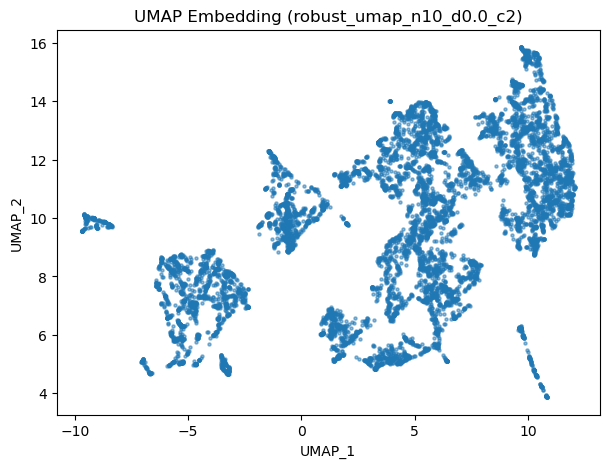

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(df_umap["UMAP_1"], df_umap["UMAP_2"], s=5, alpha=0.5)
plt.title("UMAP Embedding (robust_umap_n10_d0.0_c2)")
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.show()

ผลลัพธ์จาก UMAP แสดงให้เห็นการแยกตัวเป็นกลุ่มย่อยตามธรรมชาติของข้อมูลลูกค้า
โดยข้อมูลจัดกระจุกเป็นหลายโครงสร้าง (neighborhoods) ที่ชัดเจน แม้ยังไม่ทำคลัสเตอร์
ซึ่งสะท้อนว่าพฤติกรรมการใช้บัตรเครดิตมีความแตกต่างกันระหว่างกลุ่มลูกค้า
และเหมาะสมสำหรับการทำ Clustering ในขั้นตอนถัดไป

### UMAP ดีที่สุด

ภาพนี้แสดงผลลัพธ์ของข้อมูลหลังผ่านกระบวนการลดมิติด้วย UMAP โดยใช้ space แบบ `robust_umap_n10_d0_0_c2` ซึ่งเป็นหนึ่งใน Feature Space ที่มีประสิทธิภาพสูงสุดในงานนี้

ข้อสังเกตจากผลลัพธ์:

1. **จำนวนแถวไม่เปลี่ยน (8950 แถว)**  
   แสดงว่าการลดมิติไม่ได้ลบหรือสร้างข้อมูลเพิ่ม

2. **จำนวนมิติถูกลดจาก 17 ฟีเจอร์ → เหลือ 2 มิติ**  
   ผลลัพธ์ถูกแสดงเป็นคอลัมน์ `UMAP_1` และ `UMAP_2`  
   ซึ่งเป็นมิติใหม่ที่สรุปโครงสร้างข้อมูลทั้งหมดในรูปแบบที่เหมาะกับการทำคลัสเตอร์โดยสรุปโครงสร้างข้อมูลจากฟีเจอร์เดิมทั้ง 17 ตัวให้กระชับขึ้น

3. **ค่าที่ได้เป็นตัวเลขต่อเนื่องทั้งสองมิติ**  
   แสดงว่าการลดมิติทำให้ข้อมูลจากหลายฟีเจอร์ถูกรวมให้อยู่ในพื้นที่พิกัด 2 มิติที่สะท้อนโครงสร้างภายในของข้อมูล เช่น กลุ่มลูกค้าที่มีพฤติกรรมคล้ายกันจะอยู่ใกล้กันใน UMAP space

โดยรวม UMAP ช่วยสกัดโครงสร้างความสัมพันธ์หลายมิติให้กลายเป็นพื้นที่สองมิติที่เหมาะสำหรับการทำ Clustering ทั้ง K-Means และ Agglomerative และเป็นหนึ่งในเหตุผลที่ทำให้โมเดลใน space นี้ได้คะแนนสูงที่สุดในโมเดลนี้

## **7.3 การทำ Clustering ด้วย KMeans (k จาก Best Configuration)**

เมื่อได้ UMAP Embedding ตาม Best Configuration แล้วจึงทำการเรียนรู้โมเดล KMeans โดยใช้จำนวนคลัสเตอร์ k ที่ได้จากพารามิเตอร์ของ Best Configuration

In [169]:
from sklearn.cluster import KMeans

k = best_cfg['params']['n_clusters']

km = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_STATE)
labels = km.fit_predict(X_umap)

df_umap_clusters = df_umap.copy()
df_umap_clusters["cluster"] = labels

print("Final UMAP + KMeans:")
display(df_umap_clusters.head(10))

Final UMAP + KMeans:


,UMAP_1,UMAP_2,cluster
0,-3.657240,8.528332,8
1,9.566650,10.045671,3
2,5.777612,9.830095,2
3,-4.262540,7.519024,8
4,5.606560,13.876204,0
5,7.659760,8.195939,2
6,5.352013,5.426743,5
7,4.846033,12.381563,0
8,5.318085,11.652035,0
9,-4.766544,6.764947,8


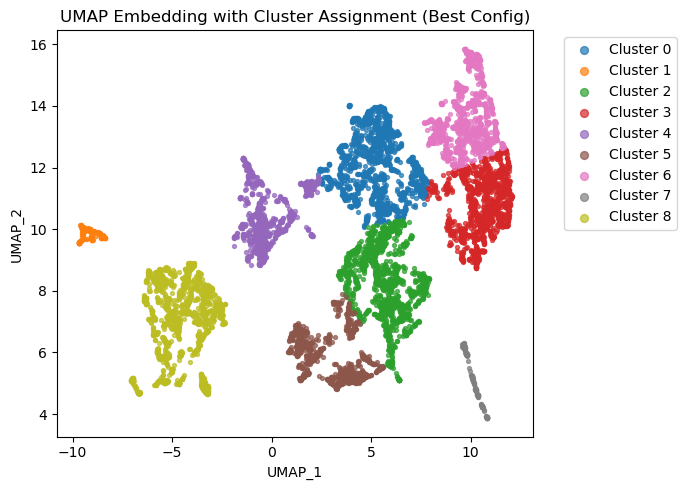

In [170]:
df_umap_clusters = df_umap.copy()
df_umap_clusters["cluster"] = labels  # มาจาก KMeans

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
for c in sorted(df_umap_clusters["cluster"].unique()):
    subset = df_umap_clusters[df_umap_clusters["cluster"] == c]
    plt.scatter(
        subset["UMAP_1"], subset["UMAP_2"],
        s=8, alpha=0.7, label=f"Cluster {c}"
    )

plt.title("UMAP Embedding with Cluster Assignment (Best Config)")
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

รูปนี้แสดงผลการจัดกลุ่มลูกค้าด้วย KMeans บน UMAP Feature Space 
ซึ่งเป็นคอนฟิกูเรชันที่ให้ผลดีที่สุดจากการทดลองทั้งหมด พบว่าข้อมูลถูกแบ่งออกเป็น 
9 คลัสเตอร์อย่างชัดเจน โดยแต่ละคลัสเตอร์มีขอบเขตและความหนาแน่นที่แตกต่างกัน 
สะท้อนให้เห็นโครงสร้างเชิงพฤติกรรมของลูกค้าเด่นชัดขึ้นหลังการลดมิติด้วย UMAP 
และเป็นพื้นฐานสำคัญสำหรับการทำ Cluster Profiling ในขั้นตอนถัดไป

# 8.)  Cluster Profiling

หลังจากได้ Cluster Labels จาก Best Configuration ได้แก่  
การทำ Imputation ด้วย Iterative Imputer (MICE), การปรับสเกลด้วย RobustScaler, 
การลดมิติด้วย UMAP (robust_umap_n10_d0.0_c2) และการจัดกลุ่มด้วย KMeans 
จำนวนคลัสเตอร์ตามพารามิเตอร์ที่เหมาะสมที่สุด (k = best_cfg['params']['n_clusters'])  
ขั้นตอนต่อไปคือการนำ Labels ดังกล่าวไปเชื่อมกับข้อมูลฟีเจอร์จริงของลูกค้า 
เพื่อวิเคราะห์ลักษณะเชิงพฤติกรรมของแต่ละคลัสเตอร์ (Cluster Profiling)


ในส่วนนี้จะสร้างตาราง `df_labeled` ซึ่งประกอบด้วย Feature ดั้งเดิมร่วมกับหมายเลขClusterของลูกค้า  
และใช้เป็นฐานสำหรับ Cluster Profiling เช่น

- จำนวนสมาชิกของแต่ละCluster  
- ค่าเฉลี่ย (mean) ของFeatureสำคัญในแต่ละCluster  
- สถิติเชิงสรุปอื่น ๆ เช่น median, std และ count  
- การสร้างกราฟประกอบ เช่น Heatmap หรือ Boxplot เพื่อเปรียบเทียบลักษณะของClusterต่าง ๆ


## 8.1 การเชื่อม Cluster Labels เข้ากับข้อมูลต้นฉบับ

Using cluster labels from Section 7 (KMeans on UMAP).
Preview of labeled data:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,8
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,8
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0



Cluster Sizes:


cluster
0    1599
1     180
2    1370
3    1272
4     954
5     868
6    1060
7     167
8    1480
Name: count, dtype: int64


Cluster-wise mean values:


cluster,0,1,2,3,4,5,6,7,8
BALANCE,1023.498223,49.674377,2434.367504,4323.278184,1002.731795,186.258663,1572.206288,2323.231291,236.111073
BALANCE_FREQUENCY,0.991249,0.433956,0.990908,0.989852,0.895108,0.962552,0.993130,0.983427,0.449622
PURCHASES,535.580657,474.899111,3470.577599,472.934906,416.835901,1895.561786,44.270585,470.490060,345.970068
ONEOFF_PURCHASES,302.504609,212.319778,2167.045562,283.352555,214.771740,1059.176578,33.247255,143.954611,180.794020
INSTALLMENTS_PURCHASES,233.534597,262.579333,1303.602299,189.662280,202.427893,837.178963,11.042198,326.535449,165.648682
CASH_ADVANCE,164.690841,128.463331,387.986350,3996.024296,1121.260386,45.699616,831.633676,673.816401,511.175328
PURCHASES_FREQUENCY,0.561257,0.325842,0.903362,0.302093,0.476682,0.912313,0.043605,0.407844,0.303848
ONEOFF_PURCHASES_FREQUENCY,0.160923,0.078935,0.552566,0.128956,0.109144,0.433588,0.025237,0.052335,0.069902
PURCHASES_INSTALLMENTS_FREQUENCY,0.425852,0.226075,0.676156,0.209461,0.356347,0.673873,0.017496,0.364870,0.231729
CASH_ADVANCE_FREQUENCY,0.043106,0.025604,0.064187,0.446546,0.186750,0.009051,0.193137,0.093525,0.049799


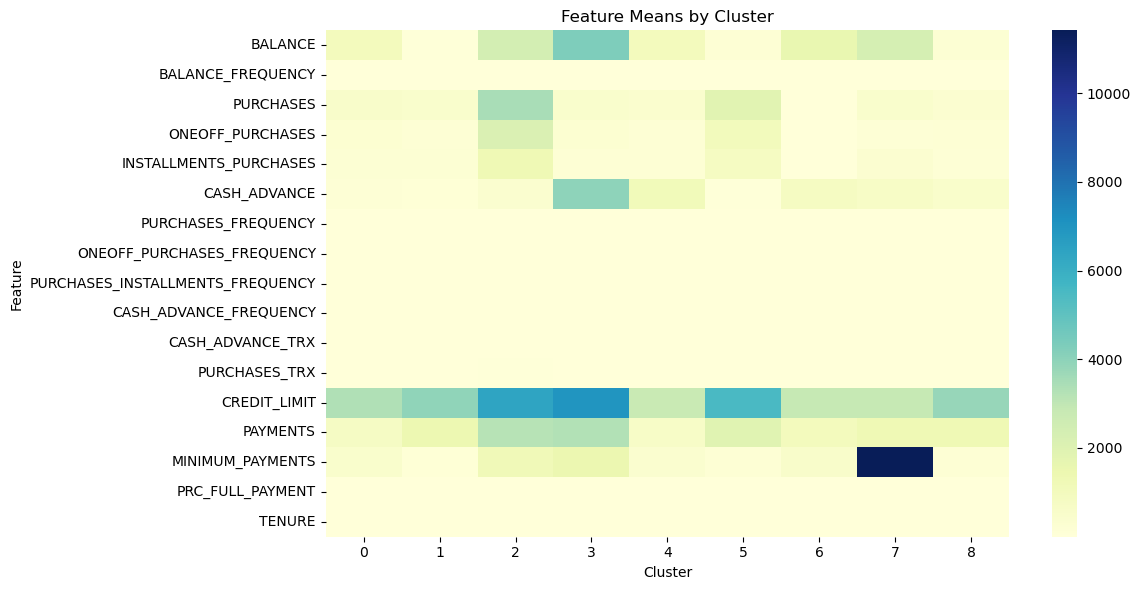

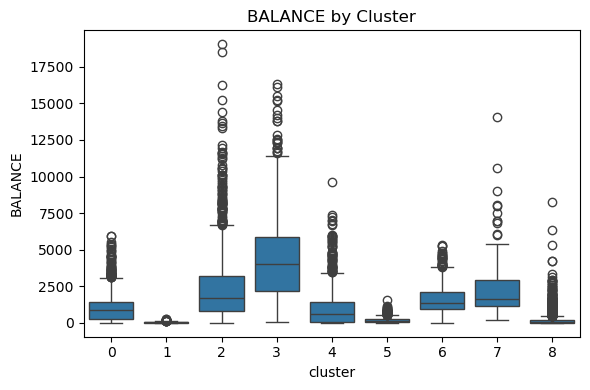

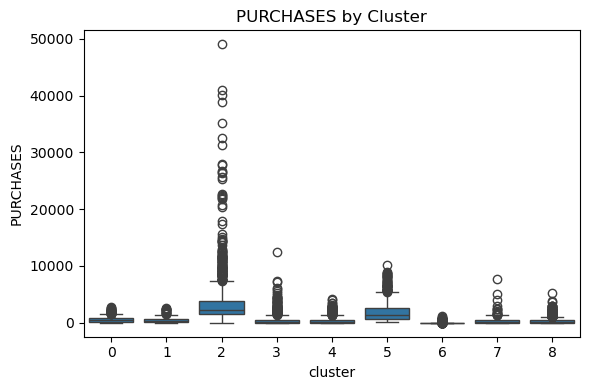

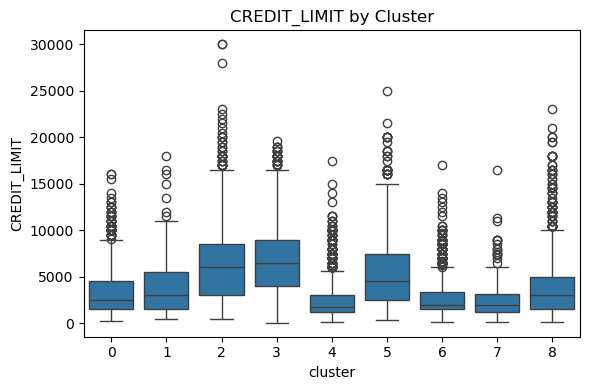

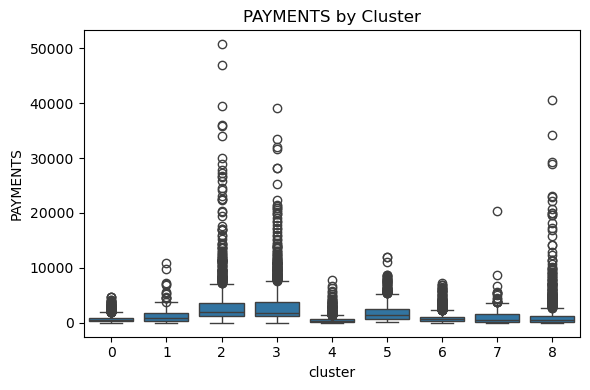

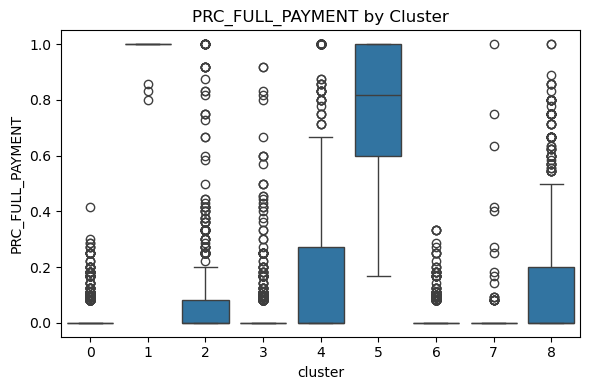

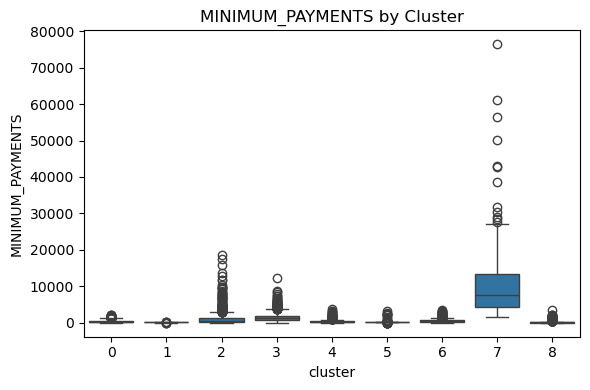


Profiling summary (mean, median, std):


cluster                                  0           1            2  \
BALANCE                mean    1023.498223   49.674377  2434.367504   
                       median   867.728471   28.004637  1671.347939   
                       std      933.431039   55.084413  2425.265118   
                       count   1599.000000  180.000000  1370.000000   
BALANCE_FREQUENCY      mean       0.991249    0.433956     0.990908   
                       median     1.000000    0.454545     1.000000   
                       std        0.031428    0.162717     0.044043   
                       count   1599.000000  180.000000  1370.000000   
PURCHASES              mean     535.580657  474.899111  3470.577599   
                       median   438.830000  301.955000  2275.215000   
                       std      425.366362  558.912228  4206.758852   
                       count   1599.000000  180.000000  1370.000000   
ONEOFF_PURCHASES       mean     302.504609  212.319778  2167.045562   
                       median   118.900000    0.000000  1288.910000   
                       std      420.804036  456.119353  3486.706271   
                       count   1599.000000  180.000000  1370.000000   
INSTALLMENTS_PURCHASES mean     233.534597  262.579333  1303.602299   
                       median   153.890000  122.600000   902.165000   
                       std      252.149183  403.741255  1757.283780   
                       count   1599.000000  180.000000  1370.000000   

cluster                                  3            4            5  \
BALANCE                mean    4323.278184  1002.731795   186.258663   
                       median  4023.764135   595.479456   117.194357   
                       std     2710.838595  1291.466059   189.931191   
                       count   1272.000000   954.000000   868.000000   
BALANCE_FREQUENCY      mean       0.989852     0.895108     0.962552   
                       median     1.000000     0.909091     1.000000   
                       std        0.043630     0.134865     0.075844   
                       count   1272.000000   954.000000   868.000000   
PURCHASES              mean     472.934906   416.835901  1895.561786   
                       median   108.245000   218.860000  1301.535000   
                       std      891.845167   588.844259  1747.729939   
                       count   1272.000000   954.000000   868.000000   
ONEOFF_PURCHASES       mean     283.352555   214.771740  1059.176578   
                       median     0.000000     0.000000   460.395000   
                       std      656.427153   510.721578  1521.043629   
                       count   1272.000000   954.000000   868.000000   
INSTALLMENTS_PURCHASES mean     189.662280   202.427893   837.178963   
                       median     0.000000    43.335000   553.135000   
                       std      415.066374   305.400418   923.787431   
                       count   1272.000000   954.000000   868.000000   

cluster                                  6            7            8  
BALANCE                mean    1572.206288  2323.231291   236.111073  
                       median  1375.636546  1601.393425    36.793598  
                       std      951.443995  2053.145142   553.484122  
                       count   1060.000000   167.000000  1480.000000  
BALANCE_FREQUENCY      mean       0.993130     0.983427     0.449622  
                       median     1.000000     1.000000     0.454545  
                       std        0.030108     0.057943     0.237838  
                       count   1060.000000   167.000000  1480.000000  
PURCHASES              mean      44.270585   470.490060   345.970068  
                       median     0.000000   184.700000   159.720000  
                       std      117.472686   902.370233   496.053919  
                       count   1060.000000   167.000000  1480.000000  
ONEOFF_PURCHASES       mean      33.247255   143.954611   180.794020  
 

In [171]:
# ============================================================
# 8) Cluster Profiling (ใช้ labels จาก Section 7 โดยตรง)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Using cluster labels from Section 7 (KMeans on UMAP).")

# ---------- 8.1 ผูก label กับข้อมูลดั้งเดิม ----------
df_labeled = df.copy()
df_labeled["cluster"] = labels   # ใช้ labels ที่สร้างจาก Section 7

print("Preview of labeled data:")
display(df_labeled.head())

# ---------- 8.2 จำนวนสมาชิกแต่ละคลัสเตอร์ ----------
print("\nCluster Sizes:")
cluster_sizes = df_labeled["cluster"].value_counts().sort_index()
display(cluster_sizes)

# ---------- 8.3 Cluster-wise Mean Features ----------
cluster_summary = df_labeled.groupby("cluster").mean().T
print("\nCluster-wise mean values:")
display(cluster_summary)

# ---------- 8.4 Heatmap แสดงค่าเฉลี่ยของแต่ละคลัสเตอร์ ----------
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, cmap="YlGnBu", annot=False)
plt.title("Feature Means by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ---------- 8.5 Boxplots ของฟีเจอร์สำคัญ ----------
key_features = [
    "BALANCE","PURCHASES","CREDIT_LIMIT",
    "PAYMENTS","PRC_FULL_PAYMENT","MINIMUM_PAYMENTS"
]

for col in key_features:
    if col in df_labeled.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df_labeled, x="cluster", y=col)
        plt.title(f"{col} by Cluster")
        plt.tight_layout()
        plt.show()

# ---------- 8.6 Summary Statistics ----------
profile_summary = (
    df_labeled
    .groupby("cluster")
    .agg(["mean", "median", "std", "count"])
    .T
)

print("\nProfiling summary (mean, median, std):")
display(profile_summary.head(20))

In [172]:
df.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## 8.2 **Cluster Sizes**

จากผลการจัดกลุ่ม พบว่าโมเดลแบ่งลูกค้าออกเป็น **9 Cluster**  
โดยมีจำนวนลูกค้าในแต่ละคลัสเตอร์ดังนี้:

- **Cluster 0 : 1,599 ราย**  
- **Cluster 1 : 180 ราย**  
- **Cluster 2 : 1,370 ราย**  
- **Cluster 3 : 1,272 ราย**  
- **Cluster 4 : 954 ราย**  
- **Cluster 5 : 868 ราย**  
- **Cluster 6 : 1,060 ราย**  
- **Cluster 7 : 167 ราย**  
- **Cluster 8 : 1,480 ราย**

คลัสเตอร์ที่มีจำนวนลูกค้ามากที่สุดคือ **Cluster 0 (1,599 ราย)**  
ขณะที่คลัสเตอร์ที่มีจำนวนลูกค้าน้อยสุดคือ **Cluster 7 (167 ราย)**  
ซึ่งสะท้อนว่าลูกค้ากลุ่มใหญ่บางกลุ่มมีพฤติกรรมใกล้เคียงกันมากจนรวมตัวกันเป็นกลุ่มใหญ่

ในทางกลับกัน คลัสเตอร์ขนาดเล็กอย่าง Cluster 7 มักบ่งบอกถึงลูกค้าที่มีพฤติกรรมเฉพาะทาง แตกต่างจากกลุ่มอื่นอย่างชัดเจนจนถูกแยกออกมาเป็นกลุ่มเฉพาะ


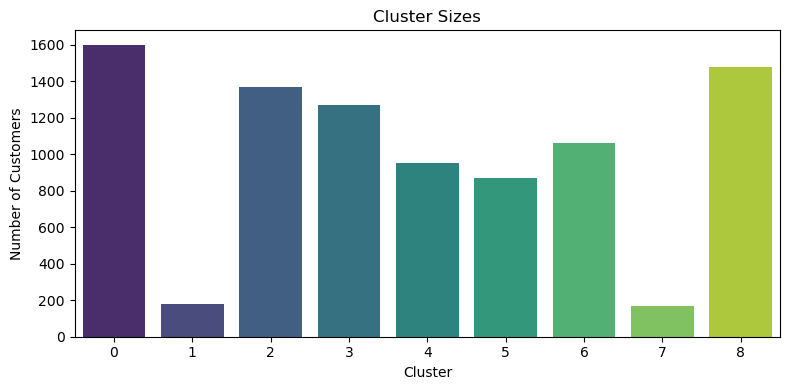

cluster
0    1599
1     180
2    1370
3    1272
4     954
5     868
6    1060
7     167
8    1480
Name: count, dtype: int64

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# นับจำนวนสมาชิกแต่ละคลัสเตอร์
cluster_sizes = df_labeled["cluster"].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette="viridis")

plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


cluster_sizes

## 8.3 ค่าเฉลี่ยของฟีเจอร์ในแต่ละคลัสเตอร์ (Cluster-wise Feature Means)

In [174]:
# ---------- Feature means ----------
cluster_summary = df_labeled.groupby("cluster").mean().T
display(cluster_summary)

cluster,0,1,2,3,4,5,6,7,8
BALANCE,1023.498223,49.674377,2434.367504,4323.278184,1002.731795,186.258663,1572.206288,2323.231291,236.111073
BALANCE_FREQUENCY,0.991249,0.433956,0.990908,0.989852,0.895108,0.962552,0.993130,0.983427,0.449622
PURCHASES,535.580657,474.899111,3470.577599,472.934906,416.835901,1895.561786,44.270585,470.490060,345.970068
ONEOFF_PURCHASES,302.504609,212.319778,2167.045562,283.352555,214.771740,1059.176578,33.247255,143.954611,180.794020
INSTALLMENTS_PURCHASES,233.534597,262.579333,1303.602299,189.662280,202.427893,837.178963,11.042198,326.535449,165.648682
CASH_ADVANCE,164.690841,128.463331,387.986350,3996.024296,1121.260386,45.699616,831.633676,673.816401,511.175328
PURCHASES_FREQUENCY,0.561257,0.325842,0.903362,0.302093,0.476682,0.912313,0.043605,0.407844,0.303848
ONEOFF_PURCHASES_FREQUENCY,0.160923,0.078935,0.552566,0.128956,0.109144,0.433588,0.025237,0.052335,0.069902
PURCHASES_INSTALLMENTS_FREQUENCY,0.425852,0.226075,0.676156,0.209461,0.356347,0.673873,0.017496,0.364870,0.231729
CASH_ADVANCE_FREQUENCY,0.043106,0.025604,0.064187,0.446546,0.186750,0.009051,0.193137,0.093525,0.049799


### Cluster Summary (Mean of Features)

ตารางนี้สรุปค่าเฉลี่ยของฟีเจอร์สำคัญในแต่ละคลัสเตอร์ ซึ่งช่วยให้เห็นความแตกต่างด้านพฤติกรรมการใช้บัตรของลูกค้าในแต่ละกลุ่ม ทั้งด้านวงเงิน การใช้จ่าย และรูปแบบการชำระเงิน

**สิ่งที่สังเกตได้จากผลลัพธ์**

- **Cluster 2 และ Cluster 3**  
  มียอด BALANCE, PURCHASES และ CREDIT_LIMIT สูงที่สุดในตาราง  
  สะท้อนว่ากลุ่มนี้มีการใช้บัตรหนักและมีศักยภาพทางการเงินสูง

- **Cluster 8 และ Cluster 1**  
  มีระดับการใช้จ่ายโดยรวมค่อนข้างต่ำ  
  อาจเป็นกลุ่มที่ใช้บัตรเฉพาะบางกรณีหรือเพื่อธุรกรรมพื้นฐาน

- **Cluster 0 และ Cluster 4**  
  อยู่ในระดับกลาง ทั้งด้านยอดใช้จ่ายและความถี่ในการใช้บัตร  
  เป็นกลุ่มที่มีพฤติกรรมสมดุลและใช้งานสม่ำเสมอ

- **Cluster 5 และ Cluster 7**  
  มีลักษณะเฉพาะบางมิติ เช่นค่า ONEOFF_PURCHASES หรือ CASH_ADVANCE ต่ำกว่ากลุ่มอื่น  
  อาจเป็นกลุ่มที่ใช้บัตรแบบเฉพาะเจาะจง เช่นเน้นผ่อนสินค้า หรือไม่ใช้เบิกเงินสดเลย

- **Cluster 6**  
  มีความถี่ในการใช้บัตรและอัตราการชำระเต็มจำนวนสูง  
  สะท้อนถึงกลุ่มลูกค้าที่มีวินัยการชำระดีและมีการใช้งานต่อเนื่อง

**สรุปเชิงกลยุทธ์**

- Cluster 2 และ 3 เหมาะกับแคมเปญรายได้หลักจากการใช้จ่าย เนื่องจากมีศักยภาพสูง  
- Cluster 6 เหมาะกับแคมเปญสร้างความภักดี เพราะใช้บัตรบ่อยและชำระตรงเวลา  
- Cluster 8 และ 1 ควรได้รับแคมเปญกระตุ้นการใช้งาน เพื่อเพิ่มความถี่และวงเงิน  
- Cluster 5 และ 7 ควรได้รับข้อเสนอเฉพาะทางที่สอดคล้องกับพฤติกรรม เช่นโปรโมชันผ่อนสินค้า หรือโปรโมชันไม่มีดอกเบี้ย


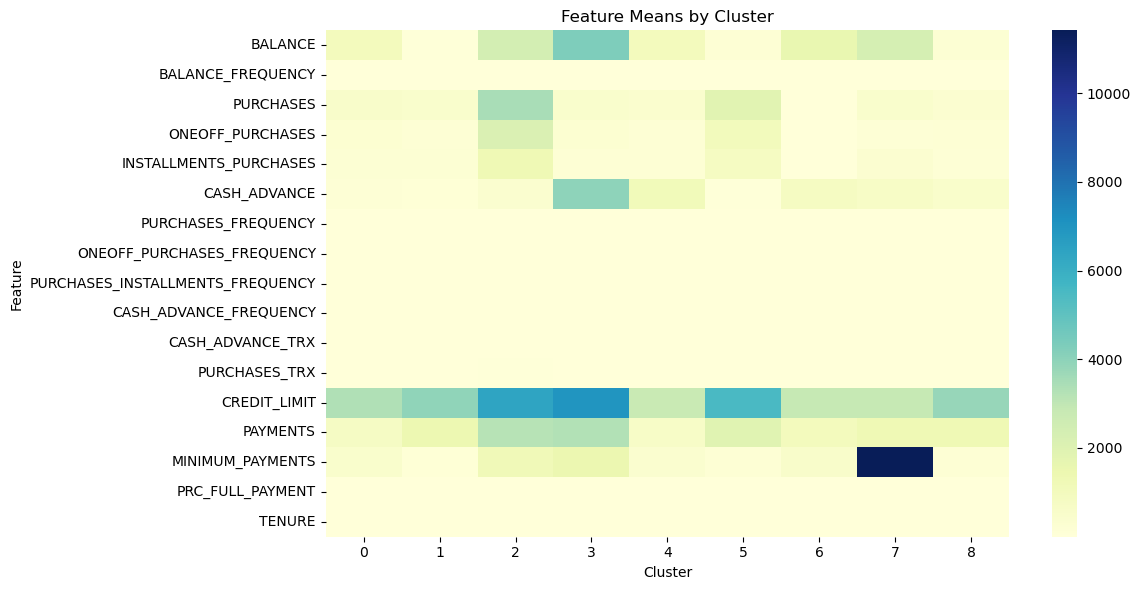

In [175]:
# ---------- Heatmap ----------
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, cmap="YlGnBu", annot=False)
plt.title("Feature Means by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### Heatmap: ค่าเฉลี่ยของ Feature ในแต่ละ Cluster

Heatmap นี้แสดงค่าเฉลี่ยของฟีเจอร์สำคัญในแต่ละคลัสเตอร์  
แกนนอนคือหมายเลขคลัสเตอร์ ส่วนแกนตั้งคือฟีเจอร์แต่ละตัว  
สีเข้มหมายถึงค่าที่สูงกว่าเมื่อเทียบกับคลัสเตอร์อื่น ซึ่งช่วยให้เห็นจุดเด่นของแต่ละกลุ่มได้ง่ายขึ้น

**สิ่งที่สังเกตได้จากภาพ**

- **Cluster 2 และ 3**  
  มีค่าสูงใน BALANCE, PURCHASES และ CREDIT_LIMIT  
  สะท้อนถึงลูกค้าที่ใช้บัตรหนักและมีวงเงินสูง

- **Cluster 7**  
  มีค่า MINIMUM_PAYMENTS สูงมากเมื่อเทียบกับกลุ่มอื่น  
  เป็นสัญญาณของลูกค้าที่เน้นจ่ายยอดขั้นต่ำ และอาจมีความเสี่ยงการชำระหนี้สูงกว่า

- **Cluster 6**  
  มีค่า PRC_FULL_PAYMENT สูงที่สุด  
  บ่งบอกถึงวินัยทางการเงินดีและมีพฤติกรรมชำระเต็มจำนวนสม่ำเสมอ

- **Cluster 1 และ 4**  
  มีค่า PURCHASES และ ONEOFF_PURCHASES อยู่ในระดับกลางค่อนข้างสูง  
  เป็นกลุ่มที่มีการใช้บัตรสม่ำเสมอและมีการใช้จ่ายครั้งใหญ่เป็นบางช่วง

- **Cluster 0 และ 8**  
  มีระดับค่าเฉลี่ยของฟีเจอร์ส่วนใหญ่ค่อนข้างต่ำ  
  เป็นกลุ่มที่ใช้บัตรน้อยหรือใช้เฉพาะบางประเภทของธุรกรรม

Heatmap นี้ช่วยให้เห็นภาพรวมของพฤติกรรมลูกค้าในแต่ละคลัสเตอร์อย่างชัดเจน  
และสนับสนุนการทำ Cluster Profiling เพื่อแยกประเภทลูกค้าและกำหนดกลยุทธ์ทางธุรกิจได้แม่นยำยิ่งขึ้น


## 8.4 การกระจายตัวของฟีเจอร์สำคัญ (Key Feature Distributions)

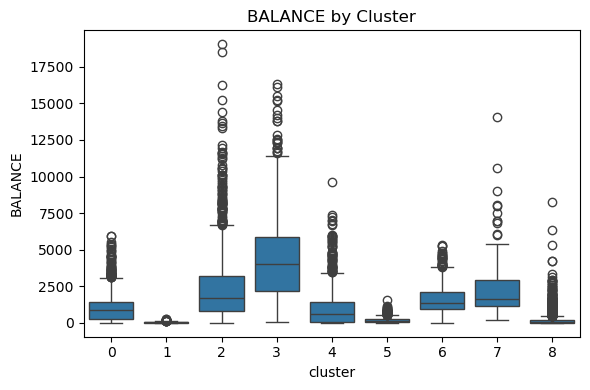

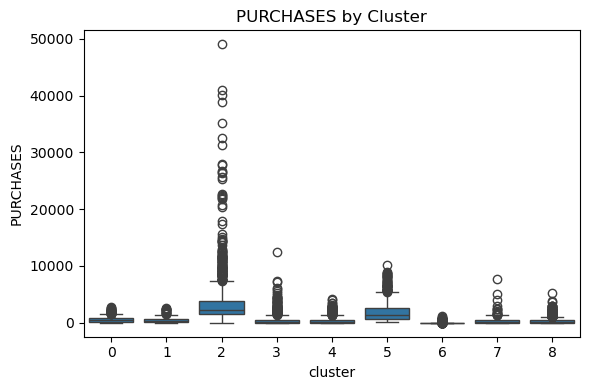

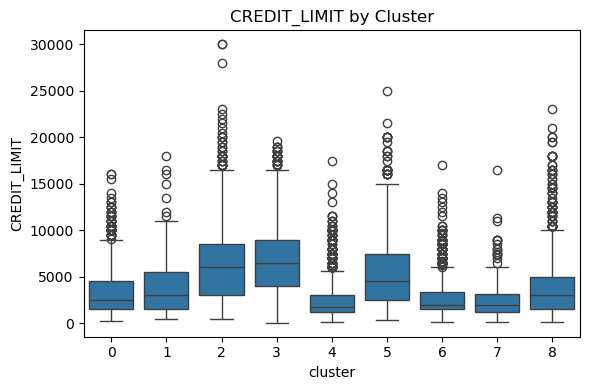

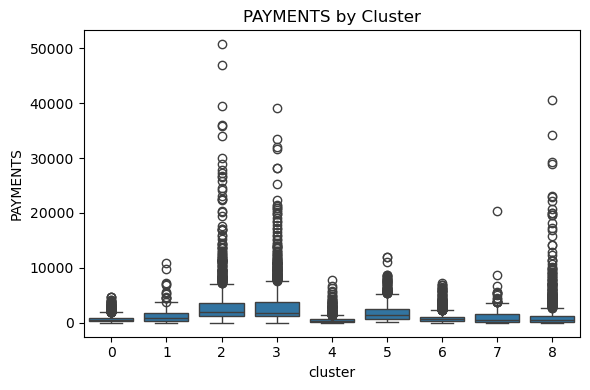

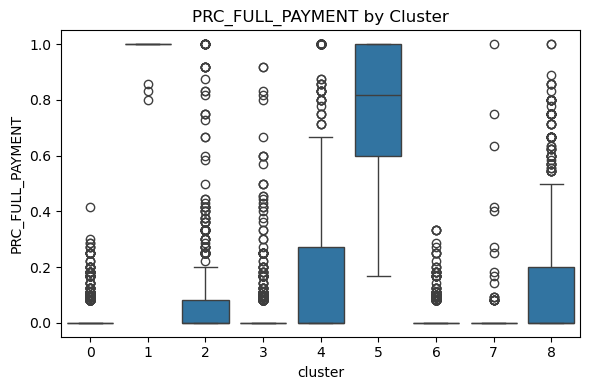

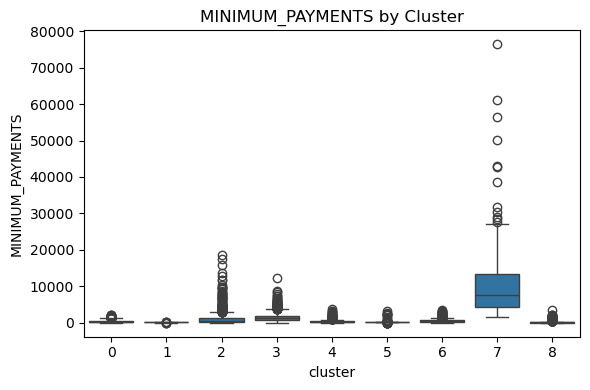

In [176]:
# ---------- 9.7 Boxplots ----------
key_features = [
    "BALANCE","PURCHASES","CREDIT_LIMIT",
    "PAYMENTS","PRC_FULL_PAYMENT","MINIMUM_PAYMENTS"
]

for col in key_features:
    if col in df_labeled.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df_labeled, x="cluster", y=col)
        plt.title(f"{col} by Cluster")
        plt.tight_layout()
        plt.show()



### Boxplot Analysis of Key Financial Features

กราฟ Boxplot ชุดนี้แสดงการกระจายตัวของฟีเจอร์ทางการเงินสำคัญในแต่ละคลัสเตอร์  
ช่วยให้เห็นระดับการใช้บัตร ความสามารถในการชำระเงิน และรูปแบบพฤติกรรมของลูกค้าได้ชัดเจนขึ้น

#### 1) BALANCE (ยอดคงเหลือ)
- Cluster 2 และ 3 มียอดคงเหลือสูงที่สุดอย่างชัดเจน และมี Outlier จำนวนมาก  
- Cluster 0, 4 และ 8 อยู่ในระดับค่อนข้างต่ำเมื่อเทียบกับคลัสเตอร์อื่น  
- ความแตกต่างนี้ช่วยบ่งชี้ลูกค้าที่ใช้วงเงินหนักและกลุ่มที่ใช้บัตรน้อยกว่า

#### 2) PURCHASES (ยอดใช้จ่ายรวม)
- Cluster 2 มีการใช้จ่ายสูงที่สุด โดดเด่นมากจากการกระจายตัวของค่า  
- Cluster 3 และ 6 มีระดับการใช้จ่ายปานกลาง  
- Cluster 0, 1, 4, 5, 7 และ 8 มีการใช้จ่ายในระดับต่ำกว่าชัดเจน

#### 3) CREDIT_LIMIT (วงเงินอนุมัติ)
- Cluster 2 และ 3 มีวงเงินสูงที่สุด สอดคล้องกับยอดใช้จ่ายที่มาก  
- Cluster 4, 6 และ 8 มีวงเงินปานกลาง  
- Cluster 0, 1, 5 และ 7 อยู่ในระดับวงเงินต่ำกว่า

#### 4) PAYMENTS (ยอดชำระทั้งหมด)
- Cluster 2 และ 3 ชำระเงินสูงที่สุดตามระดับการใช้จ่าย  
- Cluster 6 และ 8 ชำระเงินค่อนข้างต่ำกว่ากลุ่มอื่น  
- การชำระเงินสะท้อนสภาพคล่องและพฤติกรรมชำระหนี้ของกลุ่มลูกค้า

#### 5) PRC_FULL_PAYMENT (สัดส่วนการชำระเต็มจำนวน)
- Cluster 5 มีการชำระเต็มจำนวนสูงที่สุดอย่างชัดเจน  
- Cluster 1 และ 4 มีสัดส่วนปานกลาง  
- คลัสเตอร์อื่น ๆ ส่วนใหญ่มีค่าต่ำ แสดงถึงลูกค้าที่ชำระแบบ revolving เป็นส่วนใหญ่

#### 6) MINIMUM_PAYMENTS (ยอดชำระขั้นต่ำ)
- Cluster 7 มีค่า Minimum Payments สูงที่สุดอย่างโดดเด่น อาจสะท้อนความเสี่ยงด้านเครดิต  
- Cluster 0, 3 และ 4 อยู่ในระดับต่ำสม่ำเสมอ  
- การชำระขั้นต่ำจำนวนมากอาจสะท้อนลูกค้ากลุ่มที่มีภาระชำระสูงหรือหมุนยอดบ่อย

โดยรวม Boxplot ช่วยให้เห็นภาพความแตกต่างของพฤติกรรมในแต่ละคลัสเตอร์อย่างชัดเจน  
ข้อมูลนี้สามารถนำไปใช้เพื่อจัดกลุ่มลูกค้าตามศักยภาพ รายได้ การใช้งานจริง และความเสี่ยงในการบริหารสินเชื่อได้อย่างเหมาะสม


## 8.5 สถิติเชิงสรุป (Summary Statistics)

In [177]:
# ---------- 9.8 Profiling Summary ----------
profile_summary = (
    df_labeled
    .groupby("cluster")
    .agg(["mean", "median", "std", "count"])
    .T
)
display(profile_summary.head(20))

cluster                                  0           1            2  \
BALANCE                mean    1023.498223   49.674377  2434.367504   
                       median   867.728471   28.004637  1671.347939   
                       std      933.431039   55.084413  2425.265118   
                       count   1599.000000  180.000000  1370.000000   
BALANCE_FREQUENCY      mean       0.991249    0.433956     0.990908   
                       median     1.000000    0.454545     1.000000   
                       std        0.031428    0.162717     0.044043   
                       count   1599.000000  180.000000  1370.000000   
PURCHASES              mean     535.580657  474.899111  3470.577599   
                       median   438.830000  301.955000  2275.215000   
                       std      425.366362  558.912228  4206.758852   
                       count   1599.000000  180.000000  1370.000000   
ONEOFF_PURCHASES       mean     302.504609  212.319778  2167.045562   
                       median   118.900000    0.000000  1288.910000   
                       std      420.804036  456.119353  3486.706271   
                       count   1599.000000  180.000000  1370.000000   
INSTALLMENTS_PURCHASES mean     233.534597  262.579333  1303.602299   
                       median   153.890000  122.600000   902.165000   
                       std      252.149183  403.741255  1757.283780   
                       count   1599.000000  180.000000  1370.000000   

cluster                                  3            4            5  \
BALANCE                mean    4323.278184  1002.731795   186.258663   
                       median  4023.764135   595.479456   117.194357   
                       std     2710.838595  1291.466059   189.931191   
                       count   1272.000000   954.000000   868.000000   
BALANCE_FREQUENCY      mean       0.989852     0.895108     0.962552   
                       median     1.000000     0.909091     1.000000   
                       std        0.043630     0.134865     0.075844   
                       count   1272.000000   954.000000   868.000000   
PURCHASES              mean     472.934906   416.835901  1895.561786   
                       median   108.245000   218.860000  1301.535000   
                       std      891.845167   588.844259  1747.729939   
                       count   1272.000000   954.000000   868.000000   
ONEOFF_PURCHASES       mean     283.352555   214.771740  1059.176578   
                       median     0.000000     0.000000   460.395000   
                       std      656.427153   510.721578  1521.043629   
                       count   1272.000000   954.000000   868.000000   
INSTALLMENTS_PURCHASES mean     189.662280   202.427893   837.178963   
                       median     0.000000    43.335000   553.135000   
                       std      415.066374   305.400418   923.787431   
                       count   1272.000000   954.000000   868.000000   

cluster                                  6            7            8  
BALANCE                mean    1572.206288  2323.231291   236.111073  
                       median  1375.636546  1601.393425    36.793598  
                       std      951.443995  2053.145142   553.484122  
                       count   1060.000000   167.000000  1480.000000  
BALANCE_FREQUENCY      mean       0.993130     0.983427     0.449622  
                       median     1.000000     1.000000     0.454545  
                       std        0.030108     0.057943     0.237838  
                       count   1060.000000   167.000000  1480.000000  
PURCHASES              mean      44.270585   470.490060   345.970068  
                       median     0.000000   184.700000   159.720000  
                       std      117.472686   902.370233   496.053919  
                       count   1060.000000   167.000000  1480.000000  
ONEOFF_PURCHASES       mean      33.247255   143.954611   180.794020  
 

### Cluster Profiling Summary

ตารางนี้สรุปค่า **mean**, **median**, **std** และ **count** ของฟีเจอร์สำคัญในแต่ละคลัสเตอร์  
โดยใช้ผลการจัดกลุ่มจากโมเดลที่ให้ประสิทธิภาพดีที่สุด  
ช่วยให้เห็นรูปแบบพฤติกรรมของลูกค้าแต่ละกลุ่มได้อย่างละเอียดในเชิงสถิติ

**วิธีอ่านตาราง**
- แถวแนวนอนคือฟีเจอร์ เช่น BALANCE, PURCHASES, CREDIT_LIMIT  
- ใต้ฟีเจอร์แต่ละตัวมีค่าทางสถิติ 4 รายการ: mean, median, std, count  
- คอลัมน์คือคลัสเตอร์ 0–8 (รวมทั้งหมด 9 คลัสเตอร์)  

**สิ่งที่สังเกตได้**
- Cluster 2 และ 3 มีค่า BALANCE และ PURCHASES สูงกว่ากลุ่มอื่นอย่างเด่นชัด  
- Cluster 7 มีค่า MINIMUM_PAYMENTS และส่วนเบี่ยงเบนมาตรฐานค่อนข้างสูง  
- Cluster 6 มีค่า PRC_FULL_PAYMENT เฉลี่ยสูงที่สุด แสดงถึงการชำระเต็มจำนวนบ่อย  
- Cluster 0 และ 8 มีระดับฟีเจอร์โดยรวมอยู่ในระดับต่ำมากกว่า  
- Cluster 4 และ 5 มีพฤติกรรมเฉพาะ เช่นยอดชำระและการใช้จ่ายอยู่ในระดับกลางแต่สม่ำเสมอ

**ประโยชน์ของตารางนี้**
- ใช้เพื่อค้นหาลักษณะโดดเด่นของแต่ละคลัสเตอร์  
- ช่วยสนับสนุนการตีความพฤติกรรม เช่น  
  - กลุ่มที่ใช้บัตรหนัก  
  - กลุ่มเสี่ยงที่ชำระขั้นต่ำมาก  
  - กลุ่มที่มีวินัยการชำระดีมาก  
- สามารถต่อยอดไปสู่ขั้นตอน **Interpretation & Business Insights** เพื่อสร้าง persona ของลูกค้าในแต่ละคลัสเตอร์ได้อย่างแม่นยำ


## 8.6 Radar Chart

ถูกใช้เพื่อแสดงพฤติกรรมโดยรวมของแต่ละClusterนหลายมิติพร้อมกัน
โดยเลือกFeatureที่แยกClusterได้ดีที่สุด (Top Features) จากค่าเฉลี่ยของแต่ละกลุ่ม

Radar Chart ช่วยให้:
- เห็นความแตกต่างเชิงพฤติกรรมของแต่ละClusterได้ชัดเจน
- มองหาจุดเด่น/จุดอ่อน เช่น การใช้บัตรสูง–ต่ำ, การกดเงินสด, ความสม่ำเสมอในการชำระ
- ใช้ประกอบการสร้างกลยุทธ์ เช่น กลุ่มที่ต้องส่งเสริมการใช้งาน, กลุ่มเสี่ยง, กลุ่มที่ควรทำ retention

สรุป: Radar Chart ทำให้เห็น “ลายเซ็นพฤติกรรม” ของแต่ละClusterในรูปเดียว


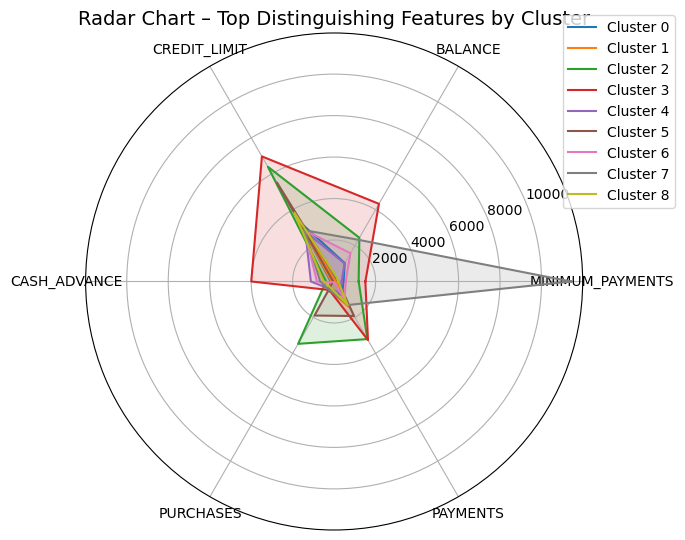

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) เลือกเฉพาะคอลัมน์ตัวเลข (ยกเว้น cluster)
num_cols = [
    c for c in df_labeled.columns
    if c != "cluster" and np.issubdtype(df_labeled[c].dtype, np.number)
]

# ตาราง mean: index = feature, columns = cluster
mean_tbl = df_labeled.groupby("cluster")[num_cols].mean().T

# 2) หา feature ที่แยกคลัสเตอร์ได้ดีสุด (range สูงสุด)
feat_range = mean_tbl.max(axis=1) - mean_tbl.min(axis=1)
top_feats = feat_range.sort_values(ascending=False).head(6).index

radar_df = mean_tbl.loc[top_feats]

# 3) เตรียมแกนสำหรับ Radar Chart
labels = radar_df.index.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # ปิดวงกลม

# 4) วาด Radar Chart
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

for clus in radar_df.columns:
    values = radar_df[clus].tolist()
    values += values[:1]  # ปิดเส้น
    ax.plot(angles, values, linewidth=1.5, label=f"Cluster {clus}")
    ax.fill(angles, values, alpha=0.15)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Radar Chart – Top Distinguishing Features by Cluster", fontsize=14)
plt.legend(bbox_to_anchor=(1.2, 1.05))
plt.tight_layout()
plt.show()


### Radar Chart – Top Distinguishing Features by Cluster

กราฟ Radar นี้แสดงค่าเฉลี่ยของฟีเจอร์สำคัญที่ช่วยแยกความแตกต่างระหว่างคลัสเตอร์ได้ชัดเจนที่สุด  
โดยเลือกฟีเจอร์ที่มีช่วงค่าห่างระหว่างคลัสเตอร์มาก เช่น CREDIT_LIMIT, BALANCE, PURCHASES, CASH_ADVANCE, PAYMENTS และ MINIMUM_PAYMENTS

**สิ่งที่สังเกตได้จากกราฟ**

- **Cluster 3 และ Cluster 2**  
  มีค่าหลายฟีเจอร์สูงกว่ากลุ่มอื่นอย่างชัดเจน โดยเฉพาะ CREDIT_LIMIT, BALANCE และ PURCHASES  
  สะท้อนถึงลูกค้าที่มียอดการใช้จ่ายสูงและมีวงเงินค่อนข้างมาก

- **Cluster 7**  
  มีค่า MINIMUM_PAYMENTS สูงโดดเด่น  
  เป็นลักษณะของลูกค้าที่ชำระยอดขั้นต่ำบ่อย ซึ่งอาจมีความเสี่ยงด้านเครดิตสูงกว่า

- **Cluster 6**  
  มีค่าฟีเจอร์หลายด้านอยู่ในระดับกลางถึงสูง  
  ชี้ให้เห็นถึงการใช้งานบัตรที่สม่ำเสมอและการชำระเงินปานกลาง

- **Cluster 0, 1 และ 8**  
  มีค่าฟีเจอร์ส่วนใหญ่ต่ำกว่ากลุ่มอื่น  
  เป็นกลุ่มที่ใช้บัตรไม่มากหรือใช้เฉพาะธุรกรรมบางประเภท

**ประโยชน์ของกราฟ Radar**

- ทำให้เห็นความแตกต่างของคลัสเตอร์หลายมิติพร้อมกันในกราฟเดียว  
- ช่วยระบุจุดเด่นของแต่ละกลุ่มได้ง่าย เช่น กลุ่มใช้หนัก กลุ่มชำระขั้นต่ำ กลุ่มใช้น้อย  
- สนับสนุนการวางกลยุทธ์ เช่น  
  - เสนอวงเงินเพิ่ม/โปรโมชันให้กลุ่มใช้หนัก  
  - ควบคุมความเสี่ยงสำหรับกลุ่มที่ชำระขั้นต่ำสูง  
  - กระตุ้นการใช้งานสำหรับกลุ่มใช้บัตรน้อย

ภาพรวมแล้ว Radar Chart ช่วยให้เข้าใจ "บุคลิกทางการเงิน" ของแต่ละคลัสเตอร์ได้อย่างรวดเร็วและชัดเจน


## 8.7 Pareto Chart


Pareto Chart ใช้เพื่อระบุว่าคลัสเตอร์ใดเป็นกลุ่มหลักของฐานลูกค้า  
โดยแสดงจำนวนลูกค้าในแต่ละคลัสเตอร์ (กราฟแท่ง) ร่วมกับสัดส่วนสะสมของลูกค้าทั้งหมด (Cumulative %)  
ช่วยให้เห็นว่าคลัสเตอร์ใดมีผลต่อฐานลูกค้ารวมมากที่สุดตามหลัก 80/20

หลัก 80/20 คือหลักการที่ระบุว่า  
ประมาณ 80% ของผลลัพธ์ มักเกิดจากปัจจัยเพียง 20%  
ในบริบทของลูกค้า หมายความว่า ลูกค้าส่วนใหญ่ของธุรกิจมักมาจากเพียงไม่กี่คลัสเตอร์เท่านั้น

กราฟนี้ช่วยให้:

- ระบุคลัสเตอร์ที่เป็นกลุ่มสำคัญของฐานลูกค้า  
- เห็นว่าคลัสเตอร์ใดควรให้ความสำคัญด้านการตลาดหรือการให้บริการ  
- จัดลำดับความสำคัญเชิงกลยุทธ์ได้ง่ายขึ้นจากผลกระทบจริงของคลัสเตอร์หลัก


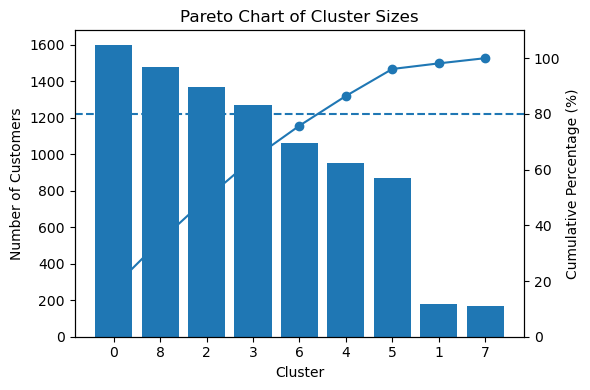

,cluster,count,cum_pct
0,0,1599,17.865922
1,8,1480,34.402235
2,2,1370,49.709497
3,3,1272,63.921788
4,6,1060,75.765363
5,4,954,86.424581
6,5,868,96.122905
7,1,180,98.134078
8,7,167,100.000000


In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) นับจำนวนลูกค้าในแต่ละคลัสเตอร์ แล้วเรียงจากมากไปน้อย
size_df = (
    df_labeled["cluster"]
    .value_counts()
    .sort_values(ascending=False)
    .reset_index()
)
size_df.columns = ["cluster", "count"]

# 2) คำนวณ % สะสม (Cumulative %)
size_df["cum_pct"] = size_df["count"].cumsum() / size_df["count"].sum() * 100

# 3) สร้าง Pareto Chart
fig, ax1 = plt.subplots(figsize=(6,4))

# กราฟแท่ง: จำนวนลูกค้าแต่ละคลัสเตอร์
ax1.bar(size_df["cluster"].astype(str), size_df["count"])
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Number of Customers")
ax1.set_title("Pareto Chart of Cluster Sizes")

# กราฟเส้น: Cumulative %
ax2 = ax1.twinx()
ax2.plot(size_df["cluster"].astype(str), size_df["cum_pct"], marker="o")
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 110)

# เส้นแนวนอน 80% เพื่อดูหลัก 80/20
ax2.axhline(80, linestyle="--")

plt.tight_layout()
plt.show()

# ถ้าอยากดูตารางประกอบด้วย
display(size_df)


### สรุปผลจาก Pareto Chart ของจำนวนลูกค้าแต่ละคลัสเตอร์

Pareto Chart แสดงจำนวนลูกค้าในแต่ละคลัสเตอร์ (กราฟแท่ง) ร่วมกับสัดส่วนสะสมของลูกค้าทั้งหมด (เส้น Cumulative %)  
ช่วยให้เห็นว่าคลัสเตอร์ใดเป็นกลุ่มหลักของฐานลูกค้า และคลัสเตอร์ใดมีผลต่อภาพรวมมากที่สุด

**สิ่งที่สังเกตได้จากกราฟ**

- คลัสเตอร์ที่มีจำนวนลูกค้ามากที่สุดคือ Cluster 0 และ Cluster 8  
  ทั้งสองคลัสเตอร์รวมกันคิดเป็นประมาณ 34% ของลูกค้าทั้งหมด

- คลัสเตอร์รองลงมาคือ Cluster 2, Cluster 3 และ Cluster 4  
  เมื่อรวมกันจนถึง Cluster 4 จะครอบคลุมมากกว่า 75% ของฐานลูกค้าทั้งหมด  
  แสดงว่าลูกค้าส่วนใหญ่กระจุกตัวอยู่เพียงไม่กี่กลุ่ม

- คลัสเตอร์ที่มีจำนวนลูกค้าน้อยที่สุดคือ Cluster 7 และ Cluster 1  
  ซึ่งมีผลต่อภาพรวมของฐานลูกค้าค่อนข้างน้อย

- เส้นประที่ระดับ 80% แสดงให้เห็นว่าประมาณ 5–6 คลัสเตอร์แรก  
  ก็ครอบคลุมลูกค้าส่วนใหญ่ได้แล้ว

**สรุปภาพรวม**

Pareto Chart ทำให้เห็นว่าคลัสเตอร์หลักที่ควรให้ความสำคัญเป็นพิเศษคือ Cluster 0, 8, 2, 3 และ 4  
ซึ่งเป็นกลุ่มที่มีจำนวนลูกค้าสูงที่สุดและมีผลต่อธุรกิจมากที่สุด  
ขณะที่คลัสเตอร์ขนาดเล็ก เช่น Cluster 7 และ 1 ควรพิจารณาในเชิงเฉพาะกลุ่มตามลักษณะพฤติกรรมของลูกค้า




ผลการทำ Cluster Profiling  ช่วยให้เข้าใจ segmentation ของผู้ถือบัตรเครดิตได้ชัดเจน และสามารถใช้ในการออกแบบกลยุทธ์ได้อย่างตรงจุดสำหรับแต่ละกลุ่มลูกค้า


# **9.) Business Insights & Conclusion**

ต่อจากนี้จะเป็นการ “ตีความผลลัพธ์ของการทำ Clustering” โดยนำคอนฟิกที่ดีที่สุดจากขั้นตอน Model Ranking มาวิเคราะห์เชิงลึกว่าแต่ละClusterมีพฤติกรรมลูกค้าอย่างไร แตกต่างกันอย่างไร และสามารถต่อยอดเป็นกลยุทธ์ทางธุรกิจรูปแบบใดได้บ้าง

การทำ Cluster Profiling จะช่วยให้:
- เข้าใจรูปแบบการใช้บัตรเครดิตของลูกค้าแต่ละกลุ่ม  
- มองเห็นความเสี่ยง พฤติกรรมรายจ่าย วินัยการชำระเงิน และระดับความคุ้มค่า  
- สร้าง Customer Persona เพื่อใช้ต่อในการออกแบบผลิตภัณฑ์/โปรโมชัน  
- วางกลยุทธ์ทางการตลาดและบริหารความเสี่ยงได้ตรงกลุ่มมากขึ้น  

ในหัวข้อนี้จะอธิบาย **จำนวนCluster**, **ลักษณะเฉพาะของแต่ละCluster**,  
รวมถึง **โอกาสทางธุรกิจและกลยุทธ์ที่เหมาะสม**สำหรับกลุ่มนั้น ๆ พร้อมตัวแทนลูกค้าในรูปแบบ Persona เพื่อให้เห็นภาพชัดเจนที่สุด


ตารางนี้สรุปข้อมูลสำคัญของแต่ละคลัสเตอร์ ได้แก่ จำนวนลูกค้า สัดส่วน ระดับความเสี่ยง  
รวมถึงกลยุทธ์ที่เหมาะสมตามพฤติกรรมการใช้บัตร วงเงิน และวินัยการชำระเงินของลูกค้าแต่ละกลุ่ม

| Cluster | จำนวน (คน) | สัดส่วน (%) | ระดับความเสี่ยง | คำอธิบายพฤติกรรม | กลยุทธ์ที่แนะนำ |
|--------|-------------|--------------|-------------------|-------------------|------------------|
| **0** | 1,599 | **17.86%** | ต่ำ–กลาง | ใช้งานระดับกลาง วงเงินและการชำระปกติ | **Engagement Growth Strategy** |
| **1** | 180 | **2.01%** | ต่ำ | ใช้งานน้อยใกล้ Dormant | **Reactivation Strategy** |
| **2** | 1,370 | **15.32%** | ต่ำ–กลาง | ใช้จ่ายสูง วงเงินมาก ลูกค้าวินัยดี | **Premium & Loyalty Strategy** |
| **3** | 1,272 | **14.22%** | กลาง–สูง | ยอดคงเหลือสูง ใช้จ่ายมาก มี Cash Advance | **Proactive Risk Management Strategy** |
| **4** | 954 | **10.66%** | กลาง | ใช้บัตรระดับกลาง–สูง ชำระบางส่วน | **Proactive Risk Management Strategy** |
| **5** | 868 | **9.70%** | ต่ำ | ลูกค้าวินัยดี ชำระเต็มจำนวนบ่อย | **Premium & Loyalty Strategy** |
| **6** | 1,060 | **11.85%** | กลาง–สูง | ใช้งานสม่ำเสมอ แต่ชำระไม่เต็มจำนวน | **Proactive Risk Management Strategy** |
| **7** | 167 | **1.86%** | สูงมาก | Minimum Payments สูงผิดปกติ เสี่ยงสะสมหนี้ | **Debt Control & Relief Strategy** |
| **8** | 1,480 | **16.53%** | ต่ำ–กลาง | วงเงินสูง ใช้งานหลากหลาย ยืดหยุ่น | **Engagement Growth Strategy** |


## ความหมายของระดับความเสี่ยง (Risk Level)

การประเมินความเสี่ยงของคลัสเตอร์อ้างอิงจากตัวชี้วัดด้านการเงิน เช่น  
ยอดคงเหลือ (BALANCE), การชำระขั้นต่ำ (MINIMUM_PAYMENTS), การกดเงินสด (CASH_ADVANCE),  
รวมถึงความสม่ำเสมอของการชำระเงิน

### 1. ความเสี่ยงต่ำ (Low Risk)
ลูกค้ามีวินัยชำระดี ยอดคงเหลือต่ำ ใช้ Cash Advance น้อย  
ไม่มีสัญญาณตึงตัวด้านสภาพคล่อง โอกาสผิดนัดชำระต่ำ  
เหมาะสำหรับการเพิ่ม Engagement และแคมเปญ Loyalty

### 2. ความเสี่ยงปานกลาง (Medium Risk)
เริ่มมีสัญญาณบางอย่าง เช่น  
ยอดคงเหลือเพิ่มขึ้น ใช้วงเงินสูง ใช้ Cash Advance บ่อย  
อาจต้องมีมาตรการติดตามและคำแนะนำในการจัดการภาระหนี้

### 3. ความเสี่ยงสูง (High Risk)
พบสัญญาณเสี่ยงชัดเจน เช่น  
ชำระขั้นต่ำต่อเนื่อง ยอดคงเหลือสูง ใช้ Cash Advance ปริมาณมาก  
ต้องใช้มาตรการบริหารความเสี่ยงเข้มงวด เช่น ปรับแผนชำระหนี้ หรือพิจารณาจำกัดวงเงิน

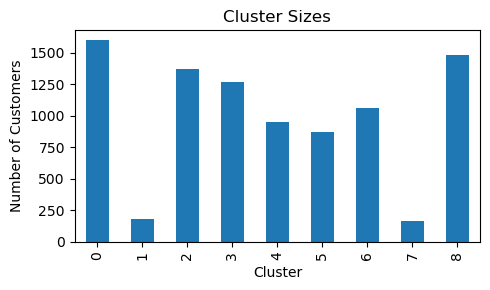

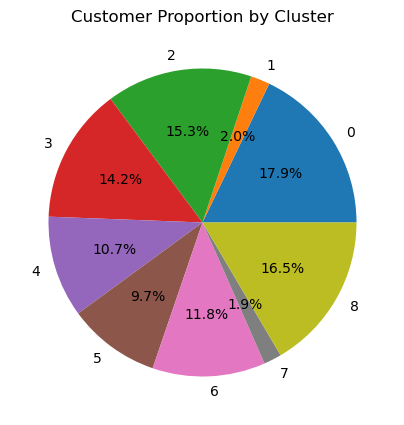

In [180]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) สร้างตาราง size_df
size_df = (
    df_labeled["cluster"]
    .value_counts()
    .sort_index()
    .reset_index()
)
size_df.columns = ["cluster", "count"]

# 2) Bar Chart
size_df.plot.bar(
    x="cluster",
    y="count",
    figsize=(5,3),
    title="Cluster Sizes",
    legend=False
)
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

# 3) Pie Chart
size_df.set_index("cluster")["count"].plot.pie(
    autopct="%1.1f%%",
    figsize=(5,5)
)
plt.title("Customer Proportion by Cluster")
plt.ylabel("")
plt.show()


## กลุ่มลูกค้าทั้งหมด

### Cluster 0 – Moderate Users (1,599 ราย / 17.9%)
- การใช้จ่ายและยอดคงเหลืออยู่ในระดับกลาง  
- พฤติกรรมสม่ำเสมอและมีความเสถียร  
- เหมาะกับแคมเปญเพิ่ม engagement และ cross-sell

### Cluster 1 – Light / Dormant-like Users (180 ราย / 2.0%)
- ใช้บัตรน้อยที่สุดแทบทุกมิติ  
- ไม่ได้เป็นกลุ่มเสี่ยง แต่ engagement ต่ำ  
- เหมาะสำหรับแคมเปญกระตุ้นการใช้งาน (reactivation)

### Cluster 2 – High Spenders (1,370 ราย / 15.3%)
- ใช้จ่ายสูง มีทั้ง one-off และผ่อนชำระ  
- วงเงินสูงกว่าค่าเฉลี่ย และชำระค่อนข้างดี  
- เหมาะกับโปรโมชั่นพรีเมียมและ loyalty program

### Cluster 3 – Heavy Users (1,272 ราย / 14.2%)
- BALANCE, PURCHASES และ CREDIT_LIMIT สูง  
- มีการใช้ Cash Advance ในระดับน่าสนใจ  
- ควรติดตามความเสี่ยงเรื่องภาระหนี้ เน้น risk monitoring

### Cluster 4 – Mid-Level Users (954 ราย / 10.7%)
- ใช้จ่ายในระดับกลาง ค่อนข้างสม่ำเสมอ  
- วงเงินกลาง–สูง แต่ไม่ได้ชำระเต็มจำนวนบ่อย  
- ต้องมีการติดตามพฤติกรรมเป็นระยะ

### Cluster 5 – Premium Balanced Users (868 ราย / 9.7%)
- ชำระดีมาก หลายคนชำระเต็มจำนวน  
- ใช้จ่ายระดับกลางแต่มีคุณภาพสูง  
- เป็นกลุ่มที่ควรเน้น loyalty benefits เช่น travel rewards หรือ privileges

### Cluster 6 – Revolvers (1,060 ราย / 11.8%)
- ใช้บัตรสม่ำเสมอแต่ชำระไม่เต็มจำนวน  
- BALANCE สูงกว่าเฉลี่ย ปรับตัวช้า  
- ต้องใช้กลยุทธ์ด้าน risk mitigation พร้อม engagement

### Cluster 7 – Minimum Payment Dominant (167 ราย / 1.9%)
- ค่า Minimum Payments สูงมากผิดปกติ  
- เป็นกลุ่มเสี่ยงด้านเครดิตสูงสุดในข้อมูล  
- แนะนำการช่วยเหลือ เช่น โครงสร้างหนี้ หรือ early intervention

### Cluster 8 – Mixed Mid–High Users (1,480 ราย / 16.5%)
- วงเงินสูง ใช้งานหลากหลายสม่ำเสมอ  
- ความเสี่ยงต่ำ–กลาง พฤติกรรมค่อนข้างดี  
- เหมาะกับ personalized cross-sell และ value growth


## Business Strategy by Customer Cluster

จากผลการจัดกลุ่มลูกค้า 9 คลัสเตอร์ สามารถแบ่งออกเป็น 5 หมวดกลยุทธ์หลัก  
เพื่อรองรับความแตกต่างด้านพฤติกรรม วงเงิน และระดับความเสี่ยงของลูกค้า  
เป้าหมายคือเพิ่มคุณค่าทางธุรกิจ รักษาลูกค้า และควบคุมความเสี่ยงอย่างเหมาะสม

### 1) Engagement Growth Strategy
เหมาะสำหรับลูกค้าที่มีการใช้จ่ายระดับกลางและมีวินัยชำระดี เช่น Cluster 0 และ Cluster 8  
เป็นกลุ่มฐานสำคัญที่สามารถขยายการใช้งานได้อีก

**แนวทางดำเนินงาน**
- จัดแคมเปญรายเดือนเพื่อกระตุ้นการใช้บัตร  
- เพิ่มความคุ้มค่าของโปรแกรมสะสมแต้มในหมวดที่ลูกค้าใช้บ่อย  
- ส่งข้อเสนอเฉพาะบุคคลตามพฤติกรรมการใช้จ่าย

**ผลที่คาดหวัง**  
เพิ่มความถี่ในการใช้งานโดยไม่เพิ่มความเสี่ยงของพอร์ต

### 2) Reactivation Strategy
ใช้กับลูกค้าที่ใช้งานน้อยหรือมีแนวโน้มเข้าใกล้ Dormant เช่น Cluster 1

**แนวทางดำเนินงาน**
- มอบข้อเสนอเริ่มใช้งาน เช่น ส่วนลดหรือเครดิตเงินคืน  
- ใช้พาร์ทเนอร์ร้านค้ากระตุ้นการทดลองใช้งาน  
- สื่อสารแบบเฉพาะบุคคลตามหมวดที่เคยใช้งาน

**ผลที่คาดหวัง**  
เพิ่มอัตราการกลับมาใช้งานและลดการสูญเสียลูกค้า

### 3) Premium and Loyalty Strategy
ใช้กับลูกค้าที่มีศักยภาพสูง ใช้จ่ายมาก และมีวินัยการชำระดี เช่น Cluster 2, Cluster 5 และบางส่วนของ Cluster 8

**แนวทางดำเนินงาน**
- ปรับเพิ่มวงเงินตามประวัติการชำระ  
- ให้สิทธิพิเศษระดับพรีเมียม เช่นประกันเดินทางหรือบริการสนามบิน  
- พัฒนาโปรแกรมสะสมแต้มแบบ Tier ให้เหมาะกับไลฟ์สไตล์กลุ่มพรีเมียม

**ผลที่คาดหวัง**  
รักษาลูกค้าคุณภาพและเพิ่มรายได้ระยะยาว

### 4) Proactive Risk Management Strategy
เหมาะสำหรับลูกค้าที่เริ่มมีสัญญาณความเสี่ยง เช่น Cluster 3 และ Cluster 4  
พบลักษณะการใช้วงเงินสูงหรือมีพฤติกรรมเบิกเงินสดบ่อย

**แนวทางดำเนินงาน**
- แจ้งเตือนเมื่อยอดคงเหลือสูงหรือวงเงินใกล้เต็ม  
- เสนอสินเชื่อรีไฟแนนซ์หรือผลิตภัณฑ์ดอกเบี้ยต่ำ  
- ใช้ระบบตรวจจับพฤติกรรมผิดปกติ

**ผลที่คาดหวัง**  
ลดความเสี่ยงด้านเครดิตและช่วยให้ลูกค้าควบคุมภาระหนี้ได้ดีขึ้น

### 5) Debt Control and Relief Strategy
เหมาะสำหรับลูกค้าที่มีความเสี่ยงสูง เช่น Cluster 7 และลูกค้าบางส่วนใน Cluster 6  
พบพฤติกรรมชำระขั้นต่ำต่อเนื่องและยอดคงเหลือสูง

**แนวทางดำเนินงาน**
- เสนอโครงสร้างผ่อนชำระแบบผ่อนปรน  
- รวมภาระหนี้เพื่อลดค่างวดรายเดือน  
- จำกัดการเพิ่มวงเงินและติดตามใกล้ชิด

**ผลที่คาดหวัง**  
ลดความเสี่ยงหนี้เสียและช่วยให้ลูกค้าฟื้นฟูความสามารถในการชำระเงิน


## 9.1 Business Insights

ส่วนนี้สรุปประเด็นเชิงธุรกิจสำคัญจากการวิเคราะห์ลูกค้าจำนวน 8,950 ราย  
ผ่านการจัดกลุ่มลูกค้า (Clustering) ออกเป็น 9 คลัสเตอร์ (0–8)  
ซึ่งสะท้อนความแตกต่างด้านพฤติกรรมการใช้บัตร ศักยภาพรายได้ และระดับความเสี่ยงของลูกค้าแต่ละกลุ่ม

### 1) พฤติกรรมลูกค้าถูกแบ่งออกอย่างชัดเจนเป็นหลายรูปแบบ
การจัดกลุ่มช่วยให้เห็นลักษณะพฤติกรรมที่แตกต่างกันอย่างชัดเจน เช่น  
กลุ่มใช้จ่ายสูงและมีวินัยดี (Cluster 2 และ 5)  
กลุ่มที่มีสัญญาณความเสี่ยง เช่น ชำระขั้นต่ำต่อเนื่อง (Cluster 7)  
กลุ่มที่ใช้งานต่ำใกล้หยุดใช้งาน (Cluster 1)  
สิ่งนี้ช่วยให้วางแผนกลยุทธ์แบบเฉพาะกลุ่มได้แม่นยำกว่าการใช้แนวทางเดียวกับลูกค้าทั้งหมด

### 2) ลูกค้าระดับความเสี่ยงสูงมีสัดส่วนมากพอควร
จากผลลัพธ์ พบว่าคลัสเตอร์ที่มีสัญญาณความเสี่ยง เช่น Cluster 3, 4, 6 และ 7  
รวมกันมีสัดส่วนมากกว่าหนึ่งในสามของฐานลูกค้า  
โดยเฉพาะกลุ่มที่ชำระขั้นต่ำบ่อย หรือมียอดคงเหลือสูง  
กลุ่มเหล่านี้ต้องใช้มาตรการติดตามและช่วยบริหารภาระหนี้เพื่อป้องกันปัญหาด้านเครดิตในอนาคต

### 3) กลุ่มใช้จ่ายสูงเป็นแหล่งรายได้สำคัญ
Cluster 2 และ Cluster 5 เป็นกลุ่มที่ใช้จ่ายสูง วงเงินสูง และมีวินัยชำระดี  
ถือเป็นกลุ่มสร้างรายได้หลักของพอร์ต  
จึงควรมีกลยุทธ์ดูแลลูกค้าพิเศษ เช่น สิทธิประโยชน์ด้านคะแนนสะสม วงเงินเพิ่มเติม หรือโปรแกรมสมาชิกระดับพรีเมียม  
เพื่อรักษาลูกค้าและเพิ่มมูลค่าตลอดอายุความสัมพันธ์

### 4) การใช้ Cash Advance สูงสะท้อนสัญญาณด้านสภาพคล่อง
Cluster 3 และ 4 มีพฤติกรรมใช้ Cash Advance สูงกว่ากลุ่มอื่น  
เป็นสัญญาณว่าลูกค้าต้องการหมุนเงินระยะสั้น  
ธุรกิจสามารถนำข้อมูลนี้ไปใช้พัฒนาผลิตภัณฑ์ที่เหมาะสม เช่น  
สินเชื่อดอกเบี้ยต่ำกว่า cash advance หรือบริการให้คำแนะนำด้านการเงิน

### 5) กลุ่มผู้ใช้งานปานกลางมีโอกาสพัฒนาเพิ่มเติม
Cluster 0 และ 8 ใช้บัตรในระดับปานกลาง มีการชำระเงินดี และความเสี่ยงต่ำ  
ถึงแม้จะไม่ใช่กลุ่มที่ใช้จ่ายสูงที่สุด แต่มีศักยภาพขยายการใช้งานเพิ่ม  
เหมาะสำหรับแคมเปญที่เพิ่มความถี่ เช่น คะแนนสะสมพิเศษหรือ cashback รายหมวด

### 6) กลุ่มใช้งานต่ำแต่ไม่เสี่ยงยังมีโอกาสสร้างรายได้เพิ่ม
Cluster 1 เป็นกลุ่มที่ใช้งานต่ำ แต่ไม่ได้มีสัญญาณความเสี่ยงชัดเจน  
จึงเป็นกลุ่มที่สามารถกระตุ้นให้กลับมาใช้งานได้ด้วยต้นทุนการตลาดที่ต่ำ  
เช่น ข้อเสนอพิเศษครั้งแรก หรือโปรโมชันเฉพาะหมวดที่เคยใช้งานมาก่อน

### 7) การใช้กลยุทธ์เฉพาะกลุ่มช่วยให้การบริหารพอร์ตชัดเจนขึ้น
การจัดกลุ่มและเชื่อมโยงกับ 5 หมวดกลยุทธ์  
ช่วยให้สามารถบริหารทั้งด้านรายได้และความเสี่ยงได้อย่างสมดุล เช่น  
กลุ่มความเสี่ยงสูงเน้นการควบคุมหนี้  
กลุ่มพรีเมียมเน้นโปรแกรมรักษาลูกค้า  
กลุ่มทั่วไปเน้นเพิ่มความถี่การใช้งาน  
กลุ่มใกล้หยุดใช้งานเน้นกระตุ้นให้กลับมาใช้

### 8) ตัวแปรสำคัญที่ช่วยแยกความแตกต่างของแต่ละคลัสเตอร์
ตัวแปรที่มีผลต่อการแยกกลุ่มอย่างชัดเจน ได้แก่  
Balance, Purchases, Minimum Payments และ Credit Limit  
ข้อมูลนี้สามารถนำไปต่อยอดสู่  
การทำ Credit Scoring รายบุคคล  
การออกแบบโปรโมชันเฉพาะบุคคล  
หรือการสร้างโมเดลทำนายพฤติกรรมลูกค้าในอนาคต

### ภาพรวมเชิงธุรกิจ
ผลการวิเคราะห์ชี้ให้เห็นว่า  
1. ลูกค้ามีพฤติกรรมแตกต่างกันอย่างชัดเจน จึงควรบริหารแบบแยกตามกลุ่ม  
2. กลุ่มที่มีความเสี่ยงสูงต้องได้รับการดูแลและควบคุมอย่างใกล้ชิด  
3. กลุ่มพรีเมียมต้องมีกลยุทธ์รักษาลูกค้าเพราะเป็นผู้สร้างรายได้หลัก  
4. กลุ่มใช้งานต่ำยังสามารถสร้างมูลค่าเพิ่มได้ด้วยต้นทุนการตลาดที่ไม่สูง  
5. โมเดลที่ได้สามารถนำไปใช้จริงได้ทั้งด้านการตลาด การบริหารความเสี่ยง และการเพิ่มมูลค่าลูกค้าในระยะยาว


## 9.2 **Conclusion**

Project นี้มีจุดมุ่งหมายเพื่อทำความเข้าใจพฤติกรรมของลูกค้าบัตรเครดิต และแบ่งกลุ่มลูกค้าออกตามลักษณะการใช้งานจริง เพื่อให้ธุรกิจสามารถนำข้อมูลไปใช้วางแผนได้อย่างเหมาะสมและตรงจุด ตั้งแต่การเตรียมข้อมูล การลดจำนวนตัวแปร ไปจนถึงการจัดกลุ่มและแปลผลลูกค้าในแต่ละกลุ่ม

### 1) การเตรียมข้อมูลทำให้ใช้งานได้จริงและมีคุณภาพ
ข้อมูลเริ่มต้นมีค่าสูญหายและตัวเลขบางส่วนมีสเกลต่างกัน จึงต้องทำความสะอาดและปรับให้เหมาะสม โดยทดสอบหลายวิธีในการเติมค่า และพบว่า Iterative MICE ทำงานได้ดีที่สุด เพราะให้ข้อมูลสมบูรณ์และใกล้เคียงข้อมูลจริงที่สุด นอกจากนี้ยังมีการปรับสเกลและแปลงข้อมูลหลายแบบ เพื่อให้ตัวเลขอยู่ในช่วงที่เหมาะกับการจัดกลุ่ม

### 2) การลดจำนวนตัวแปรช่วยให้เห็นความแตกต่างของลูกค้าได้ชัดเจนขึ้น
มีการใช้ PCA และ UMAP เพื่อลดตัวแปรจำนวนมากให้เหลือเฉพาะส่วนสำคัญ พบว่าเมื่อใช้ RobustScaler ร่วมกับ UMAP จะทำให้กลุ่มลูกค้าแยกกันชัดที่สุด จึงเลือกใช้รูปแบบนี้สำหรับขั้นตอนการจัดกลุ่ม

### 3) การทดสอบโมเดลหลายแบบเพื่อหาวิธีที่เหมาะสมที่สุด
โปรเจกต์ได้ลองหลายวิธี ทั้งในด้านการเติมค่า การปรับสเกล และการจัดกลุ่ม เช่น K-Means, GMM, Agglomerative และ DBSCAN แล้วนำผลที่ได้จากแต่ละวิธีมาเปรียบเทียบด้วยตัวชี้วัดหลายแบบ ผลสุดท้ายพบว่า K-Means ที่แบ่งเป็น 9 กลุ่มร่วมกับ Iterative MICE และ UMAP เหมาะสมที่สุดทั้งด้านคุณภาพของผลลัพธ์และความเข้าใจในเชิงธุรกิจ

### 4) ผลลัพธ์ที่ได้แบ่งลูกค้าออกเป็น 9 กลุ่มที่มีลักษณะต่างกันชัดเจน
หลังจากจัดกลุ่มแล้ว พบว่าลูกค้าแต่ละกลุ่มมีพฤติกรรมไม่เหมือนกัน เช่น  
- กลุ่มใช้จ่ายสูงและชำระดี  
- กลุ่มที่มียอดคงเหลือสูงและเริ่มมีความเสี่ยง  
- กลุ่มที่ชำระขั้นต่ำบ่อย  
- กลุ่มใช้งานปานกลาง  
- กลุ่มใช้งานต่ำใกล้หยุดใช้งาน  

มีการใช้กราฟหลายประเภท เช่น Heatmap, Radar Chart และ Boxplot เพื่อช่วยให้เห็นจุดเด่นของแต่ละกลุ่มอย่างชัดเจน

### 5) ข้อค้นพบที่สำคัญต่อธุรกิจ
จากข้อมูลที่ได้ สามารถมองเห็นหลายประเด็นที่ธุรกิจควรให้ความสำคัญ เช่น  
- มีลูกค้าจำนวนมากที่มีความเสี่ยงและต้องช่วยดูแลเป็นพิเศษ  
- กลุ่มที่ใช้จ่ายสูงและมีวินัยดีเป็นกลุ่มที่ควรรักษาไว้  
- กลุ่มใช้งานระดับกลางเป็นโอกาสในการเพิ่มยอดการใช้งาน  
- การใช้เงินสดล่วงหน้าบ่อยเป็นสัญญาณของปัญหาด้านสภาพคล่อง  
- กลุ่มใช้งานต่ำสามารถดึงกลับมาใช้ใหม่ด้วยต้นทุนไม่สูงมาก  

ข้อมูลเหล่านี้ช่วยให้เห็นภาพรวมของลูกค้าชัดขึ้น และช่วยให้วางแผนการตลาดและการบริหารความเสี่ยงได้ดีขึ้น

### 6) กลยุทธ์หลักที่สามารถนำไปใช้ได้ทันที
จากผลทั้งหมด สามารถแบ่งกลยุทธ์ออกเป็น 5 หมวดที่เหมาะกับกลุ่มลูกค้าต่าง ๆ ได้แก่  
1. Engagement Growth Strategy สำหรับกลุ่มใช้งานระดับกลาง  
2. Reactivation Strategy สำหรับกลุ่มใช้งานต่ำ  
3. Premium and Loyalty Strategy สำหรับกลุ่มใช้จ่ายสูงและชำระดี  
4. Proactive Risk Management Strategy สำหรับกลุ่มที่เริ่มมีความเสี่ยง  
5. Debt Control and Relief Strategy สำหรับกลุ่มที่มีภาระหนี้สูง  

แต่ละหมวดสามารถนำไปใช้จริงสำหรับการทำแคมเปญ การติดตามลูกค้า หรือการบริการทางการเงิน

### สรุปภาพรวม
การจัดกลุ่มในโปรเจกต์นี้ทำให้เข้าใจลูกค้าบัตรเครดิตได้ละเอียดและเป็นระบบมากขึ้น ธุรกิจสามารถนำผลลัพธ์ไปใช้เพื่อกำหนดแผนดูแลลูกค้าแต่ละกลุ่ม เพิ่มการใช้งาน ลดความเสี่ยง และเพิ่มคุณค่าของลูกค้าในระยะยาวได้อย่างมีประสิทธิภาพ
